# Pré-Setup

#### mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# pip install pmdarima

#### pre-setup imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
register_matplotlib_converters()
from time import time
# from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

In [4]:
# Function for mean_absolute_percentage_error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Cores do Graficos

In [5]:
corTreinoReal = "#004475"
corTestReal = "#944000"


## Dataset

https://data.ny.gov/Energy-Environment/Utility-Energy-Registry-Monthly-ZIP-Code-Energy-Us/tzb9-c2c6/about_data

### 2016 - 2020

IMPORTANTE A GEOLOCALIZAÇÃO ESTÁ INVERSA
EXEMPLO: POINT (-78.93550499999998 42.47040000000004)
É NA VERDADE LATITUDE = 42, LONGITUDE = -78 CIDADE DE GOWANDA
https://www.google.com/maps/place/42%C2%B028'13.4%22N+78%C2%B056'07.8%22W/@42.4704,-78.9380746,17z/data=!3m1!4b1!4m4!3m3!8m2!3d42.4704!4d-78.935505?entry=ttu


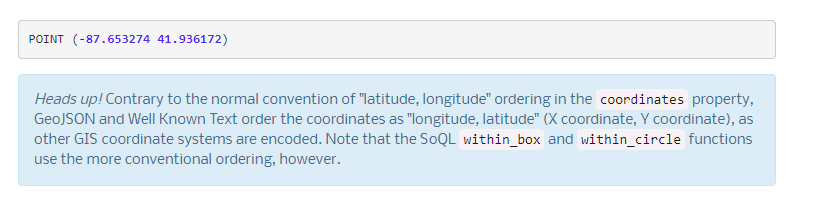

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Leandro_PPGESE/Referencias/Smart_metering/Dataset/Energy_Consumption_New_York/Utility_Energy_Registry_Monthly_ZIP_Code_Energy_Use__2016_2021.csv', sep = ',', encoding = 'utf-8')
df

year   data_class            data_field_display_name  \
0       2020  electricity              Total Consumption (T)   
1       2020  electricity  Small Consumer Consumption (R+SC)   
2       2020  electricity           ICAP Capacity Tag (SC+O)   
3       2020  electricity           ICAP Capacity Tag (SC+O)   
4       2020  electricity           ICAP Capacity Tag (SC+O)   
...      ...          ...                                ...   
529070  2016  electricity              ICAP Capacity Tag (R)   
529071  2016  electricity              Total Consumption (T)   
529072  2016  electricity           ICAP Capacity Tag (R+SC)   
529073  2016  electricity           ICAP Capacity Tag (R+SC)   
529074  2016  electricity        Business Consumption (SC+O)   

                 data_field              zip_city  month  zip_code state_2  \
0         3_nat_consumption               Gowanda      2     14070      NY   
1          3_ny_consumption                Remsen      1     13438      NY   
2       5_ny_policy_support           Clark Mills      2     13321      NY   
3       5_ny_policy_support                  Eden      1     14057      NY   
4       5_ny_policy_support            East Berne      4     12059      NY   
...                     ...                   ...    ...       ...     ...   
529070  1_ny_policy_support                 Depew      5     14043      NY   
529071    3_nat_consumption             Kill Buck      4     14748      NY   
529072  4_ny_policy_support  Thousand Island Park      4     13692      NY   
529073  4_ny_policy_support                Hermon      4     13677      NY   
529074    2_nat_consumption             Henderson      4     13650      NY   

        uer_id      data_stream utility_display_name    value  \
0            5  zipcode_monthly        National Grid -999.000   
1            5  zipcode_monthly        National Grid -999.000   
2            5  zipcode_monthly        National Grid    0.144   
3            5  zipcode_monthly        National Grid    1.455   
4            5  zipcode_monthly        National Grid    0.317   
...        ...              ...                  ...      ...   
529070       5  zipcode_monthly        National Grid    0.000   
529071       5  zipcode_monthly        National Grid   54.498   
529072       5  zipcode_monthly        National Grid    0.000   
529073       5  zipcode_monthly        National Grid    0.000   
529074       5  zipcode_monthly        National Grid   84.785   

        number_of_accounts                                   Georeference  \
0                      537   POINT (-78.93550499999998 42.47040000000004)   
1                     1801  POINT (-75.18902519999995 43.324427600000035)   
2                       55   POINT (-75.37223529999994 43.09175740000006)   
3                      307   POINT (-78.89530499999995 42.64755500000007)   
4                       66  POINT (-74.07491299999998 42.620708500000035)   
...                    ...                                            ...   
529070                   0   POINT (-78.69300499999997 42.90153000000004)   
529071                 102   POINT (-78.67337839999999 42.15632940000006)   
529072                 386   POINT (-76.02804499999996 44.28676500000006)   
529073                  93   POINT (-75.23163999999997 44.46690000000007)   
529074                 122  POINT (-76.19878969999996 43.847428500000035)   

        NYS Municipal Boundaries  New York Zip Codes  Counties  
0                            295               525.0    2041.0  
1                            990              1364.0     625.0  
2                            925               535.0     625.0  
3                            293               513.0    2041.0  
4                            813              1184.0    2030.0  
...                          ...                 ...       ...  
529070                       286               506.0    2041.0  
529071                       373              1724.0    2034.0  
529072     

# NOVO

In [7]:
new_york_data = df[df['zip_city'] == 'New York']
print("quantidade de registro 1:", new_york_data.count()[0])

new_york_data = new_york_data[new_york_data['data_class'] == 'electricity']
print("quantidade de registro 2:", new_york_data.count()[0])

# new_york_data = new_york_data[new_york_data['uer_id'] == 3]
# print("quantidade de registro 3:", new_york_data.count()[0])

new_york_data = new_york_data[new_york_data['data_field_display_name'] == "Total Consumption (T)"]
print("quantidade de registro 4:", new_york_data.count()[0])
new_york_data.head()

quantidade de registro 1: 30090
quantidade de registro 2: 30090
quantidade de registro 4: 3300


<ipython-input-7-aca35e280c6a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("quantidade de registro 1:", new_york_data.count()[0])
<ipython-input-7-aca35e280c6a>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("quantidade de registro 2:", new_york_data.count()[0])
<ipython-input-7-aca35e280c6a>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("quantidade de registro 4:", new_york_data.count()[0])


year   data_class data_field_display_name         data_field  zip_city  \
60146  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60197  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60257  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60275  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60289  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   

       month  zip_code state_2  uer_id      data_stream utility_display_name  \
60146      1     10013      NY       3  zipcode_monthly  Consolidated Edison   
60197      7     10162      NY       3  zipcode_monthly  Consolidated Edison   
60257      3     10013      NY       3  zipcode_monthly  Consolidated Edison   
60275      4     10007      NY       3  zipcode_monthly  Consolidated Edison   
60289      6     10103      NY       3  zipcode_monthly  Consolidated Edison   

           value  number_of_accounts  \
60146  63023.182               19236   
60197    660.306                 860   
60257  68628.405               19274   
60275  40728.874                4081   
60289   -999.000                   3   

                                       Georeference  NYS Municipal Boundaries  \
60146  POINT (-74.00556469999998 40.72033000000005)                       749   
60197  POINT (-73.95018941599994 40.76950865300006)                       749   
60257  POINT (-74.00556469999998 40.72033000000005)                       749   
60275  POINT (-74.00801499999994 40.71343000000007)                       749   
60289  POINT (-73.97599773399998 40.76027145200004)                       749   

       New York Zip Codes  Counties  
60146               737.0    2095.0  
60197                 NaN    2095.0  
60257               737.0    2095.0  
60275               723.0    2095.0  
60289               577.0    2095.0

# Pre-processamento

## Limpeza

In [8]:
print("quantidade de registro Antes da Limpeza:", new_york_data.value.count())

quantidade de registro Antes da Limpeza: 3300


In [9]:
zip_code_with_value_invalid  = new_york_data[new_york_data['value'] == -999].zip_code.unique()
zip_code_with_value_invalid

array([10103, 10111, 10115, 10154, 10168, 10278, 10172, 10169, 10279,
       10170, 10173, 10165, 10171, 10167, 10177, 10110, 10199, 10152,
       10271, 10162, 10112, 10153])

In [10]:
new_york_data = new_york_data[~new_york_data['zip_code'].isin(zip_code_with_value_invalid)]
new_york_data.zip_code.unique()

array([10013, 10007, 10032, 10001, 10280, 10026, 10005, 10174, 10024,
       10036, 10044, 10020, 10025, 10009, 10033, 10010, 10030, 10282,
       10075, 10029, 10034, 10028, 10003, 10019, 10069, 10002, 10039,
       10023, 10006, 10021, 10022, 10027, 10128, 10014, 10016, 10065,
       10119, 10037, 10017, 10004, 10040, 10012, 10011, 10031, 10035,
       10018, 10038])

In [11]:
print("quantidade de registro Antes da Limpeza:", new_york_data.value.count())

quantidade de registro Antes da Limpeza: 2256


## Junto e montando o timestep YYYY-MM-DD HH:MM:SS

In [12]:
new_york_data['datetime'] = pd.to_datetime(new_york_data[['year', 'month']].assign(day=1))
new_york_data.head()

<ipython-input-12-cda61f216855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_data['datetime'] = pd.to_datetime(new_york_data[['year', 'month']].assign(day=1))


year   data_class data_field_display_name         data_field  zip_city  \
60146  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60257  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60275  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60319  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60360  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   

       month  zip_code state_2  uer_id      data_stream utility_display_name  \
60146      1     10013      NY       3  zipcode_monthly  Consolidated Edison   
60257      3     10013      NY       3  zipcode_monthly  Consolidated Edison   
60275      4     10007      NY       3  zipcode_monthly  Consolidated Edison   
60319      5     10032      NY       3  zipcode_monthly  Consolidated Edison   
60360      2     10001      NY       3  zipcode_monthly  Consolidated Edison   

           value  number_of_accounts  \
60146  63023.182               19236   
60257  68628.405               19274   
60275  40728.874                4081   
60319  28287.353               22675   
60360  70767.689               16794   

                                       Georeference  NYS Municipal Boundaries  \
60146  POINT (-74.00556469999998 40.72033000000005)                       749   
60257  POINT (-74.00556469999998 40.72033000000005)                       749   
60275  POINT (-74.00801499999994 40.71343000000007)                       749   
60319  POINT (-73.94244999999995 40.83752000000004)                       749   
60360                    POINT (-74.00119 40.75431)                       749   

       New York Zip Codes  Counties   datetime  
60146               737.0    2095.0 2019-01-01  
60257               737.0    2095.0 2019-03-01  
60275               723.0    2095.0 2019-04-01  
60319               791.0    2095.0 2019-05-01  
60360               717.0    2095.0 2019-02-01

## Separando entre Latitude e Longitude

In [13]:
def extract_coordinates(georeference):
    # Remove o prefixo 'POINT (' e o sufixo ')'
    coords = georeference.replace('POINT (', '').replace(')', '')
    # Divide as coordenadas em uma lista
    lon, lat = map(float, coords.split())
    return lat, lon

# Aplicar a função e criar novas colunas
new_york_data[['latitude', 'longitude']] = new_york_data['Georeference'].apply(extract_coordinates).apply(pd.Series)
new_york_data.head()

year   data_class data_field_display_name         data_field  zip_city  \
60146  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60257  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60275  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60319  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60360  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   

       month  zip_code state_2  uer_id      data_stream utility_display_name  \
60146      1     10013      NY       3  zipcode_monthly  Consolidated Edison   
60257      3     10013      NY       3  zipcode_monthly  Consolidated Edison   
60275      4     10007      NY       3  zipcode_monthly  Consolidated Edison   
60319      5     10032      NY       3  zipcode_monthly  Consolidated Edison   
60360      2     10001      NY       3  zipcode_monthly  Consolidated Edison   

           value  number_of_accounts  \
60146  63023.182               19236   
60257  68628.405               19274   
60275  40728.874                4081   
60319  28287.353               22675   
60360  70767.689               16794   

                                       Georeference  NYS Municipal Boundaries  \
60146  POINT (-74.00556469999998 40.72033000000005)                       749   
60257  POINT (-74.00556469999998 40.72033000000005)                       749   
60275  POINT (-74.00801499999994 40.71343000000007)                       749   
60319  POINT (-73.94244999999995 40.83752000000004)                       749   
60360                    POINT (-74.00119 40.75431)                       749   

       New York Zip Codes  Counties   datetime  latitude  longitude  
60146               737.0    2095.0 2019-01-01  40.72033 -74.005565  
60257               737.0    2095.0 2019-03-01  40.72033 -74.005565  
60275               723.0    2095.0 2019-04-01  40.71343 -74.008015  
60319               791.0    2095.0 2019-05-01  40.83752 -73.942450  
60360               717.0    2095.0 2019-02-01  40.75431 -74.001190

# Analises

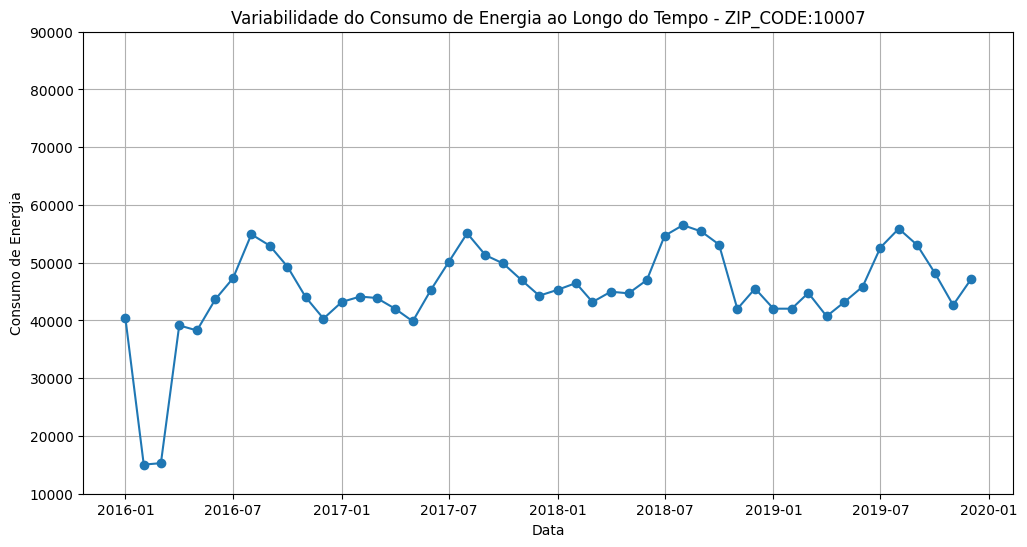

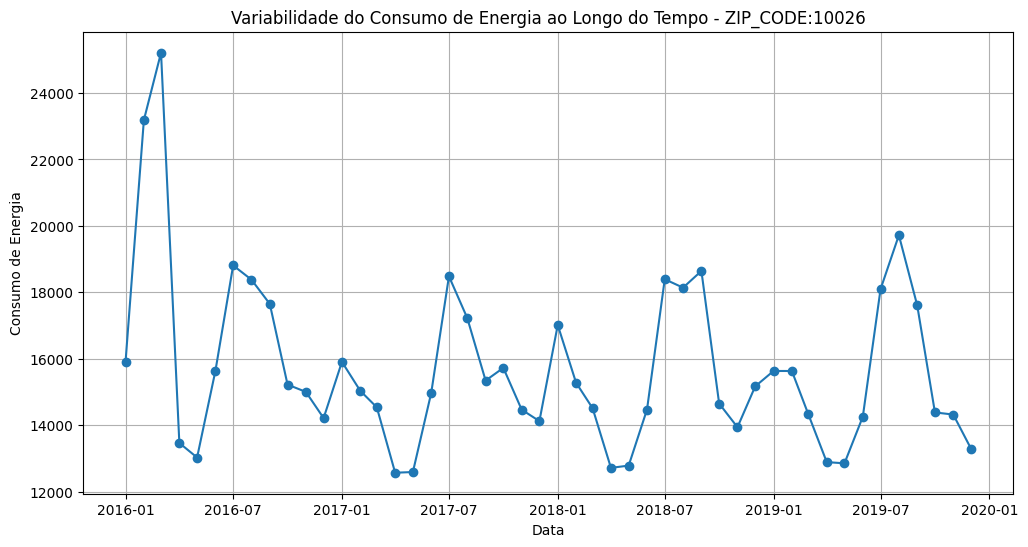

In [14]:
zip_code = 10007
# https://www.google.com/maps/@40.7132738,-74.00801499999994,18z?entry=ttu
new_york_data_1 = new_york_data[new_york_data['zip_code'] == zip_code]
new_york_data_1 = new_york_data_1.sort_values(by='datetime')
new_york_data_1
plt.figure(figsize=(12, 6))
plt.plot(new_york_data_1['datetime'], new_york_data_1['value'], marker='o', linestyle='-')
plt.title('Variabilidade do Consumo de Energia ao Longo do Tempo - ZIP_CODE:' + str(zip_code))
plt.xlabel('Data')
plt.ylabel('Consumo de Energia')
plt.grid(True)
plt.ylim(10000, 90000)
plt.show()


zip_code_2 = 10026

# (-74.00556469999998 40.72033000000005)
# https://www.google.com/maps/@40.72033000000005,-74.00556469999998,18z?entry=ttu
new_york_data_2 = new_york_data[new_york_data['zip_code'] == zip_code_2]
new_york_data_2 = new_york_data_2.sort_values(by='datetime')
new_york_data_2


plt.figure(figsize=(12, 6))
plt.plot(new_york_data_2['datetime'], new_york_data_2['value'], marker='o', linestyle='-')
plt.title('Variabilidade do Consumo de Energia ao Longo do Tempo - ZIP_CODE:' + str(zip_code_2))
plt.xlabel('Data')
plt.ylabel('Consumo de Energia')
plt.grid(True)
plt.show()

# nivelar o eixo y

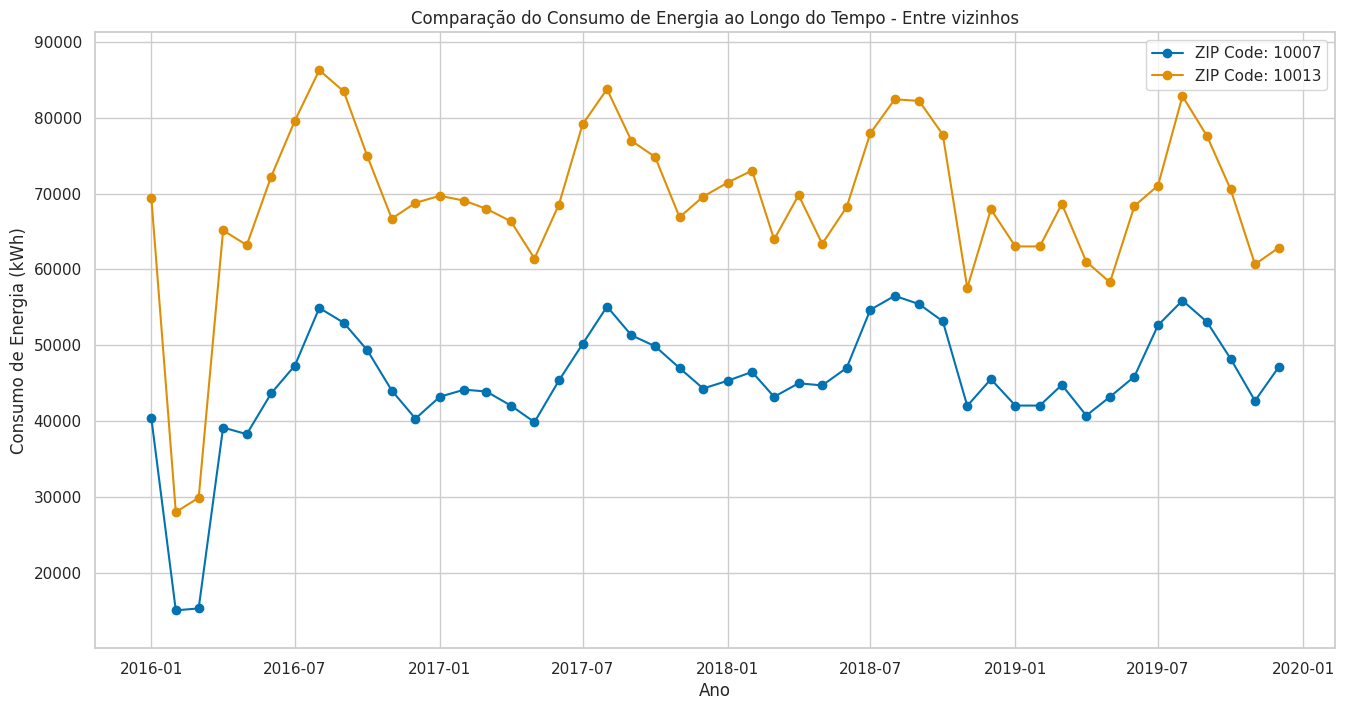

In [15]:
import seaborn as sns


# Configura o estilo
sns.set(style="whitegrid")

# Define a paleta de cores para daltônicos
colors = sns.color_palette("colorblind", 2)

# Filtra e ordena os dados para o primeiro ZIP code
zip_code_1 = 10007
new_york_data_1 = new_york_data[new_york_data['zip_code'] == zip_code_1]
new_york_data_1 = new_york_data_1.sort_values(by='datetime')

# Filtra e ordena os dados para o segundo ZIP code
zip_code_2 = 10013
new_york_data_2 = new_york_data[new_york_data['zip_code'] == zip_code_2]
new_york_data_2 = new_york_data_2.sort_values(by='datetime')


# (-74.00801499999994 40.71343000000007)
# https://www.google.com/maps/@40.71343000000007,-74.00801499999994,18z?entry=ttu
# https://www.google.com/maps/@40.72033000000005,-74.00556469999998,18z?entry=ttu

# Cria o gráfico com os dois ZIP codes
plt.figure(figsize=(16, 8))
plt.plot(new_york_data_1['datetime'], new_york_data_1['value'], marker='o', linestyle='-', color=colors[0], label=f'ZIP Code: {zip_code_1}')
plt.plot(new_york_data_2['datetime'], new_york_data_2['value'], marker='o', linestyle='-', color=colors[1], label=f'ZIP Code: {zip_code_2}')

# Títulos e rótulos
plt.title('Comparação do Consumo de Energia ao Longo do Tempo - Entre vizinhos')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia (kWh)')
plt.legend()  # Mostra a legenda
plt.grid(True)

# Mesma escala para os dois gráficos
plt.ylim(min(new_york_data_1['value'].min()-5000, new_york_data_2['value'].min()-5000),
         max(new_york_data_1['value'].max()+5000, new_york_data_2['value'].max())+5000)

# Exibe o gráfico
plt.show()

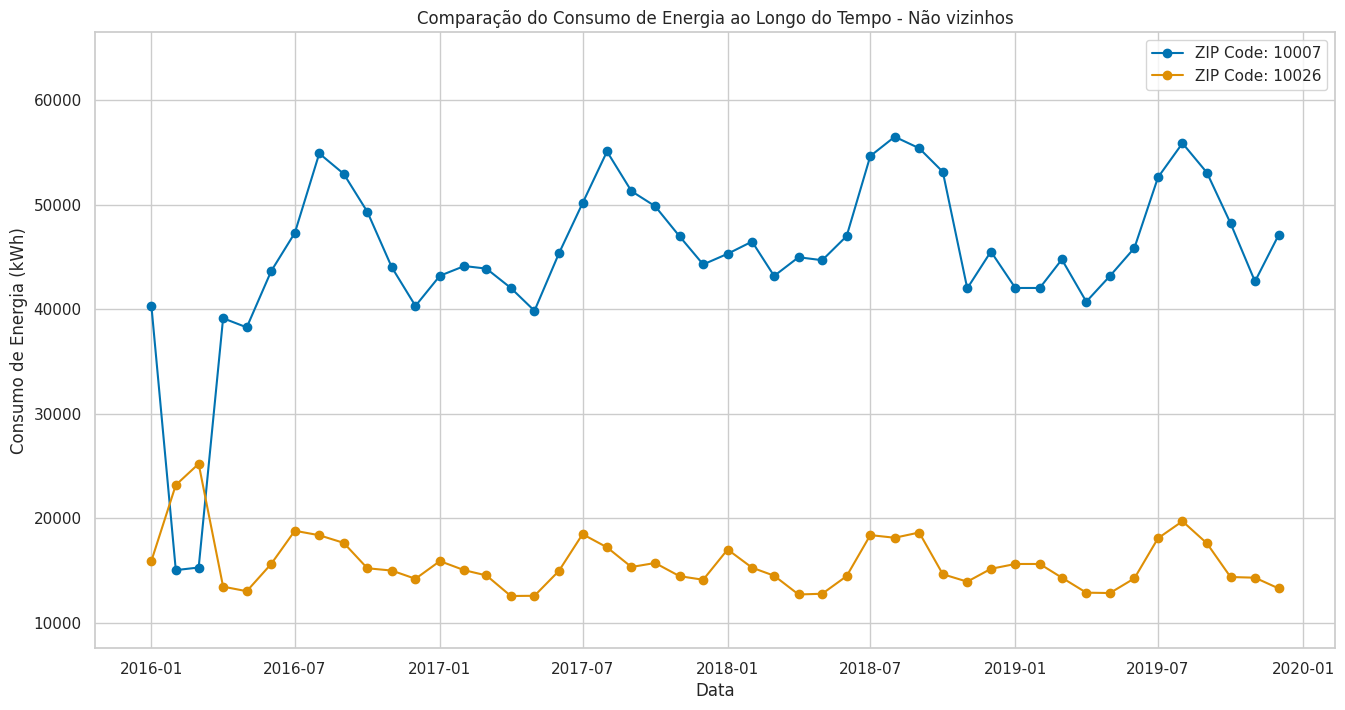

In [16]:
import seaborn as sns


# Configura o estilo
sns.set(style="whitegrid")

# Define a paleta de cores para daltônicos
colors = sns.color_palette("colorblind", 2)

# Filtra e ordena os dados para o primeiro ZIP code
zip_code_1 = 10007
new_york_data_1 = new_york_data[new_york_data['zip_code'] == zip_code_1]
new_york_data_1 = new_york_data_1.sort_values(by='datetime')

# Filtra e ordena os dados para o segundo ZIP code
zip_code_2 = 10026
new_york_data_2 = new_york_data[new_york_data['zip_code'] == zip_code_2]
new_york_data_2 = new_york_data_2.sort_values(by='datetime')


# (-74.00801499999994 40.71343000000007)
# https://www.google.com/maps/@40.71343000000007,-74.00801499999994,18z?entry=ttu
# https://www.google.com/maps/@40.72033000000005,-74.00556469999998,18z?entry=ttu

# Cria o gráfico com os dois ZIP codes
plt.figure(figsize=(16, 8))
plt.plot(new_york_data_1['datetime'], new_york_data_1['value'], marker='o', linestyle='-', color=colors[0], label=f'ZIP Code: {zip_code_1}')
plt.plot(new_york_data_2['datetime'], new_york_data_2['value'], marker='o', linestyle='-', color=colors[1], label=f'ZIP Code: {zip_code_2}')

# Títulos e rótulos
plt.title('Comparação do Consumo de Energia ao Longo do Tempo - Não vizinhos')
plt.xlabel('Data')
plt.ylabel('Consumo de Energia (kWh)')
plt.legend()  # Mostra a legenda
plt.grid(True)

# Mesma escala para os dois gráficos
plt.ylim(min(new_york_data_1['value'].min()-5000, new_york_data_2['value'].min()-5000),
         max(new_york_data_1['value'].max()+5000, new_york_data_2['value'].max())+5000)

# Exibe o gráfico
plt.show()

In [17]:
new_york_data_10007 = new_york_data[new_york_data['zip_code'] == 10007]
new_york_data_10007 = new_york_data_1.sort_values(by='datetime')

In [18]:
new_york_data_10007['index_date'] = pd.to_datetime(new_york_data_10007['datetime'])
new_york_data_10007.set_index('index_date', inplace=True)
new_york_data_10007.index.freq = 'MS'
print("quantidade de dados:", len(new_york_data_10007.value))
new_york_data_10007.head()

quantidade de dados: 48


year   data_class data_field_display_name         data_field  \
index_date                                                                 
2016-01-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-02-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-03-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-04-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-05-01  2016  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
index_date                                                               
2016-01-01  New York      1     10007      NY       3  zipcode_monthly   
2016-02-01  New York      2     10007      NY       3  zipcode_monthly   
2016-03-01  New York      3     10007      NY       3  zipcode_monthly   
2016-04-01  New York      4     10007      NY       3  zipcode_monthly   
2016-05-01  New York      5     10007      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
index_date                                                       
2016-01-01  Consolidated Edison  40357.629                3974   
2016-02-01  Consolidated Edison  15042.079                3598   
2016-03-01  Consolidated Edison  15291.937                3598   
2016-04-01  Consolidated Edison  39145.201                3974   
2016-05-01  Consolidated Edison  38270.944                3974   

                                            Georeference  \
index_date                                                 
2016-01-01  POINT (-74.00801499999994 40.71343000000007)   
2016-02-01  POINT (-74.00801499999994 40.71343000000007)   
2016-03-01  POINT (-74.00801499999994 40.71343000000007)   
2016-04-01  POINT (-74.00801499999994 40.71343000000007)   
2016-05-01  POINT (-74.00801499999994 40.71343000000007)   

            NYS Municipal Boundaries  New York Zip Codes  Counties   datetime  \
index_date                                                                      
2016-01-01                       749               723.0    2095.0 2016-01-01   
2016-02-01                       749               723.0    2095.0 2016-02-01   
2016-03-01                       749               723.0    2095.0 2016-03-01   
2016-04-01                       749               723.0    2095.0 2016-04-01   
2016-05-01                       749               723.0    2095.0 2016-05-01   

            latitude  longitude  
index_date                       
2016-01-01  40.71343 -74.008015  
2016-02-01  40.71343 -74.008015  
2016-03-01  40.71343 -74.008015  
2016-04-01  40.71343 -74.008015  
2016-05-01  40.71343 -74.008015

## Antes da Interpolação

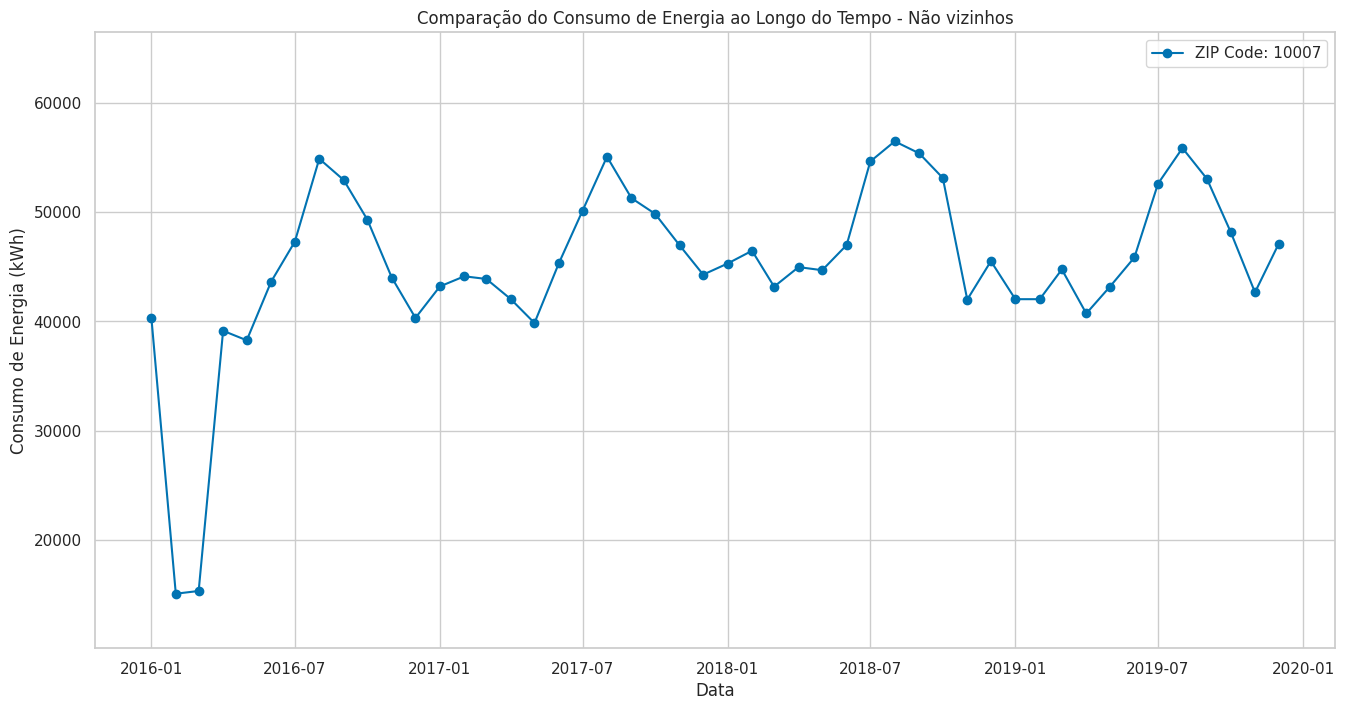

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(new_york_data_10007['datetime'], new_york_data_10007['value'], marker='o', linestyle='-', color=colors[0], label=f'ZIP Code: {zip_code_1}')

# Títulos e rótulos
plt.title('Comparação do Consumo de Energia ao Longo do Tempo - Não vizinhos')
plt.xlabel('Data')
plt.ylabel('Consumo de Energia (kWh)')
plt.legend()  # Mostra a legenda
plt.grid(True)

# Mesma escala para os dois gráficos
plt.ylim(min(new_york_data_10007['value'].min()-5000, new_york_data_10007['value'].min()-5000),
         max(new_york_data_10007['value'].max()+5000, new_york_data_10007['value'].max())+5000)

# Exibe o gráfico
plt.show()

## Interpolação

In [20]:
# new_york_data_10007.loc[new_york_data_10007.index[i], 'value_adjusted'] = (new_york_data_10007['value'][i-1] + new_york_data_10007['value'][i+1]) / 2
new_york_data_10007.loc[new_york_data_10007.index[1], 'value'] = ((new_york_data_10007['value'][0] + new_york_data_10007['value'][3]) / 2)
print(new_york_data_10007.loc[new_york_data_10007.index[1], 'value'])
new_york_data_10007.loc[new_york_data_10007.index[2], 'value'] = ((new_york_data_10007['value'][1] + new_york_data_10007['value'][3]) / 2)
print(new_york_data_10007.loc[new_york_data_10007.index[2], 'value'])

39751.415
39448.308000000005


<ipython-input-20-52755a027299>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_york_data_10007.loc[new_york_data_10007.index[1], 'value'] = ((new_york_data_10007['value'][0] + new_york_data_10007['value'][3]) / 2)
<ipython-input-20-52755a027299>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_york_data_10007.loc[new_york_data_10007.index[2], 'value'] = ((new_york_data_10007['value'][1] + new_york_data_10007['value'][3]) / 2)


## Grafico de Consumo mensal zip 10007

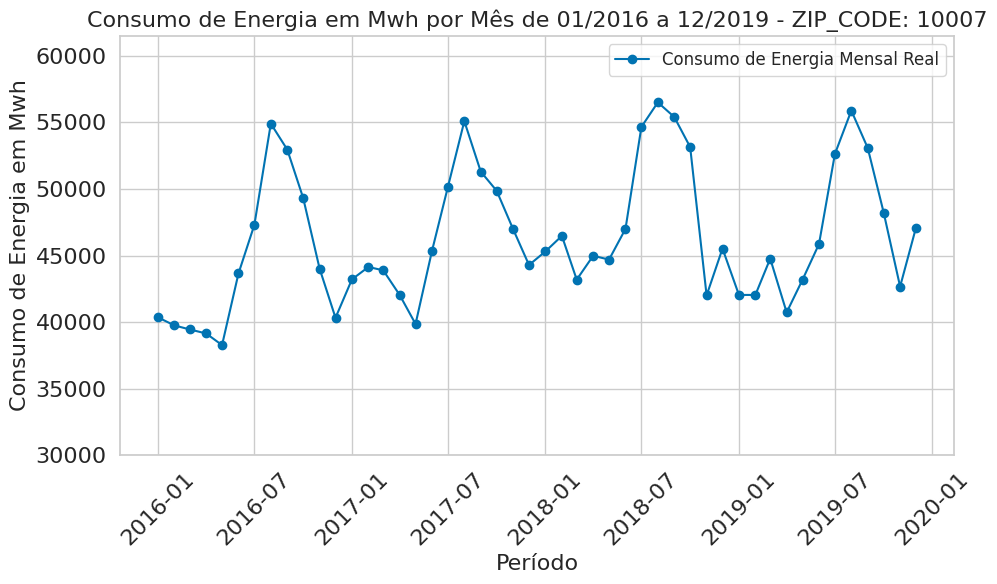

In [21]:
# plt.figure(figsize=(16, 8))
# plt.plot(new_york_data_10007['datetime'], new_york_data_10007['value'], marker='o', linestyle='-', color=colors[0], label=f'ZIP Code: {zip_code_1}')

# # Títulos e rótulos
# plt.title('Comparação do Consumo de Energia ao Longo do Tempo - Não vizinhos')
# plt.xlabel('Data')
# plt.ylabel('Consumo de Energia (kWh)')
# plt.legend()  # Mostra a legenda
# plt.grid(True)

# # Mesma escala para os dois gráficos
# plt.ylim(min(new_york_data_10007['value'].min()-5000, new_york_data_10007['value'].min()-5000),
#          max(new_york_data_10007['value'].max()+5000, new_york_data_10007['value'].max())+5000)

# # Exibe o gráfico
# plt.show()

plt.figure(figsize=(10,6))
plt.plot(new_york_data_10007['datetime'], new_york_data_10007['value'], marker='o', color=colors[0], label="Consumo de Energia Mensal Real")
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia em Mwh', fontsize=16)
plt.title("Consumo de Energia em Mwh por Mês de 01/2016 a 12/2019 - ZIP_CODE: 10007", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
max_value = max(new_york_data_10007['value'])  # Valor máximo da década
plt.ylim(30000, max_value+5000)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

## Grafico de Consumo mensal zip 10013

In [22]:
new_york_data_10013 = new_york_data[new_york_data['zip_code'] == 10013]
new_york_data_10013 = new_york_data_10013.sort_values(by='datetime')
new_york_data_10013['index_date'] = pd.to_datetime(new_york_data_10013['datetime'])
new_york_data_10013.set_index('index_date', inplace=True)
new_york_data_10013.index.freq = 'MS'
print("quantidade de dados:", len(new_york_data_10013.value))
new_york_data_10013.head()

quantidade de dados: 48


year   data_class data_field_display_name         data_field  \
index_date                                                                 
2016-01-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-02-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-03-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-04-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-05-01  2016  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
index_date                                                               
2016-01-01  New York      1     10013      NY       3  zipcode_monthly   
2016-02-01  New York      2     10013      NY       3  zipcode_monthly   
2016-03-01  New York      3     10013      NY       3  zipcode_monthly   
2016-04-01  New York      4     10013      NY       3  zipcode_monthly   
2016-05-01  New York      5     10013      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
index_date                                                       
2016-01-01  Consolidated Edison  69390.827               18982   
2016-02-01  Consolidated Edison  28000.362               17941   
2016-03-01  Consolidated Edison  29881.019               17941   
2016-04-01  Consolidated Edison  65139.854               18982   
2016-05-01  Consolidated Edison  63197.889               18982   

                                            Georeference  \
index_date                                                 
2016-01-01  POINT (-74.00556469999998 40.72033000000005)   
2016-02-01  POINT (-74.00556469999998 40.72033000000005)   
2016-03-01  POINT (-74.00556469999998 40.72033000000005)   
2016-04-01  POINT (-74.00556469999998 40.72033000000005)   
2016-05-01  POINT (-74.00556469999998 40.72033000000005)   

            NYS Municipal Boundaries  New York Zip Codes  Counties   datetime  \
index_date                                                                      
2016-01-01                       749               737.0    2095.0 2016-01-01   
2016-02-01                       749               737.0    2095.0 2016-02-01   
2016-03-01                       749               737.0    2095.0 2016-03-01   
2016-04-01                       749               737.0    2095.0 2016-04-01   
2016-05-01                       749               737.0    2095.0 2016-05-01   

            latitude  longitude  
index_date                       
2016-01-01  40.72033 -74.005565  
2016-02-01  40.72033 -74.005565  
2016-03-01  40.72033 -74.005565  
2016-04-01  40.72033 -74.005565  
2016-05-01  40.72033 -74.005565

In [23]:
# new_york_data_10013.loc[new_york_data_10013.index[i], 'value_adjusted'] = (new_york_data_10013['value'][i-1] + new_york_data_10013['value'][i+1]) / 2
new_york_data_10013.loc[new_york_data_10013.index[1], 'value'] = ((new_york_data_10013['value'][0] + new_york_data_10013['value'][3]) / 2)
print(new_york_data_10013.loc[new_york_data_10013.index[1], 'value'])
new_york_data_10013.loc[new_york_data_10013.index[2], 'value'] = ((new_york_data_10013['value'][1] + new_york_data_10013['value'][3]) / 2)
print(new_york_data_10013.loc[new_york_data_10013.index[2], 'value'])

67265.3405
66202.59725


<ipython-input-23-25a10004c61a>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_york_data_10013.loc[new_york_data_10013.index[1], 'value'] = ((new_york_data_10013['value'][0] + new_york_data_10013['value'][3]) / 2)
<ipython-input-23-25a10004c61a>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_york_data_10013.loc[new_york_data_10013.index[2], 'value'] = ((new_york_data_10013['value'][1] + new_york_data_10013['value'][3]) / 2)


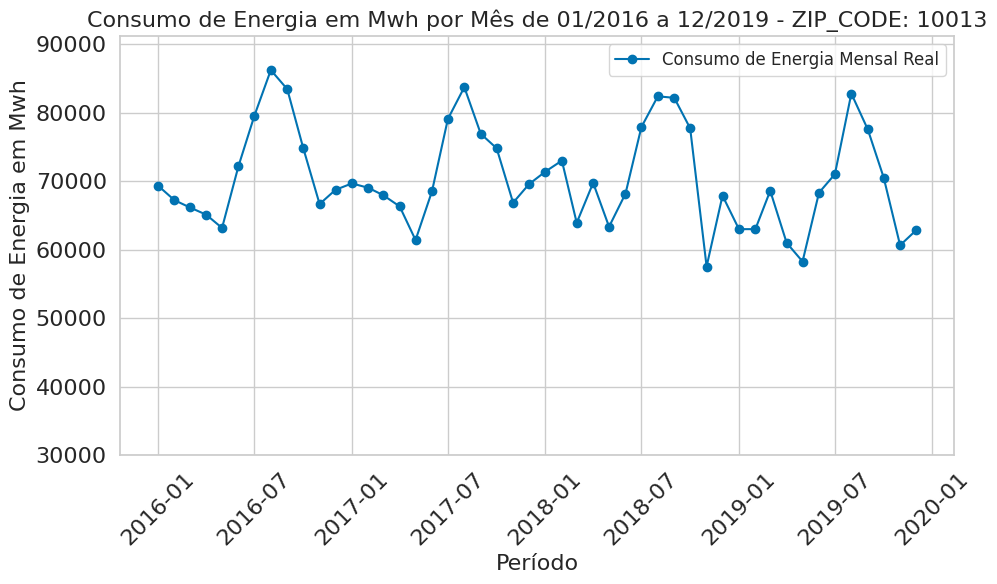

In [24]:
plt.figure(figsize=(10,6))
plt.plot(new_york_data_10013['datetime'], new_york_data_10013['value'], marker='o', color=colors[0], label="Consumo de Energia Mensal Real")
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia em Mwh', fontsize=16)
plt.title("Consumo de Energia em Mwh por Mês de 01/2016 a 12/2019 - ZIP_CODE: 10013", fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
max_value = max(new_york_data_10013['value'])  # Valor máximo da década
plt.ylim(30000, max_value+5000)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

## Metodo de testar estacionaridade: 10007 e 10013

In [25]:
from statsmodels.tsa.stattools import adfuller

def testar_estacionariedade(serie):
    # Teste de Dickey-Fuller Aumentado (ADF)
    resultado_adf = adfuller(serie)
    print("Teste de Dickey-Fuller Aumentado (ADF)")
    print(f"Estatística do teste: {resultado_adf[0]}")
    print(f"Valor-p: {resultado_adf[1]}")
    print(f"Número de lags utilizados: {resultado_adf[2]}")
    print(f"Número de observações utilizadas: {resultado_adf[3]}")
    print("Resultado do teste:")
    if resultado_adf[1] <= 0.05:
        print("A série é estacionária.")
    else:
        print("A série não é estacionária.")

testar_estacionariedade(new_york_data_10007['value'])

Teste de Dickey-Fuller Aumentado (ADF)
Estatística do teste: -1.5851034051135673
Valor-p: 0.49107211663707223
Número de lags utilizados: 9
Número de observações utilizadas: 38
Resultado do teste:
A série não é estacionária.


### 10013

In [26]:
testar_estacionariedade(new_york_data_10013['value'])

Teste de Dickey-Fuller Aumentado (ADF)
Estatística do teste: -0.46171990617328745
Valor-p: 0.8992726243040414
Número de lags utilizados: 10
Número de observações utilizadas: 37
Resultado do teste:
A série não é estacionária.


In [27]:
new_york_data_10013['diff_value'] = new_york_data_10013['value'].diff()
new_york_data_10013.diff_value[0] = new_york_data_10013.diff_value[1]
new_york_data_10013.diff_value.head()

<ipython-input-27-7b4736d551c2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_york_data_10013.diff_value[0] = new_york_data_10013.diff_value[1]
<ipython-input-27-7b4736d551c2>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure thi

index_date
2016-01-01   -2125.48650
2016-02-01   -2125.48650
2016-03-01   -1062.74325
2016-04-01   -1062.74325
2016-05-01   -1941.96500
Freq: MS, Name: diff_value, dtype: float64

In [28]:
testar_estacionariedade(new_york_data_10013['diff_value'])

Teste de Dickey-Fuller Aumentado (ADF)
Estatística do teste: -6.87772591478559
Valor-p: 1.459980977955281e-09
Número de lags utilizados: 10
Número de observações utilizadas: 37
Resultado do teste:
A série é estacionária.


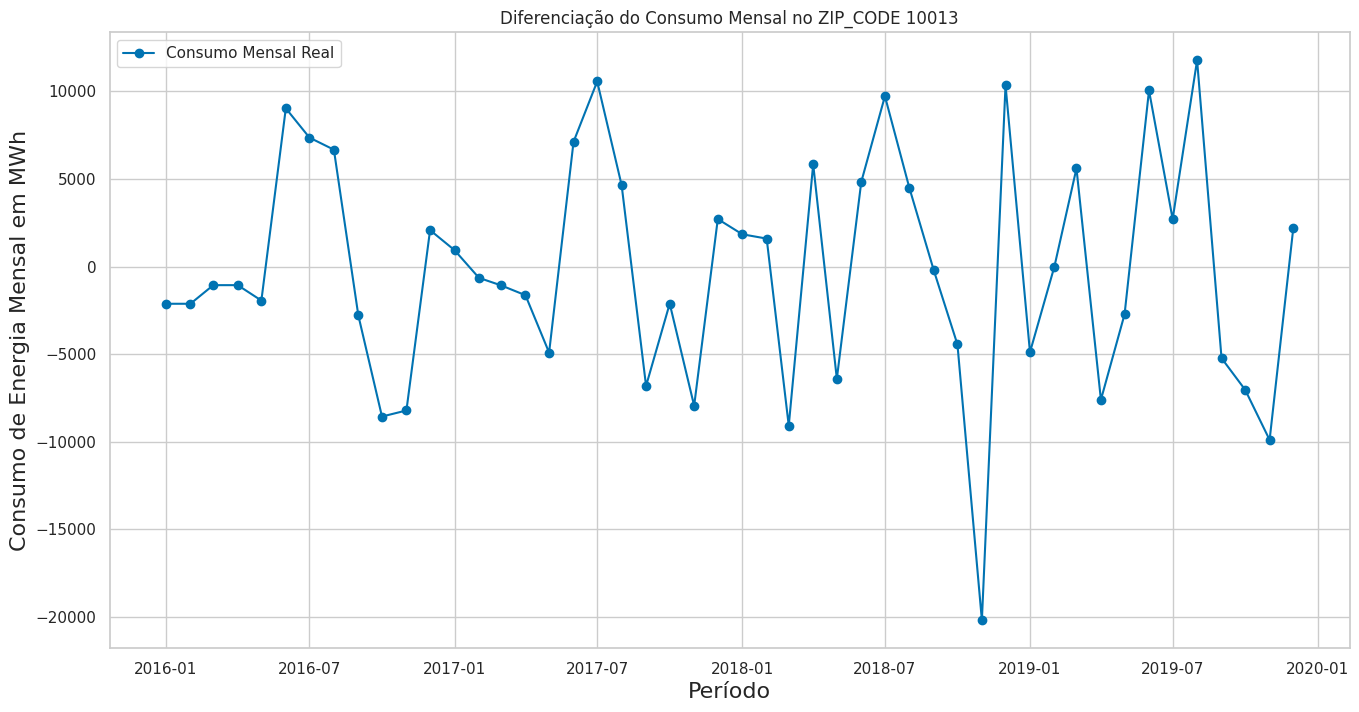

In [29]:
plt.figure(figsize=(16, 8))
plt.plot(new_york_data_10013['datetime'], new_york_data_10013['diff_value'], marker='o', linestyle='-', color=colors[0], label=f'Consumo Mensal Real')

# Títulos e rótulos
plt.title('Diferenciação do Consumo Mensal no ZIP_CODE 10013')
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend()  # Mostra a legenda
plt.grid(True)

# Exibe o gráfico
plt.show()

## Fazendo a Diferenciação pois a serie não é estacionária

In [30]:
new_york_data_10007['diff_value'] = new_york_data_10007['value'].diff()
new_york_data_10007.diff_value[0] = new_york_data_10007.diff_value[1]
new_york_data_10007.diff_value.head()

<ipython-input-30-f4ebe0d4471c>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_york_data_10007.diff_value[0] = new_york_data_10007.diff_value[1]
<ipython-input-30-f4ebe0d4471c>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure thi

index_date
2016-01-01   -606.214
2016-02-01   -606.214
2016-03-01   -303.107
2016-04-01   -303.107
2016-05-01   -874.257
Freq: MS, Name: diff_value, dtype: float64

## Realizando o teste de estacionaridade novamente apos o diff

In [31]:
testar_estacionariedade(new_york_data_10007['diff_value'])

Teste de Dickey-Fuller Aumentado (ADF)
Estatística do teste: -4.2662095783065
Valor-p: 0.0005080245690384915
Número de lags utilizados: 10
Número de observações utilizadas: 37
Resultado do teste:
A série é estacionária.


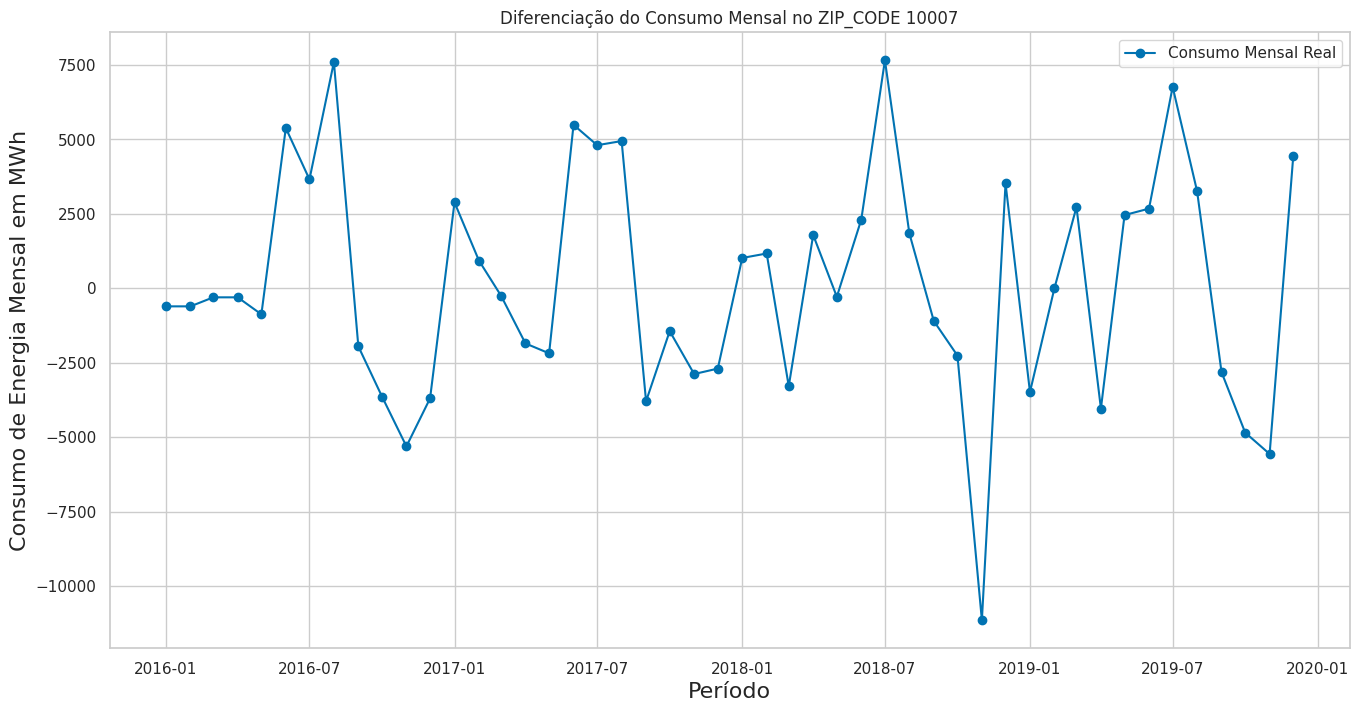

In [32]:
plt.figure(figsize=(16, 8))
plt.plot(new_york_data_10007['datetime'], new_york_data_10007['diff_value'], marker='o', linestyle='-', color=colors[0], label=f'Consumo Mensal Real')

# Títulos e rótulos
plt.title('Diferenciação do Consumo Mensal no ZIP_CODE 10007')
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend()  # Mostra a legenda
plt.grid(True)

# Exibe o gráfico
plt.show()

## Plotando ACF e PACF - sem diferenciação

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

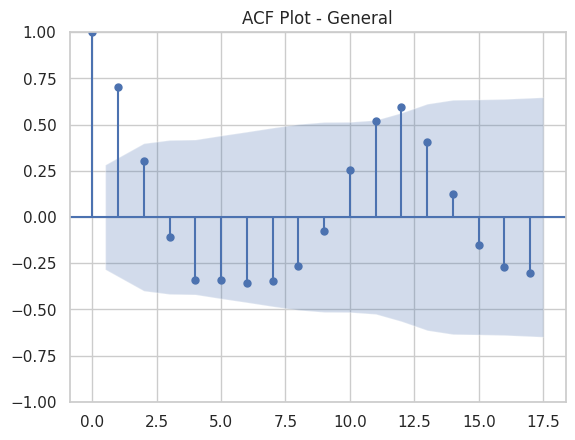

In [34]:
plot_acf(new_york_data_10007.value)
plt.title("ACF Plot - General")
plt.show()

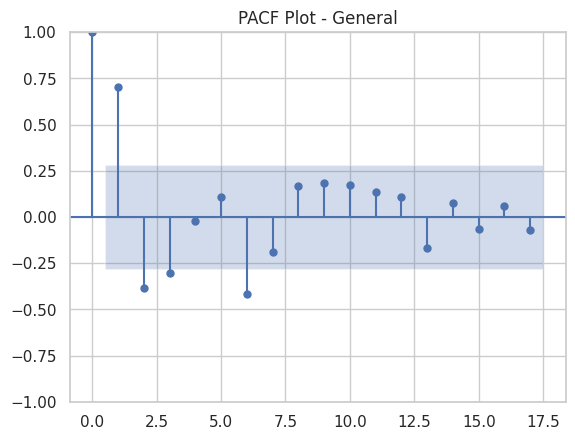

In [35]:
plot_pacf(new_york_data_10007.value)
plt.title("PACF Plot - General")
plt.show()

## Plotando ACF e PACF - 10007 - com diferenciação

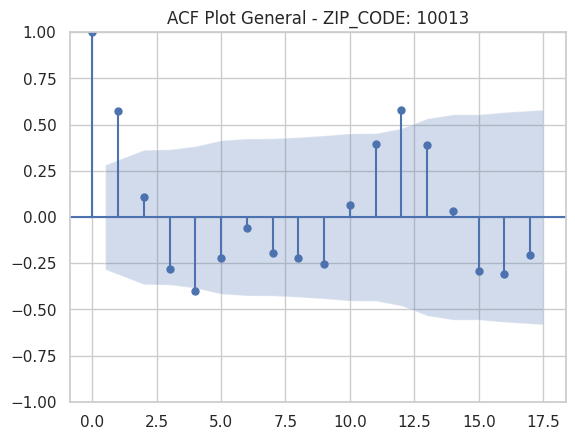

In [36]:
plot_acf(new_york_data_10013.value)
plt.title("ACF Plot General - ZIP_CODE: 10013")
plt.show()

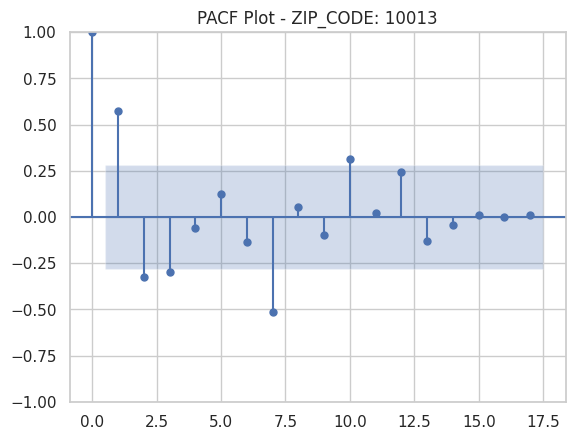

In [37]:
plot_pacf(new_york_data_10013.value)
plt.title("PACF Plot - ZIP_CODE: 10013")
plt.show()

## Plotando ACF e PACF - 10013 - com diferenciação

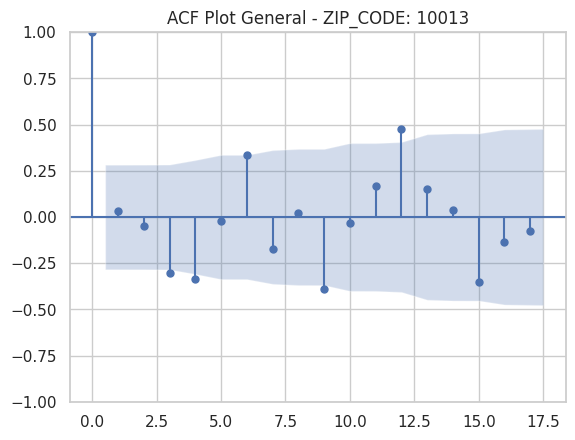

In [38]:
plot_acf(new_york_data_10013.diff_value)
plt.title("ACF Plot General - ZIP_CODE: 10013")
plt.show()

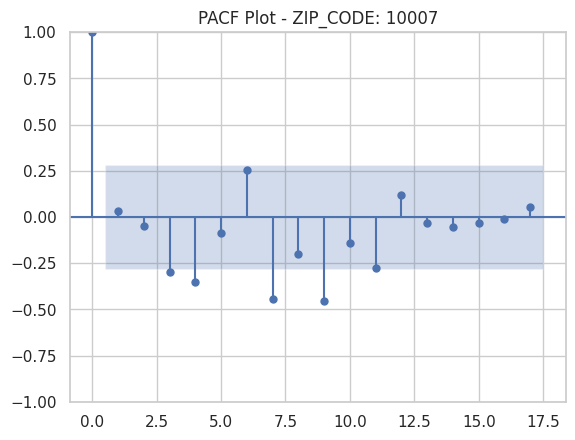

In [39]:
plot_pacf(new_york_data_10013.diff_value)
plt.title("PACF Plot - ZIP_CODE: 10007")
plt.show()

# Decompor as respectivas séries - Análise exploratória

## verificando sazonalidade

### Scatter Plot - Normas dos Ruídos - 10007

I 0 [0.30347948]
I 1 [-0.40910625]
I 2 [-0.08548359]
I 3 [0.76900838]


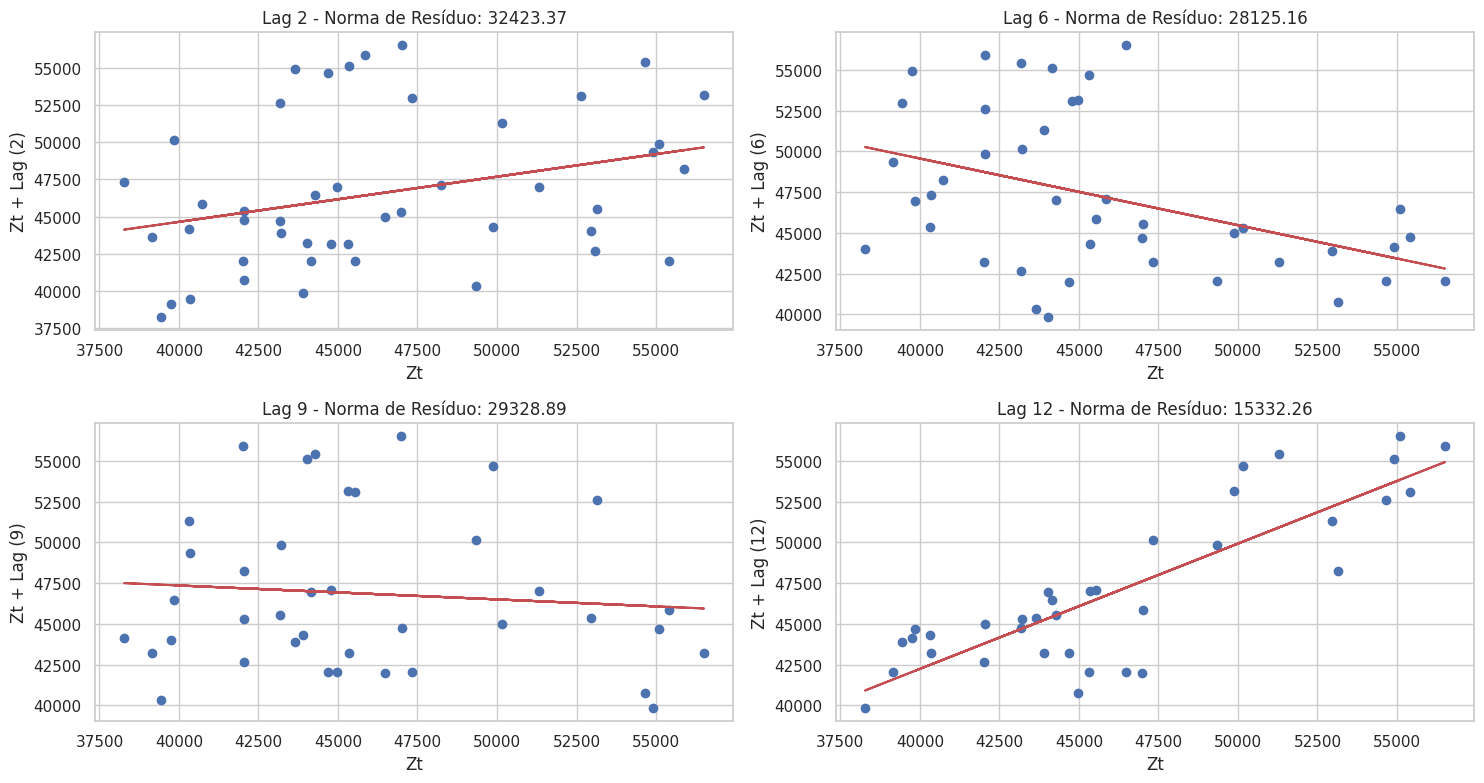

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

intervalos_lag = [2,6,9,12]  #Array de intervalos de lag
normas_residuo = []

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()

for i, lag in enumerate(intervalos_lag):
    #Aplica os vaores de lag as observações
    x = new_york_data_10007['value'].values[:-lag]
    y = new_york_data_10007['value'].values[lag:]

    #Faz o fit, input/output
    model.fit(x.reshape(-1,1), y)
    #Realiza a previsão, output com relação aos inputs
    pred = model.predict(x.reshape(-1,1))
    print("I", i, model.coef_)

    #Calcula a norma dos resíduos
    residuos = np.sqrt(np.sum((y - pred) ** 2))
    normas_residuo.append(residuos)

    axs[i].scatter(x, y)
    axs[i].set_xlabel('Zt')
    axs[i].set_ylabel(f'Zt + Lag ({lag})')
    axs[i].set_title(f'Lag {lag} - Norma de Resíduo: {normas_residuo[i]:.2f}')
    axs[i].plot(x, pred, color = 'r')

plt.tight_layout()
plt.show()

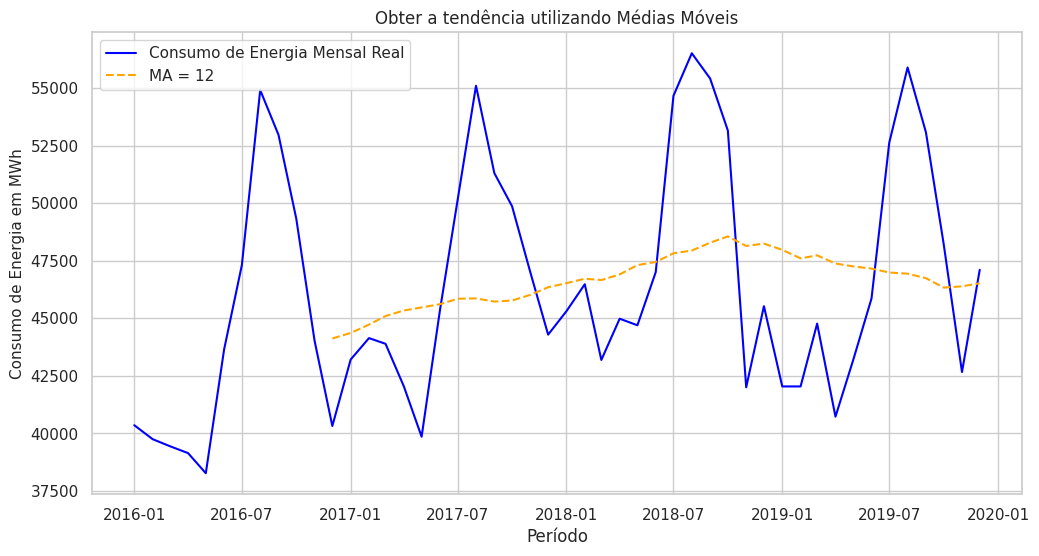

In [41]:
anual = new_york_data_10007.value.rolling(12).mean()
plt.figure(figsize=(12, 6))
plt.plot(new_york_data_10007.value, color="blue", label='Consumo de Energia Mensal Real')
plt.plot(anual, color="orange", linestyle="--", label='MA = 12')
plt.title('Obter a tendência utilizando Médias Móveis')
plt.xlabel('Período')
plt.ylabel('Consumo de Energia em MWh', fontsize=11)
plt.legend()
plt.show()

# # Aplicando filtro de 2018 a 2022
# plt.figure(figsize=(12, 6))
# plt.plot(new_york_data_10007.value[recorte], color="blue", label='Consumo de Energia Mensal Real')
# plt.plot(anual[recorte], color="orange", linestyle="--", label='MA = 12')
# plt.title('Obter a tendência - Recorte 2018 a 2022', fontsize=16)
# plt.xlabel('Período', fontsize=16)
# plt.ylabel('Consumo de Energia em MWh', fontsize=16)
# plt.legend(fontsize=16)
# plt.show()

### Scatter Plot - Normas dos Ruídos - 10013

I 0 [0.1142523]
I 1 [-0.07110442]
I 2 [-0.33028579]
I 3 [0.8452642]


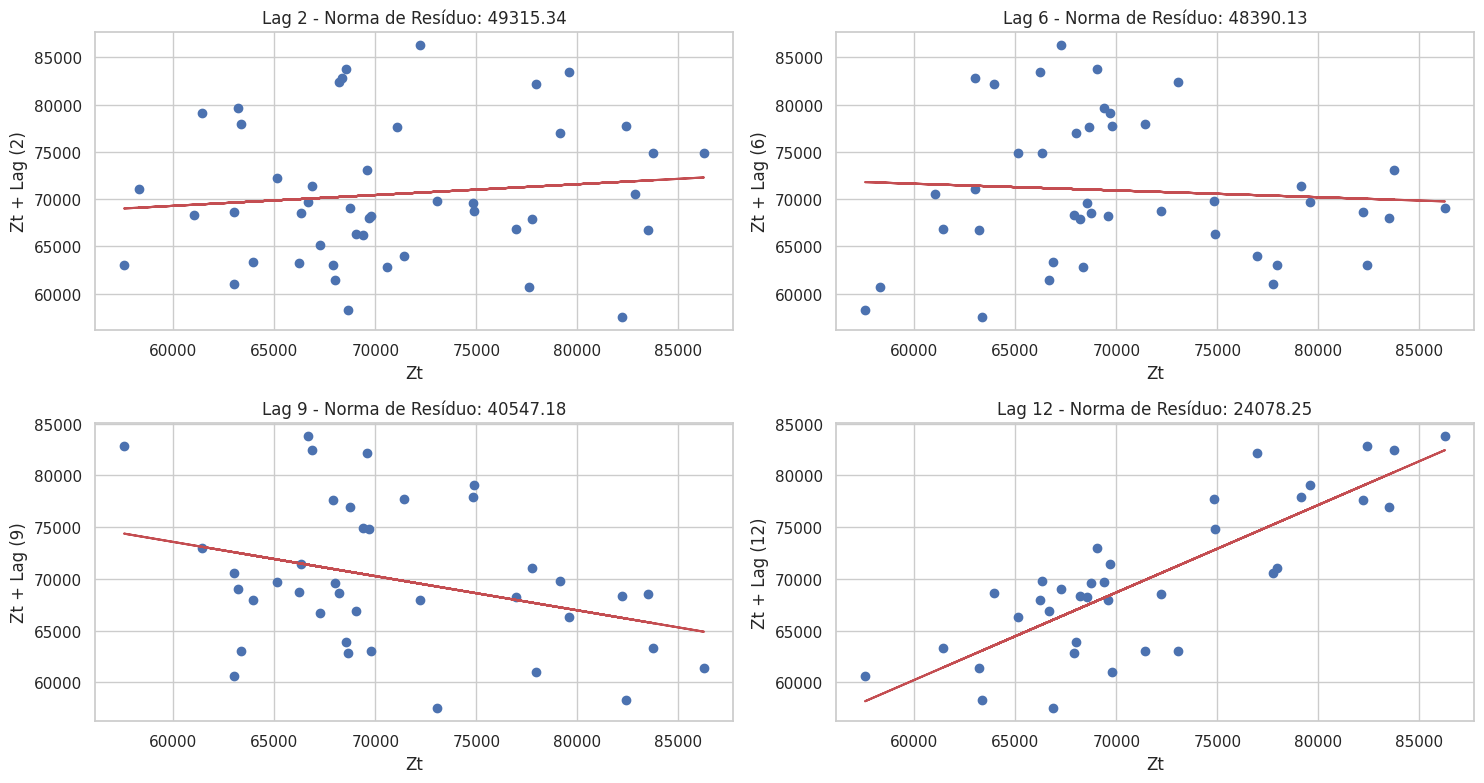

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

intervalos_lag = [2,6,9,12]  #Array de intervalos de lag
normas_residuo = []

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.ravel()

for i, lag in enumerate(intervalos_lag):
    #Aplica os vaores de lag as observações
    x = new_york_data_10013['value'].values[:-lag]
    y = new_york_data_10013['value'].values[lag:]

    #Faz o fit, input/output
    model.fit(x.reshape(-1,1), y)
    #Realiza a previsão, output com relação aos inputs
    pred = model.predict(x.reshape(-1,1))
    print("I", i, model.coef_)

    #Calcula a norma dos resíduos
    residuos = np.sqrt(np.sum((y - pred) ** 2))
    normas_residuo.append(residuos)

    axs[i].scatter(x, y)
    axs[i].set_xlabel('Zt')
    axs[i].set_ylabel(f'Zt + Lag ({lag})')
    axs[i].set_title(f'Lag {lag} - Norma de Resíduo: {normas_residuo[i]:.2f}')
    axs[i].plot(x, pred, color = 'r')

plt.tight_layout()
plt.show()

## Plot do grafico de sazonalidade

In [43]:
anual_sazonalidade = pd.DataFrame(new_york_data_10007.value)
anual_sazonalidade['indice_sazonal'] = new_york_data_10007['value'] - anual
anual_sazonalidade['month'] = new_york_data_10007['month']
anual_sazonalidade = anual_sazonalidade.dropna()
anual_sazonalidade

value  indice_sazonal  month
index_date                                  
2016-12-01  40322.978    -3801.356417     12
2017-01-01  43209.059    -1152.894583      1
2017-02-01  44140.033     -587.638750      2
2017-03-01  43892.456    -1205.561417      3
2017-04-01  42041.252    -3298.103000      4
2017-05-01  39857.077    -5614.455750      5
2017-06-01  45348.011     -264.615417      6
2017-07-01  50154.264     4304.943667      7
2017-08-01  55100.364     9235.444167      8
2017-09-01  51305.953     5579.194917      9
2017-10-01  49867.167     4095.585083     10
2017-11-01  46987.548      968.701167     11
2017-12-01  44291.112    -2058.412667     12
2018-01-01  45310.480    -1214.163083      1
2018-02-01  46479.651     -239.960250      2
2018-03-01  43191.423    -3469.768833      3
2018-04-01  44982.398    -1923.889333      4
2018-05-01  44697.719    -2611.955167      5
2018-06-01  47005.075     -442.687833      6
2018-07-01  54665.052     6841.390167      7
2018-08-01  56511.136     8569.909833      8
2018-09-01  55413.649     7130.114833      9
2018-10-01  53153.243     4595.869167     10
2018-11-01  42003.814    -6138.248667     11
2018-12-01  45526.390    -2718.612500     12
2019-01-01  42041.048    -5931.501833      1
2019-02-01  42041.048    -5561.618250      2
2019-03-01  44769.144    -2964.999000      3
2019-04-01  40728.874    -6650.808667      4
2019-05-01  43188.449    -4065.461167      5
2019-06-01  45864.743    -1294.139500      6
2019-07-01  52630.556     5641.214833      7
2019-08-01  55893.302     8955.447000      8
2019-09-01  53078.396     6335.145417      9
2019-10-01  48231.725     1898.600917     10
2019-11-01  42667.199    -3721.207167     11
2019-12-01  47105.769      585.747917     12

In [44]:
#Separa os índices sazonais em 12 colunas que equivalem aos meses do ano
sazonalidade = anual_sazonalidade.pivot(columns='month', values='indice_sazonal')

#Calcula as médias dos índices sazonais
mean_ad = {}

for i in range(1, 13):
  new_row = sazonalidade[i].mean().round(2)
  mean_ad[i] = new_row

mean_ad = pd.DataFrame(mean_ad, index=[0])
mean_sum = mean_ad.sum(axis=1).sum().round(2)

mean_sea_index_ad = {}
for i in range(1, 13):
   media = float(mean_ad[i]) - (mean_sum / 12).round(2)
   mean_sea_index_ad[i] = media

saz = [mean_sea_index_ad[i % len(mean_sea_index_ad) + 1] for i in range(len(anual_sazonalidade))]
anual_sazonalidade['Sazonalidade_AD'] = saz
anual_sazonalidade

<ipython-input-44-5c068d444848>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  media = float(mean_ad[i]) - (mean_sum / 12).round(2)


value  indice_sazonal  month  Sazonalidade_AD
index_date                                                   
2016-12-01  40322.978    -3801.356417     12         -3038.51
2017-01-01  43209.059    -1152.894583      1         -2402.06
2017-02-01  44140.033     -587.638750      2         -2819.10
2017-03-01  43892.456    -1205.561417      3         -4229.92
2017-04-01  42041.252    -3298.103000      4         -4369.61
2017-05-01  39857.077    -5614.455750      5          -939.47
2017-06-01  45348.011     -264.615417      6          5323.53
2017-07-01  50154.264     4304.943667      7          8647.95
2017-08-01  55100.364     9235.444167      8          6075.83
2017-09-01  51305.953     5579.194917      9          3257.70
2017-10-01  49867.167     4095.585083     10         -3235.90
2017-11-01  46987.548      968.701167     11         -2270.48
2017-12-01  44291.112    -2058.412667     12         -3038.51
2018-01-01  45310.480    -1214.163083      1         -2402.06
2018-02-01  46479.651     -239.960250      2         -2819.10
2018-03-01  43191.423    -3469.768833      3         -4229.92
2018-04-01  44982.398    -1923.889333      4         -4369.61
2018-05-01  44697.719    -2611.955167      5          -939.47
2018-06-01  47005.075     -442.687833      6          5323.53
2018-07-01  54665.052     6841.390167      7          8647.95
2018-08-01  56511.136     8569.909833      8          6075.83
2018-09-01  55413.649     7130.114833      9          3257.70
2018-10-01  53153.243     4595.869167     10         -3235.90
2018-11-01  42003.814    -6138.248667     11         -2270.48
2018-12-01  45526.390    -2718.612500     12         -3038.51
2019-01-01  42041.048    -5931.501833      1         -2402.06
2019-02-01  42041.048    -5561.618250      2         -2819.10
2019-03-01  44769.144    -2964.999000      3         -4229.92
2019-04-01  40728.874    -6650.808667      4         -4369.61
2019-05-01  43188.449    -4065.461167      5          -939.47
2019-06-01  45864.743    -1294.139500      6          5323.53
2019-07-01  52630.556     5641.214833      7          8647.95
2019-08-01  55893.302     8955.447000      8          6075.83
2019-09-01  53078.396     6335.145417      9          3257.70
2019-10-01  48231.725     1898.600917     10         -3235.90
2019-11-01  42667.199    -3721.207167     11         -2270.48
2019-12-01  47105.769      585.747917     12         -3038.51

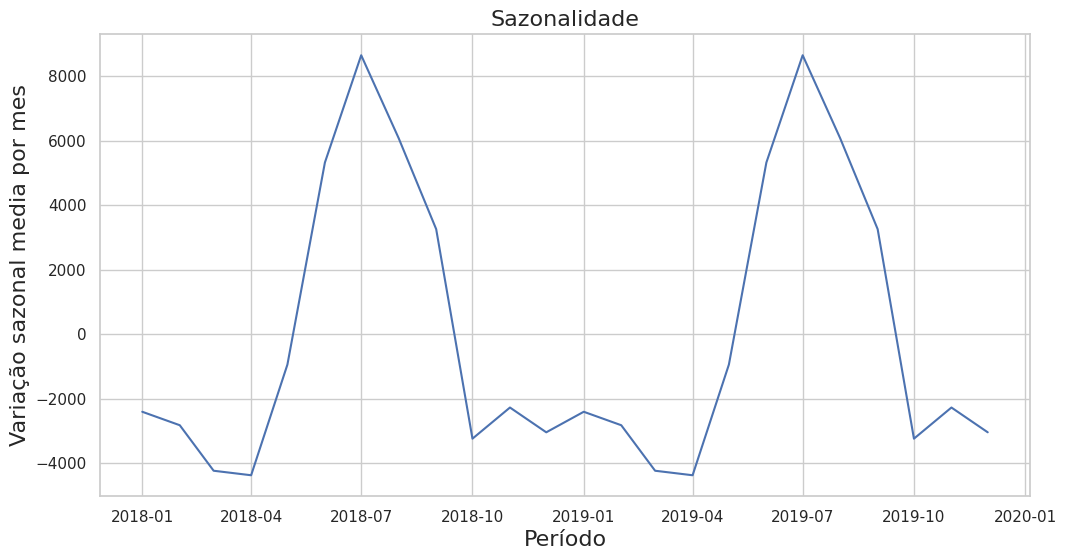

In [45]:
recorte_anual_sazonalidade = (anual_sazonalidade.index.year > 2017) & (anual_sazonalidade.index.year <= 2022)
plt.figure(figsize=(12, 6))
plt.plot(anual_sazonalidade[recorte_anual_sazonalidade].Sazonalidade_AD)
plt.title('Sazonalidade', fontsize=16)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Variação sazonal media por mes', fontsize=16)
plt.show()

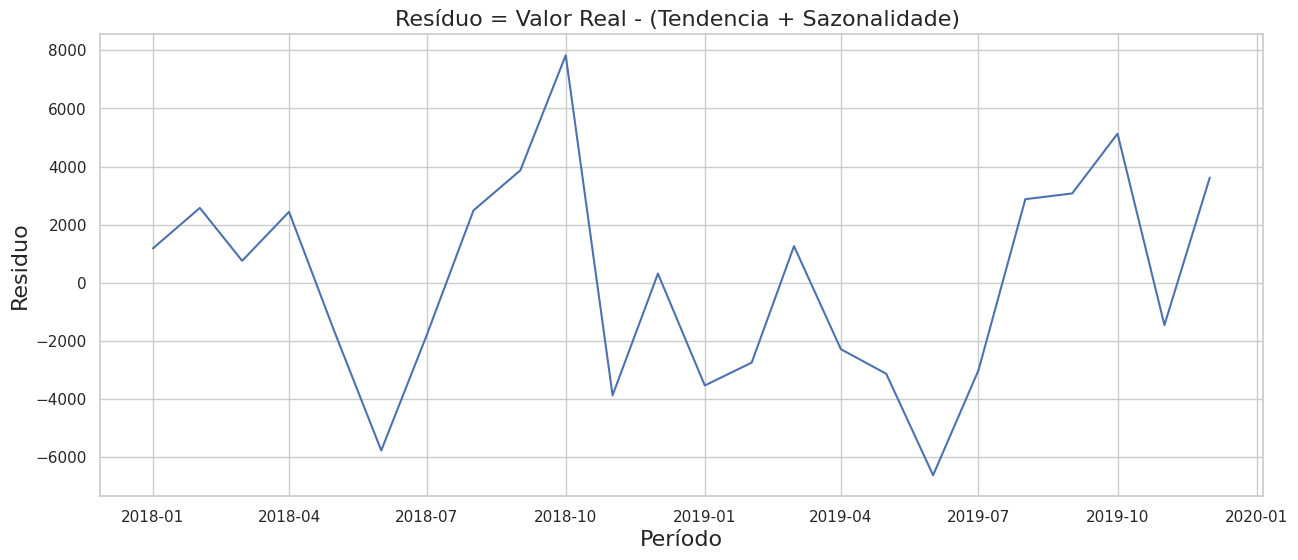

In [46]:
anual_sazonalidade['Residuo'] = anual_sazonalidade['value'] - (anual + anual_sazonalidade['Sazonalidade_AD'])

plt.figure(figsize=(15, 6))
plt.plot(anual_sazonalidade[recorte_anual_sazonalidade].Residuo)
plt.title('Resíduo = Valor Real - (Tendencia + Sazonalidade) ', fontsize=16)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Residuo', fontsize=16)
plt.show()

In [47]:
def mean_absolute_percentage_error(y_real, y_pred):
    y_real[y_real == 0] = 1e-10
    y_real, y_pred = np.array(y_real), np.array(y_pred)
    return np.mean(np.abs((y_real - y_pred) / y_real)) * 100

# Técnica NAIVE - Inocente (somente dado anterior) lag=1

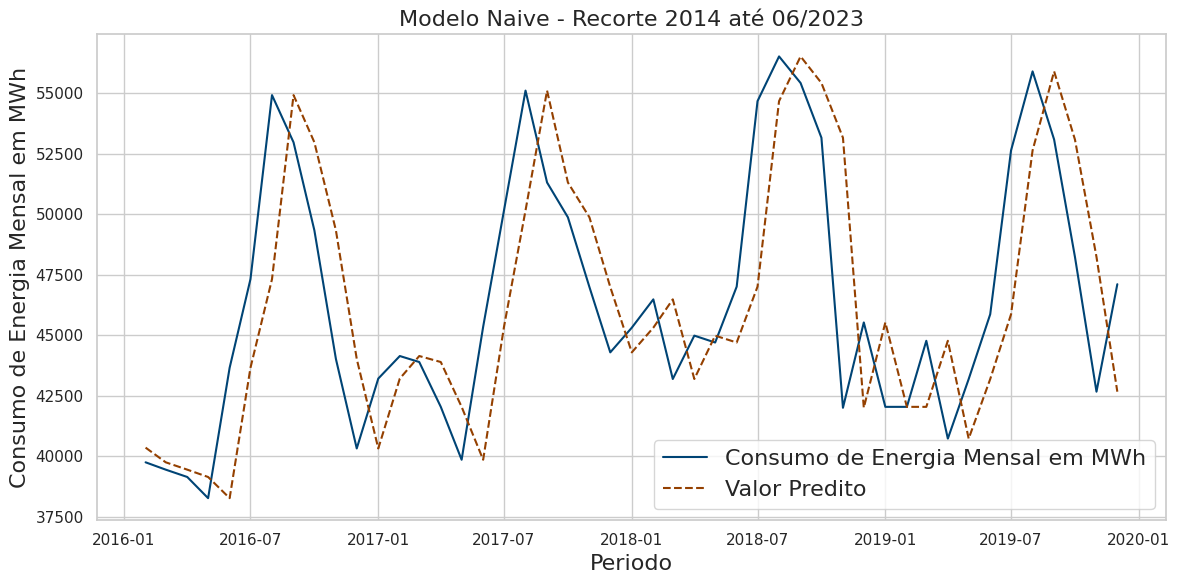

Erro Quadrado Médio (MSE) do Modelo Naive: 14937824.325847533
Coeficiente de Determinação (R-squared) do Modelo Naive: 0.41998780496040755


In [ ]:
# Definir lag para o modelo Naive (lag=1)
lag = 1

new_york_data_10007_NAIVE = new_york_data_10007.copy()
filtro2 = (new_york_data_10007_NAIVE.index.year > 2017) & (new_york_data_10007_NAIVE.index.year <= 2022)

# Calcular os lags dos logs
new_york_data_10007_NAIVE['log_lag_1'] = new_york_data_10007_NAIVE['value'].shift(lag)

# Remover as primeiras linhas que contêm valores nulos
new_york_data_10007_NAIVE = new_york_data_10007_NAIVE.dropna()

recorte2014 = (new_york_data_10007_NAIVE.index.year > 2013)

# Calcular previsões usando o modelo Naive
naive_predictions = new_york_data_10007_NAIVE['log_lag_1']

# Calcular resíduos
residuals = new_york_data_10007_NAIVE['value'] - naive_predictions

# Calcular métrica de avaliação (por exemplo, Erro Quadrado Médio)
mse = mean_squared_error(new_york_data_10007_NAIVE['value'], naive_predictions)
r2 = r2_score(new_york_data_10007_NAIVE['value'], naive_predictions)

# PT - Plotar previsões do modelo Naive
plt.figure(figsize=(12, 6))
plt.plot(new_york_data_10007_NAIVE[recorte2014].index, new_york_data_10007_NAIVE[recorte2014]['value'], label='Consumo de Energia Mensal em MWh', color=corTreinoReal)
plt.plot(new_york_data_10007_NAIVE[recorte2014].index, naive_predictions[recorte2014], linestyle='--', label='Valor Predito', color=corTestReal)
plt.xlabel('Periodo', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.title('Modelo Naive - Recorte 2014 até 06/2023', fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

# EN - Plotar previsões do modelo Naive
# plt.figure(figsize=(12, 6))
# plt.plot(new_york_data_10007_NAIVE.index, new_york_data_10007_NAIVE['value'], label='Monthly Energy Consumption in MWh', color=corTreinoReal)
# plt.plot(new_york_data_10007_NAIVE.index, naive_predictions, linestyle='--', label='Predicted Value', color=corTestReal)
# plt.xlabel('Period', fontsize=16)
# plt.ylabel('Monthly Energy Consumption in MWh', fontsize=16)
# plt.title('NAIVE Model - Subset from 2014 to 06/2023', fontsize=16)
# plt.legend(fontsize=16)
# plt.tight_layout()
# plt.show()

print(f'Erro Quadrado Médio (MSE) do Modelo Naive: {mse}')
# MSE = 48496.58187134503
print(f'Coeficiente de Determinação (R-squared) do Modelo Naive: {r2}')

In [ ]:
naive_predictions[-1]

<ipython-input-49-89a6a76a0aaf>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_predictions[-1]


42667.199

# Suavização Exponencial Simples

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-50-4eb9a7756d72>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(model_suave_forecast.index, model_suave_forecast[0], linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
<ipython-input-50-4eb9a7756d72>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {int(model_suave_forecast[0])}", (model_suave_forecast.index, model_suave_forecast[0]), color="red", fontsize=16, ha='center', va='bot

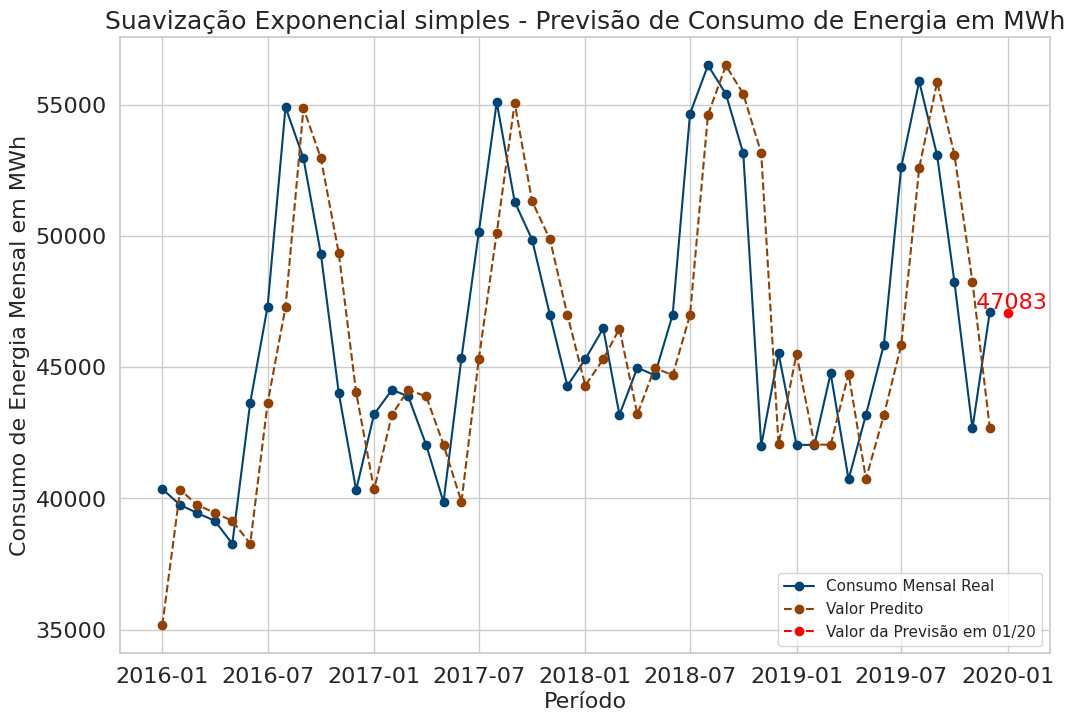

In [ ]:
new_york_data_10007_suavi_simples = new_york_data_10007.copy()

model_suave = sm.tsa.SimpleExpSmoothing(new_york_data_10007_suavi_simples.value, initialization_method='estimated').fit()
model_suave_forecast = model_suave.forecast(1)


# PT
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_suavi_simples.index, new_york_data_10007_suavi_simples.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(model_suave.fittedvalues, color=corTestReal, marker='o', linestyle="--",  label='Valor Predito')
plt.plot(model_suave_forecast.index, model_suave_forecast[0], linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(model_suave_forecast[0])}", (model_suave_forecast.index, model_suave_forecast[0]), color="red", fontsize=16, ha='center', va='bottom')
plt.title('Suavização Exponencial simples - Previsão de Consumo de Energia em MWh', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Metrica

In [ ]:
mse = mean_squared_error(new_york_data_10007_suavi_simples['value'], model_suave.fittedvalues)
rmse = np.sqrt(mse)
r2 = r2_score(new_york_data_10007_suavi_simples['value'], model_suave.fittedvalues)

print(f'Erro Quadrado Médio (MSE) da Suavização Simples: {mse}')
print(f'Raiz do Erro Quadrado Médio (MSE) da Suavização Simples: {rmse}')
print(f'Coeficiente de Determinação (R-squared) da Suavização Simples: {r2}')

Erro Quadrado Médio (MSE) da Suavização Simples: 15215547.10883247
Raiz do Erro Quadrado Médio (MSE) da Suavização Simples: 3900.7111029698763
Coeficiente de Determinação (R-squared) da Suavização Simples: 0.4141456773600185


# Suavização de Holt-Winters

                previsao
2020-01-01  44074.823836


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
<ipython-input-52-002642eb3efe>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {round(forecast_df['previsao'][0])}", (forecast_df.index[0], forecast_df['previsao'][0]), color="red", fontsize=18, ha='center', va='bottom')


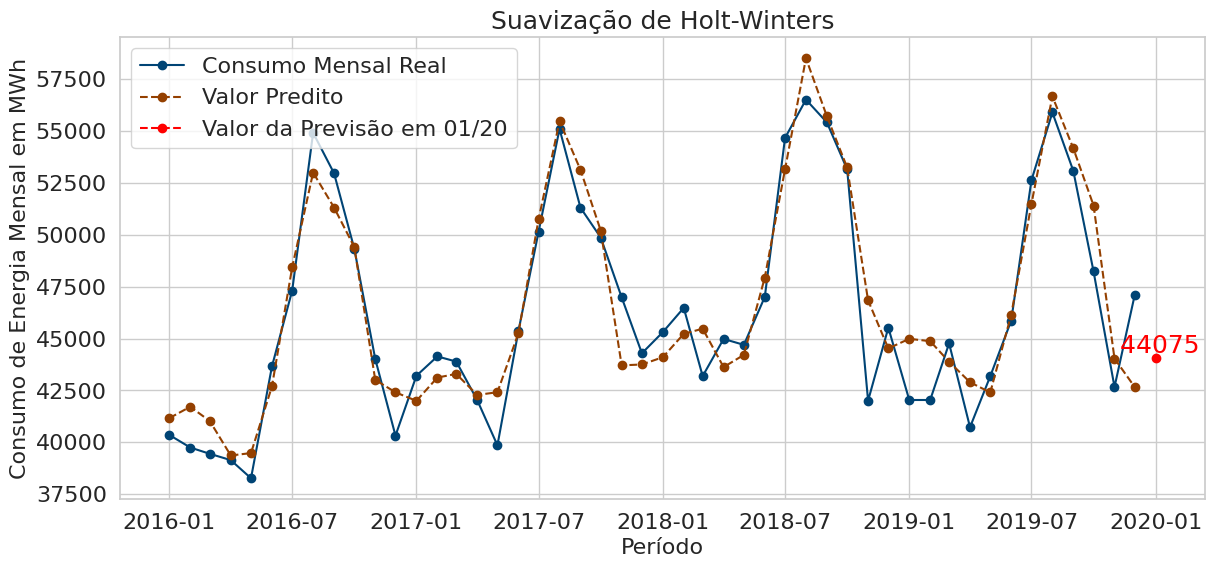

<ipython-input-52-002642eb3efe>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(forecast_df['previsao'].index, forecast_df['previsao'][0], linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
<ipython-input-52-002642eb3efe>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {int(forecast_df['previsao'][0])}", (forecast_df['previsao'].index, forecast_df['previsao'][0]), color="red", fontsize=16, ha='center', va='bottom')


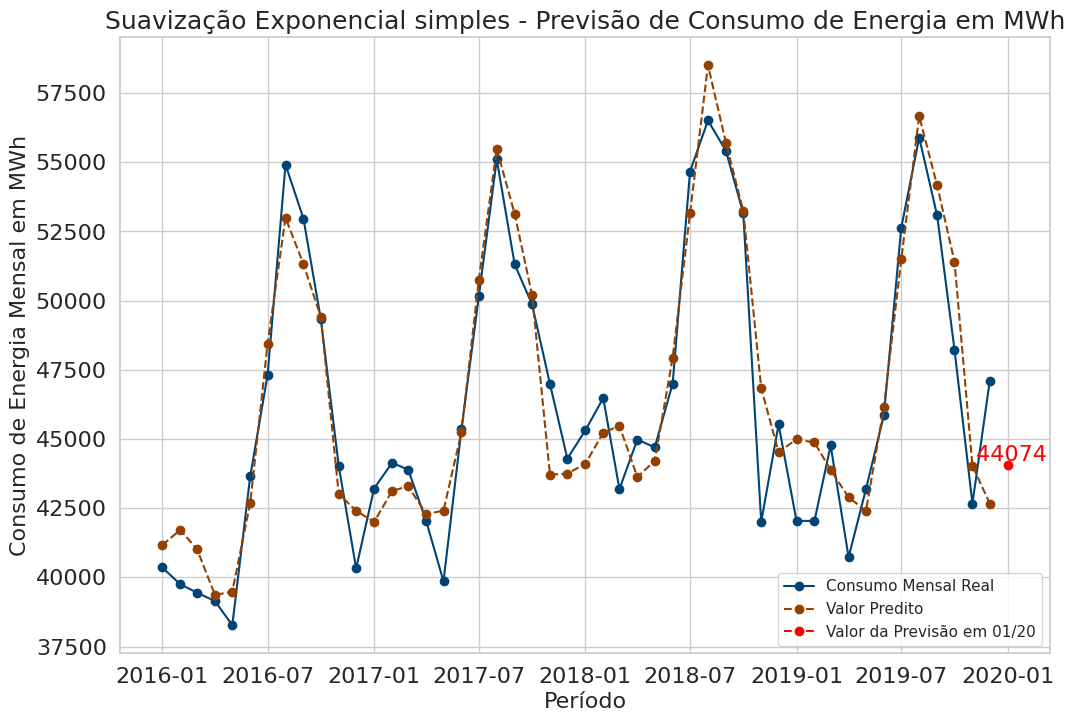

In [ ]:
new_york_data_10007_holt_simples = new_york_data_10007.copy()

model_HW = sm.tsa.ExponentialSmoothing(
    new_york_data_10007_holt_simples.value,
    seasonal_periods=12,
    trend="add",
    seasonal='add',
    initialization_method='estimated',
).fit()

# Criar um DataFrame com índice de datas para as previsões
forecast_index = pd.date_range(start=new_york_data_10007_holt_simples.index[-1] + pd.DateOffset(days=30), periods=1, freq='MS')

forecast_df = pd.DataFrame(index=forecast_index)
forecast_df
# # Gerar as previsões usando o modelo
forecast_values = model_HW.forecast(1)

# # Adicionar as previsões ao DataFrame de previsões
forecast_df['previsao'] = forecast_values.values

print(forecast_df)



# PT Plotar os dados originais e as previsões
plt.figure(figsize=(14, 6))
plt.plot(new_york_data_10007_holt_simples.value, marker='o', color=corTreinoReal, label='Consumo Mensal Real')
plt.plot(model_HW.fittedvalues, linestyle="--", marker='o', color=corTestReal, label='Valor Predito')
plt.plot(forecast_df['previsao'], linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.title('Suavização de Holt-Winters', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.annotate(f" {round(forecast_df['previsao'][0])}", (forecast_df.index[0], forecast_df['previsao'][0]), color="red", fontsize=18, ha='center', va='bottom')
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_holt_simples.index, new_york_data_10007_holt_simples.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(model_HW.fittedvalues, color=corTestReal, marker='o', linestyle="--",  label='Valor Predito')
plt.plot(forecast_df['previsao'].index, forecast_df['previsao'][0], linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(forecast_df['previsao'][0])}", (forecast_df['previsao'].index, forecast_df['previsao'][0]), color="red", fontsize=16, ha='center', va='bottom')
plt.title('Suavização Exponencial simples - Previsão de Consumo de Energia em MWh', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [ ]:
new_york_data_10007_holt_simples['value']

index_date
2016-01-01    40357.629
2016-02-01    39751.415
2016-03-01    39448.308
2016-04-01    39145.201
2016-05-01    38270.944
2016-06-01    43654.887
2016-07-01    47313.937
2016-08-01    54913.170
2016-09-01    52963.894
2016-10-01    49329.281
2016-11-01    44020.369
2016-12-01    40322.978
2017-01-01    43209.059
2017-02-01    44140.033
2017-03-01    43892.456
2017-04-01    42041.252
2017-05-01    39857.077
2017-06-01    45348.011
2017-07-01    50154.264
2017-08-01    55100.364
2017-09-01    51305.953
2017-10-01    49867.167
2017-11-01    46987.548
2017-12-01    44291.112
2018-01-01    45310.480
2018-02-01    46479.651
2018-03-01    43191.423
2018-04-01    44982.398
2018-05-01    44697.719
2018-06-01    47005.075
2018-07-01    54665.052
2018-08-01    56511.136
2018-09-01    55413.649
2018-10-01    53153.243
2018-11-01    42003.814
2018-12-01    45526.390
2019-01-01    42041.048
2019-02-01    42041.048
2019-03-01    44769.144
2019-04-01    40728.874
2019-05-01    43188.449
2019-06-01    45864.743
2019-07-01    52630.556
2019-08-01    55893.302
2019-09-01    53078.396
2019-10-01    48231.725
2019-11-01    42667.199
2019-12-01    47105.769
Freq: MS, Name: value, dtype: float64

In [ ]:
model_HW.fittedvalues

index_date
2016-01-01    41166.455271
2016-02-01    41715.731792
2016-03-01    41024.507958
2016-04-01    39367.559327
2016-05-01    39483.219681
2016-06-01    42692.400238
2016-07-01    48436.252628
2016-08-01    52996.287041
2016-09-01    51313.715545
2016-10-01    49409.081696
2016-11-01    43010.236982
2016-12-01    42410.923285
2017-01-01    41999.767057
2017-02-01    43121.481885
2017-03-01    43297.038517
2017-04-01    42285.438949
2017-05-01    42414.694289
2017-06-01    45249.371811
2017-07-01    50752.124713
2017-08-01    55474.101975
2017-09-01    53130.149392
2017-10-01    50204.043261
2017-11-01    43708.710720
2017-12-01    43752.087038
2018-01-01    44101.901179
2018-02-01    45227.836212
2018-03-01    45476.230276
2018-04-01    43625.275914
2018-05-01    44213.916408
2018-06-01    47939.823401
2018-07-01    53154.799510
2018-08-01    58505.040944
2018-09-01    55707.023008
2018-10-01    53242.636533
2018-11-01    46841.185125
2018-12-01    44525.423915
2019-01-01    44988.274895
2019-02-01    44874.975573
2019-03-01    43881.375420
2019-04-01    42896.029117
2019-05-01    42402.620641
2019-06-01    46149.521207
2019-07-01    51489.626043
2019-08-01    56668.950417
2019-09-01    54164.261651
2019-10-01    51409.868653
2019-11-01    44039.858508
2019-12-01    42662.197433
Freq: MS, dtype: float64

## Metrica

In [ ]:
mse = mean_squared_error(new_york_data_10007_holt_simples['value'], model_HW.fittedvalues)
rmse = np.sqrt(mse)
r2 = r2_score(new_york_data_10007_holt_simples['value'], model_HW.fittedvalues)

print(f'Erro Quadrado Médio (MSE) da Suavização de Holt-Winters: {mse}')
print(f'Raiz do Erro Quadrado Médio (RMSE) da Suavização de Holt-Winters: {rmse}')
print(f'Coeficiente de Determinação (R-squared) da Suavização de Holt-Winters: {r2}')

Erro Quadrado Médio (MSE) da Suavização de Holt-Winters: 3054045.749623122
Raiz do Erro Quadrado Médio (RMSE) da Suavização de Holt-Winters: 1747.582830547131
Coeficiente de Determinação (R-squared) da Suavização de Holt-Winters: 0.8824080467722162


# ARIMA MODEL

## Dividir os Dados em Treinamento (70%) e Teste (30%)

In [ ]:
new_york_data_10007_arima = new_york_data_10007.copy()

# Dividir os dados em treinamento e teste
train_size = int(len(new_york_data_10007_arima) * 0.7)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10007_arima) - train_size)

new_york_data_10007_arima['date'] = pd.to_datetime(new_york_data_10007_arima['datetime'])
new_york_data_10007_arima.set_index('date', inplace=True)
new_york_data_10007_arima = new_york_data_10007_arima.asfreq('MS')
new_york_data_10007_arima

new_york_data_10007_arima_train = new_york_data_10007_arima[:train_size]
new_york_data_10007_arima_test = new_york_data_10007_arima[train_size:]
new_york_data_10007_arima_train.head()

quantidade de treino: 33
quantidade de teste: 15


year   data_class data_field_display_name         data_field  \
date                                                                       
2016-01-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-02-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-03-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-04-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-05-01  2016  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  ...  \
date                                                                    ...   
2016-01-01  New York      1     10007      NY       3  zipcode_monthly  ...   
2016-02-01  New York      2     10007      NY       3  zipcode_monthly  ...   
2016-03-01  New York      3     10007      NY       3  zipcode_monthly  ...   
2016-04-01  New York      4     10007      NY       3  zipcode_monthly  ...   
2016-05-01  New York      5     10007      NY       3  zipcode_monthly  ...   

                value  number_of_accounts  \
date                                        
2016-01-01  40357.629                3974   
2016-02-01  39751.415                3598   
2016-03-01  39448.308                3598   
2016-04-01  39145.201                3974   
2016-05-01  38270.944                3974   

                                            Georeference  \
date                                                       
2016-01-01  POINT (-74.00801499999994 40.71343000000007)   
2016-02-01  POINT (-74.00801499999994 40.71343000000007)   
2016-03-01  POINT (-74.00801499999994 40.71343000000007)   
2016-04-01  POINT (-74.00801499999994 40.71343000000007)   
2016-05-01  POINT (-74.00801499999994 40.71343000000007)   

           NYS Municipal Boundaries  New York Zip Codes  Counties   datetime  \
date                                                                           
2016-01-01                      749               723.0    2095.0 2016-01-01   
2016-02-01                      749               723.0    2095.0 2016-02-01   
2016-03-01                      749               723.0    2095.0 2016-03-01   
2016-04-01                      749               723.0    2095.0 2016-04-01   
2016-05-01                      749               723.0    2095.0 2016-05-01   

            latitude  longitude  diff_value  
date                                         
2016-01-01  40.71343 -74.008015    -606.214  
2016-02-01  40.71343 -74.008015    -606.214  
2016-03-01  40.71343 -74.008015    -303.107  
2016-04-01  40.71343 -74.008015    -303.107  
2016-05-01  40.71343 -74.008015    -874.257  

[5 rows x 21 columns]

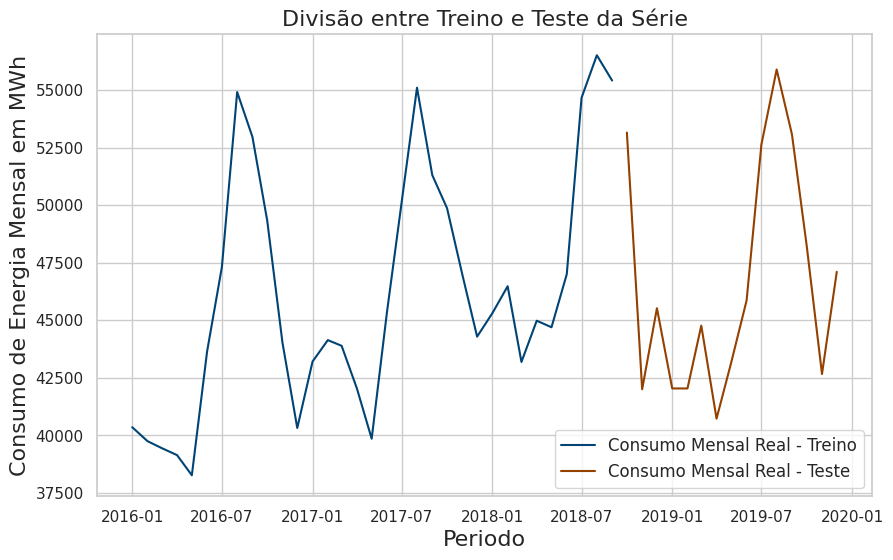

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(new_york_data_10007_arima_train.index, new_york_data_10007_arima_train['value'], color=corTreinoReal, label='Consumo Mensal Real - Treino')
plt.plot(new_york_data_10007_arima_test.index, new_york_data_10007_arima_test['value'], color=corTestReal, label='Consumo Mensal Real - Teste')
plt.legend(fontsize=12)
plt.title('Divisão entre Treino e Teste da Série', fontsize=16)
plt.xlabel('Periodo', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.show()

## Grid Search com AIC

In [ ]:
import itertools
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np

# Supressão de avisos
warnings.filterwarnings("ignore")

p_values = [1, 2, 3, 4, 6, 9, 12]
d_values = range(0, 3)
q_values = [1, 2, 3, 4, 6, 9, 12]

# Armazenando os resultados
results = []
best_rmse = float('inf')  # Inicializa com um valor alto
best_order = None

# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                print("Grid Search, Order: ", p, d, q)

                # Ajustando o modelo ARIMA com os dados de treino
                model = sm.tsa.ARIMA(new_york_data_10007_arima_train.value, order=(p, d, q))
                model_fit = model.fit()

                # Previsão para o conjunto de teste
                forecast = model_fit.forecast(steps=len(new_york_data_10007_arima_test.value))

                # Calculando o RMSE no conjunto de teste
                rmse = np.sqrt(mean_squared_error(new_york_data_10007_arima_test.value, forecast))

                # Armazenando os resultados
                results.append((p, d, q, rmse))

                # Verificando se o RMSE é o melhor até agora
                if rmse < best_rmse:
                    print("Melhor RMSE:", rmse, "Order:", p, d, q)
                    best_rmse = rmse
                    best_order = (p, d, q)

            except Exception as e:
                # Se houver erro ao ajustar o modelo, exiba a combinação problemática
                print(f"Erro ao ajustar o modelo ARIMA({p}, {d}, {q}): {e}")
                continue

# Exibindo os melhores parâmetros
print("Melhores parâmetros (p, d, q):", best_order)
print("Menor RMSE:", best_rmse)

# Convertendo os resultados para um DataFrame para visualização
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'RMSE'])
print(results_df.sort_values('RMSE'))

Grid Search, Order:  1 0 1
Melhor RMSE: 5273.908493422336 Order: 1 0 1
Grid Search, Order:  1 0 2
Melhor RMSE: 4701.409198062078 Order: 1 0 2
Grid Search, Order:  1 0 3
Melhor RMSE: 4633.227870981033 Order: 1 0 3
Grid Search, Order:  1 0 4
Melhor RMSE: 4531.112636285594 Order: 1 0 4
Grid Search, Order:  1 0 6
Melhor RMSE: 4224.79383469867 Order: 1 0 6
Grid Search, Order:  1 0 9
Melhor RMSE: 4219.116500813957 Order: 1 0 9
Grid Search, Order:  1 0 12
Grid Search, Order:  1 1 1
Grid Search, Order:  1 1 2
Grid Search, Order:  1 1 3
Grid Search, Order:  1 1 4
Grid Search, Order:  1 1 6
Grid Search, Order:  1 1 9
Grid Search, Order:  1 1 12
Grid Search, Order:  1 2 1
Grid Search, Order:  1 2 2
Grid Search, Order:  1 2 3
Grid Search, Order:  1 2 4
Grid Search, Order:  1 2 6
Grid Search, Order:  1 2 9
Grid Search, Order:  1 2 12
Grid Search, Order:  2 0 1
Melhor RMSE: 3854.6266524862335 Order: 2 0 1
Grid Search, Order:  2 0 2
Grid Search, Order:  2 0 3
Grid Search, Order:  2 0 4
Grid Search, O

In [ ]:
# Melhor ordem ARIMA: (12, 2, 2)
# aic:  599.4288546060866

# 3, 2, 4
# 591.6812401119431

# 12, 2, 4
# 601.1161239583635

# Grid Search, Order:  6 0 2
# Melhor RMSE: 2024.4140228644717 Order: 6 0 2

## Usando a melhor order do grid search

In [ ]:
# Ajustar o modelo com dados de treino
model_arima_aic = sm.tsa.arima.ARIMA(new_york_data_10007_arima_train.value, order=(6, 0, 2))
model_arima_aic_fit = model_arima_aic.fit()

predictions_arima_aic = model_arima_aic_fit.predict()

# Fazer previsões para o conjunto de teste
forecast_arima_aic = model_arima_aic_fit.forecast(steps=len(new_york_data_10007_arima_test)+1)
last_forecast_arima_aic = forecast_arima_aic.iloc[-1]
forecast_arima_aic = forecast_arima_aic.iloc[:-1]
print("previsão do 01/2020", last_forecast_arima_aic)
forecast_arima_aic

previsão do 01/2020 44645.86115418315


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2018-10-01    49763.635657
2018-11-01    44554.386317
2018-12-01    42315.457445
2019-01-01    42297.374282
2019-02-01    42481.764767
2019-03-01    41340.318840
2019-04-01    40223.662921
2019-05-01    41594.926816
2019-06-01    46181.464001
2019-07-01    51711.770299
2019-08-01    54581.784954
2019-09-01    53080.345595
2019-10-01    48848.113187
2019-11-01    45225.005937
2019-12-01    44144.242597
Freq: MS, Name: predicted_mean, dtype: float64

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   33
Model:                 ARIMA(6, 0, 2)   Log Likelihood                -300.914
Date:                Sun, 06 Oct 2024   AIC                            621.828
Time:                        17:55:03   BIC                            636.794
Sample:                    01-01-2016   HQIC                           626.864
                         - 09-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.618e+04    938.865     49.187      0.000    4.43e+04     4.8e+04
ar.L1          1.7495      0.382      4.581      0.000       1.001       2.498
ar.L2         -1.4535      0.738     -1.968      0.0

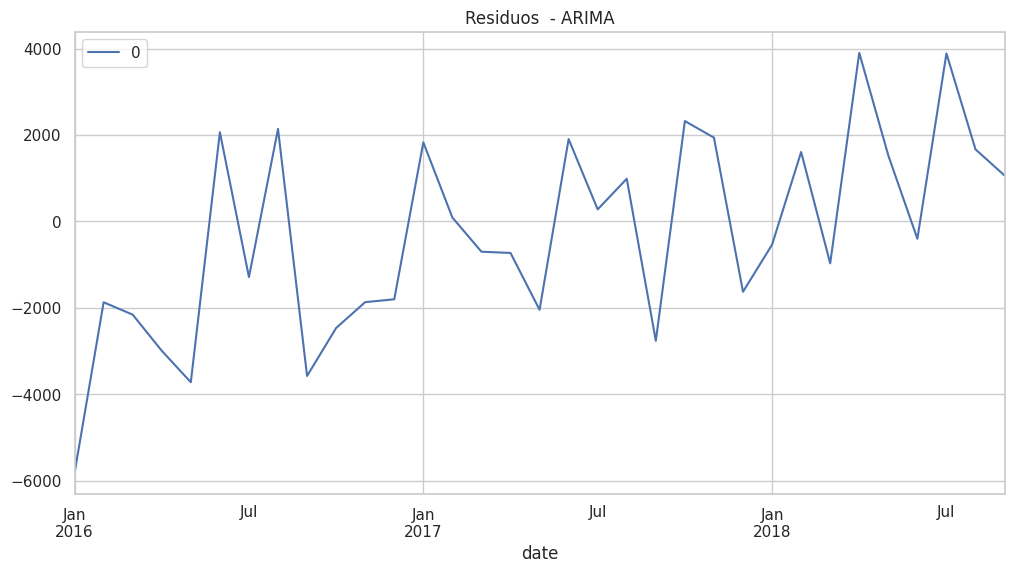

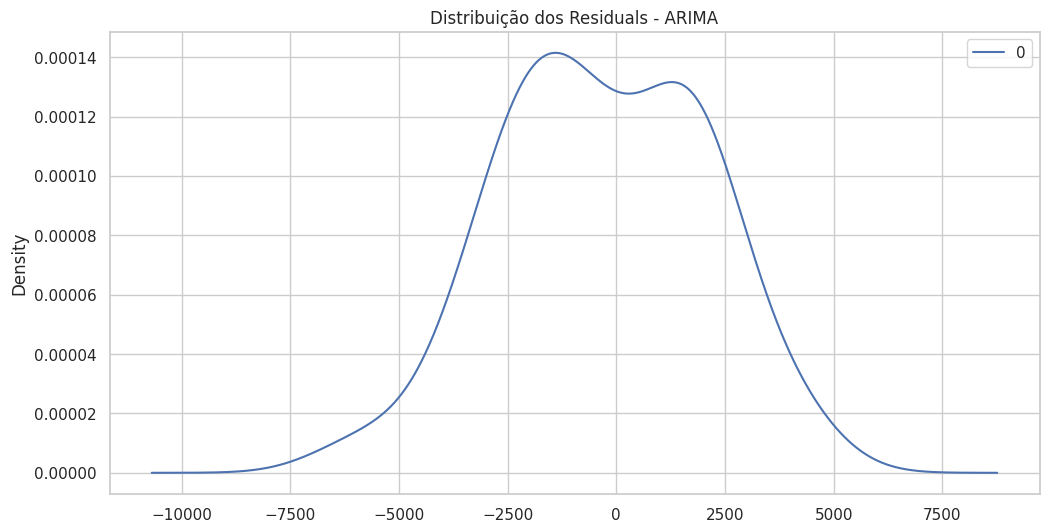

                 0
count    33.000000
mean   -308.704392
std    2312.828069
min   -5822.459600
25%   -1873.538796
50%    -539.953145
75%    1666.655231
max    3901.118333


In [ ]:
# summary of fit model
print(model_arima_aic_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_arima_aic_fit.resid)
residuals.plot(figsize=(12, 6),title='Residuos  - ARIMA')
plt.show()
# density plot of residuals
residuals.plot(kind='kde',figsize=(12, 6), title = 'Distribuição dos Residuals - ARIMA')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
new_york_data_10007_arima_train.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [ ]:
new_york_data_10007_arima_test.index

DatetimeIndex(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

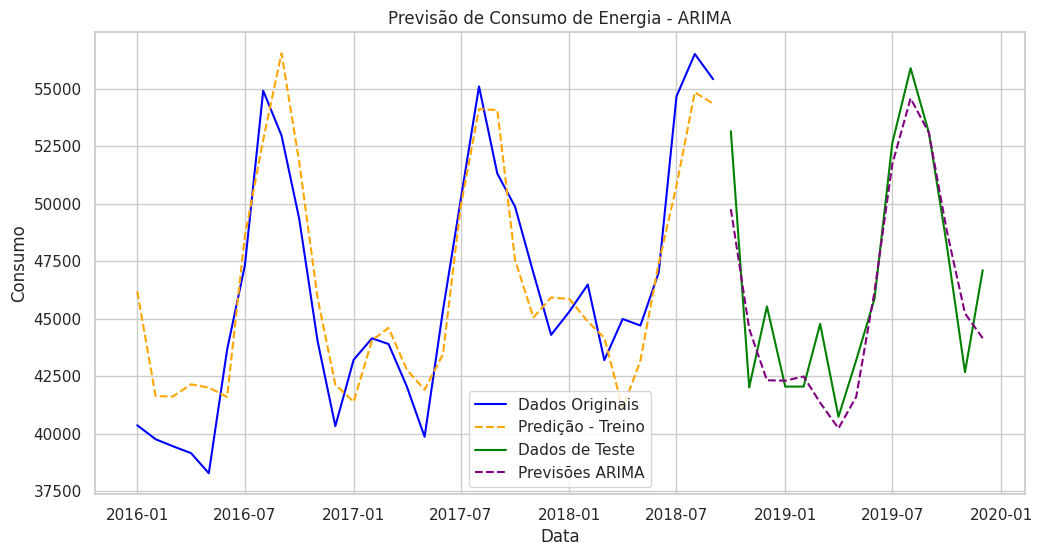

In [ ]:
# Armazene o último valor conhecido da série original
# avg = new_york_data_10007_arima_train.value.mean()
# print(avg)

predictions_train_df = pd.DataFrame(predictions_arima_aic.values, columns=['predict'])

# predictions_train_df['predict'] = predictions_train_df['predict'].cumsum() + avg

# Crie um DataFrame para armazenar as previsões
forecast_df = pd.DataFrame(forecast_arima_aic.values, columns=['Forecast'])

# Reverter a diferenciação adicionando o último valor conhecido
# forecast_df['Forecast'] = forecast_df['Forecast'].cumsum() + avg

# Adicione um índice de tempo para as previsões
forecast_df.index = pd.date_range(start=new_york_data_10007_arima_train.index[-1] + pd.DateOffset(months=1),
                                   periods=len(forecast_df), freq='MS')

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(new_york_data_10007_arima_train.index, new_york_data_10007_arima_train.value, label='Dados Originais', color='blue')
plt.plot(new_york_data_10007_arima_train.index, predictions_train_df.values, color="orange", linestyle="--",  label='Predição - Treino')
plt.plot(new_york_data_10007_arima_test.index, new_york_data_10007_arima_test.value, label='Dados de Teste', color='green')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Previsões ARIMA', color='purple', linestyle='--')
plt.title('Previsão de Consumo de Energia - ARIMA')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()
plt.show()

## Grafico

In [ ]:
new_york_data_10007_arima.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [ ]:
forecast_arima_aic

2018-10-01    49763.635657
2018-11-01    44554.386317
2018-12-01    42315.457445
2019-01-01    42297.374282
2019-02-01    42481.764767
2019-03-01    41340.318840
2019-04-01    40223.662921
2019-05-01    41594.926816
2019-06-01    46181.464001
2019-07-01    51711.770299
2019-08-01    54581.784954
2019-09-01    53080.345595
2019-10-01    48848.113187
2019-11-01    45225.005937
2019-12-01    44144.242597
Freq: MS, Name: predicted_mean, dtype: float64

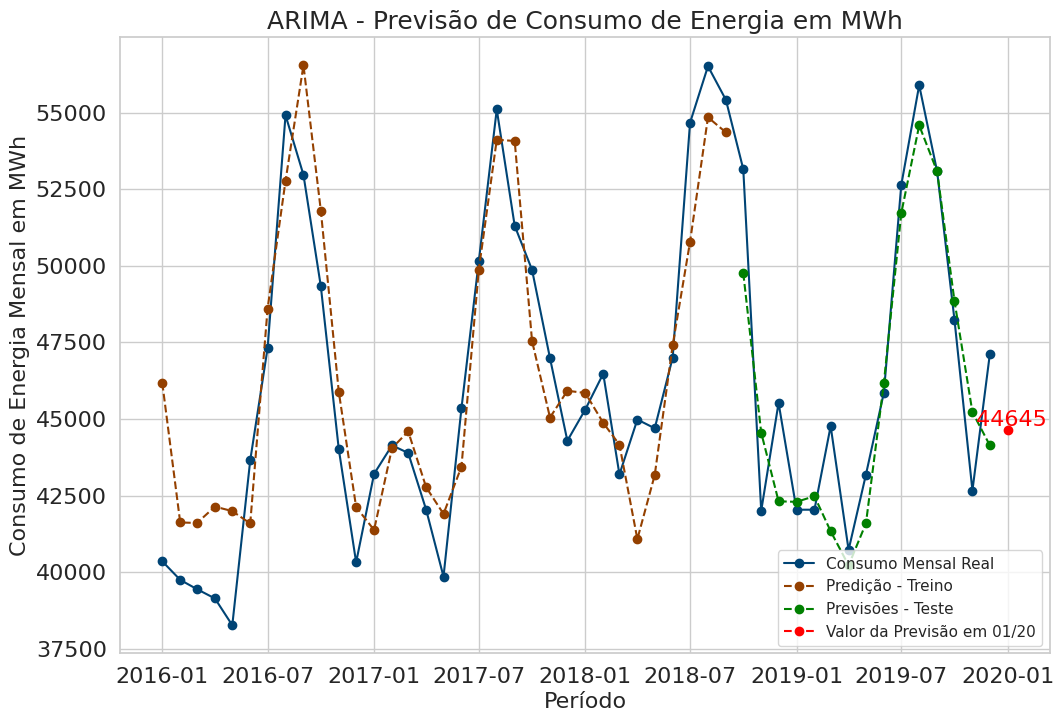

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_arima.index, new_york_data_10007_arima.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_arima_train.index, predictions_train_df.values, color=corTestReal, marker='o', linestyle="--",  label='Predição - Treino')
plt.plot(forecast_arima_aic.index, forecast_arima_aic.values, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(pd.to_datetime('2020-01-01'), last_forecast_arima_aic, linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(last_forecast_arima_aic)}", (pd.to_datetime('2020-01-01'), last_forecast_arima_aic), color="red", fontsize=16, ha='center', va='bottom')
plt.title('ARIMA - Previsão de Consumo de Energia em MWh', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Metrica de Qualidade

In [ ]:
# 1. Calcular MSE, RMSE e R² para o conjunto de teste
aic_arima = model_arima_aic_fit.aic
mse = mean_squared_error(new_york_data_10007_arima_test.value, forecast_df['Forecast'])
rmse = np.sqrt(mse)
r2 = r2_score(new_york_data_10007_arima_test.value, forecast_df['Forecast'])

# Exibir as métricas
print(f"AIC: {aic_arima}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
# MSE: 4098252.1359703136
# RMSE: 2024.4140228644717
# R²: 0.8191307250096755

# com
# MSE: 11533193.03935336
# RMSE: 3396.0555118185803
# R²: 0.49100245808633924

AIC: 621.8284350329137
MSE: 4098252.1359703136
RMSE: 2024.4140228644717
R²: 0.8191307250096755


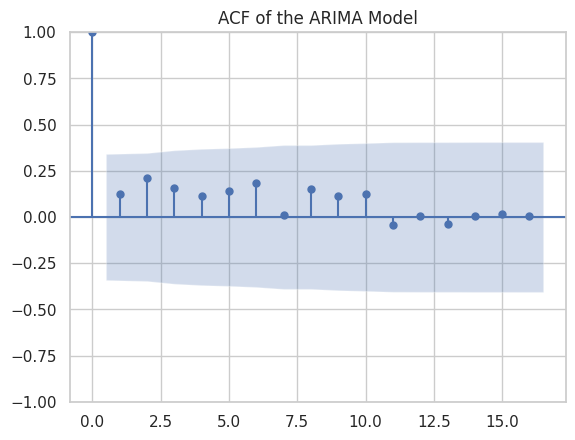

In [ ]:
plot_acf(model_arima_aic_fit.resid)
plt.title("ACF of the ARIMA Model")
plt.show()

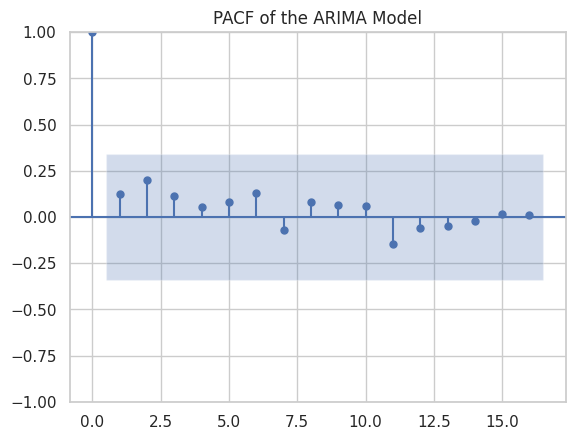

In [ ]:
plot_pacf(model_arima_aic_fit.resid)
plt.title("PACF of the ARIMA Model")
plt.show()

# SARIMA Model

## Dividir os dados em treinamento e teste

In [ ]:
new_york_data_10007_sarima = new_york_data_10007.copy()

# Dividir os dados em treinamento e teste
train_size = int(len(new_york_data_10007_sarima) * 0.7)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10007_sarima) - train_size)

new_york_data_10007_sarima['datetime'] = pd.to_datetime(new_york_data_10007_sarima['datetime'])
new_york_data_10007_sarima.set_index('datetime', inplace=True)
new_york_data_10007_sarima = new_york_data_10007_sarima.asfreq('MS')
new_york_data_10007_sarima

new_york_data_10007_sarima_train = new_york_data_10007_sarima[:train_size]
new_york_data_10007_sarima_test = new_york_data_10007_sarima[train_size:]
new_york_data_10007_sarima_test.head()

quantidade de treino: 33
quantidade de teste: 15


year   data_class data_field_display_name         data_field  \
datetime                                                                   
2018-10-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-11-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-12-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2019-01-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-02-01  2019  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
datetime                                                                 
2018-10-01  New York     10     10007      NY       3  zipcode_monthly   
2018-11-01  New York     11     10007      NY       3  zipcode_monthly   
2018-12-01  New York     12     10007      NY       3  zipcode_monthly   
2019-01-01  New York      1     10007      NY       3  zipcode_monthly   
2019-02-01  New York      2     10007      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
datetime                                                         
2018-10-01  Consolidated Edison  53153.243                3970   
2018-11-01  Consolidated Edison  42003.814                3970   
2018-12-01  Consolidated Edison  45526.390                3976   
2019-01-01  Consolidated Edison  42041.048                4006   
2019-02-01  Consolidated Edison  42041.048                4006   

                                            Georeference  \
datetime                                                   
2018-10-01  POINT (-74.00801499999994 40.71343000000007)   
2018-11-01  POINT (-74.00801499999994 40.71343000000007)   
2018-12-01  POINT (-74.00801499999994 40.71343000000007)   
2019-01-01  POINT (-74.00801499999994 40.71343000000007)   
2019-02-01  POINT (-74.00801499999994 40.71343000000007)   

            NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
datetime                                                                       
2018-10-01                       749               723.0    2095.0  40.71343   
2018-11-01                       749               723.0    2095.0  40.71343   
2018-12-01                       749               723.0    2095.0  40.71343   
2019-01-01                       749               723.0    2095.0  40.71343   
2019-02-01                       749               723.0    2095.0  40.71343   

            longitude  diff_value  
datetime                           
2018-10-01 -74.008015   -2260.406  
2018-11-01 -74.008015  -11149.429  
2018-12-01 -74.008015    3522.576  
2019-01-01 -74.008015   -3485.342  
2019-02-01 -74.008015       0.000

## Grid Search com AIC

In [ ]:
%%time
import itertools
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np

# Supressão de avisos
warnings.filterwarnings("ignore")

p_values = [1, 2, 3, 4, 6, 9, 12]
d_values = range(0, 3)
q_values = [1, 2, 3, 4, 6, 9, 12]

P_values = [1, 2, 3, 4, 6, 9, 12]
D_values = range(0, 3)
Q_values = [1, 2, 3, 4, 6, 9, 12]

s = 12

# Armazenando os resultados
results = []
best_rmse = float('inf')
best_order = None

# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        order = (p, d, q, P, D, Q, s)
                        try:
                            print("Grid Search Sarima, Order: (", p, d, q, ")", "seasonal_order=(", P, D, Q, s, ")")

                            # Ajustando o modelo SARIMA
                            model = sm.tsa.SARIMAX(new_york_data_10007_sarima_train.value, order=(p, d, q), seasonal_order=(P, D, Q, s))
                            model_fit = model.fit()

                            # Prevendo para o conjunto de teste
                            predictions = model_fit.forecast(steps=len(new_york_data_10007_sarima_test.value))

                            # Calculando o RMSE
                            rmse = np.sqrt(mean_squared_error(new_york_data_10007_sarima_test.value, predictions))

                            # Armazenando os resultados
                            results.append((p, d, q, P, D, Q, s, rmse))

                            # Verificando se o RMSE é o melhor até agora
                            if rmse < best_rmse:
                                print("best_rmse", rmse, "Order:", p, d, q, P, D, Q, s)
                                best_rmse = rmse
                                best_order = (p, d, q, P, D, Q, s)

                        except Exception as e:
                            # Se houver erro ao ajustar o modelo, exiba a combinação problemática
                            print(f"Erro ao ajustar o modelo SARIMA({p}, {d}, {q}, {P}, {D}, {Q}, {s}): {e}")
                            continue

# Exibindo os melhores parâmetros
print("Melhores parâmetros (p, d, q, P, D, Q, s):", best_order)
print("Menor RMSE:", best_rmse)

# Convertendo os resultados para um DataFrame para visualização
sarima_results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'P', 'D', 'Q', 's', 'RMSE'])
print(sarima_results_df.sort_values('RMSE'))

Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 0 2 12 )
best_rmse 4962.1128218387785 Order: 2 0 2 2 0 2 12
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 0 3 12 )
best_rmse 4780.671250533344 Order: 2 0 2 2 0 3 12
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 0 4 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 1 2 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 1 3 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 1 4 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 3 0 2 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 3 0 3 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 3 0 4 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 3 1 2 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 3 1 3 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 3 1 4 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 4 0 2 12 )
Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 

In [ ]:
%%time
import itertools
import warnings
from sklearn.metrics import mean_squared_error
import numpy as np

# Supressão de avisos
warnings.filterwarnings("ignore")

p_values = [6, 12]
d_values = [0, 1]
q_values = [6, 12]

P_values = [6, 12]
D_values = [0, 1]
Q_values = [6, 12]

s = 12

# Armazenando os resultados
results = []
best_rmse = float('inf')
best_order = None

# Grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        order = (p, d, q, P, D, Q, s)
                        try:
                            print("Grid Search Sarima, Order: (", p, d, q, ")", "seasonal_order=(", P, D, Q, s, ")")

                            # Ajustando o modelo SARIMA
                            model = sm.tsa.SARIMAX(new_york_data_10007_sarima_train.value, order=(p, d, q), seasonal_order=(P, D, Q, s))
                            model_fit = model.fit()

                            # Prevendo para o conjunto de teste
                            predictions = model_fit.forecast(steps=len(new_york_data_10007_sarima_test.value))

                            # Calculando o RMSE
                            rmse = np.sqrt(mean_squared_error(new_york_data_10007_sarima_test.value, predictions))

                            # Armazenando os resultados
                            results.append((p, d, q, P, D, Q, s, rmse))

                            # Verificando se o RMSE é o melhor até agora
                            if rmse < best_rmse:
                                print("best_rmse", rmse, "Order:", p, d, q, P, D, Q, s)
                                best_rmse = rmse
                                best_order = (p, d, q, P, D, Q, s)

                        except Exception as e:
                            # Se houver erro ao ajustar o modelo, exiba a combinação problemática
                            print(f"Erro ao ajustar o modelo SARIMA({p}, {d}, {q}, {P}, {D}, {Q}, {s}): {e}")
                            continue

# Exibindo os melhores parâmetros
print("Melhores parâmetros (p, d, q, P, D, Q, s):", best_order)
print("Menor RMSE:", best_rmse)

# Convertendo os resultados para um DataFrame para visualização
sarima_results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'P', 'D', 'Q', 's', 'RMSE'])
print(sarima_results_df.sort_values('RMSE'))

Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 6 0 6 12 )
best_rmse 4390.953931235555 Order: 6 0 6 6 0 6 12
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 6 0 12 12 )
best_rmse 4347.38457282162 Order: 6 0 6 6 0 12 12
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 6 1 6 12 )
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 6 1 12 12 )
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 12 0 6 12 )
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 12 0 12 12 )
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 12 1 6 12 )
Grid Search Sarima, Order: ( 6 0 6 ) seasonal_order=( 12 1 12 12 )
Grid Search Sarima, Order: ( 6 0 12 ) seasonal_order=( 6 0 6 12 )
Erro ao ajustar o modelo SARIMA(6, 0, 12, 6, 0, 6, 12): Invalid model: moving average lag(s) {12} are in both the seasonal and non-seasonal moving average components.
Grid Search Sarima, Order: ( 6 0 12 ) seasonal_order=( 6 0 12 12 )
Erro ao ajustar o modelo SARIMA(6, 0, 12, 6, 0, 12, 12): Invalid model: 

KeyboardInterrupt: 

In [ ]:
# Grid Search Sarima, Order: ( 1 0 1 ) seasonal_order=( 1 2 1 12 )
# best_aic 174.8066461167765 Order: 1 0 1
# Grid Search Sarima, Order: ( 2 0 2 ) seasonal_order=( 2 1 2 12 )
# best_aic 386.29356995833786 Order: 2 0 2 2 1 2 12
# Grid Search Sarima, Order: ( 2 1 2 ) seasonal_order=( 2 1 2 12 )
# best_aic 372.4452013162699 Order: 2 1 2 2 1 2 12
# Grid Search Sarima, Order: ( 2 1 3 ) seasonal_order=( 2 1 2 12 )
# best_aic 372.15309210250916 Order: 2 1 3 2 1 2 12
# Melhores parâmetros (p, d, q, P, D, Q, s): (2, 1, 3)
# Menor AIC: 372.15309210250916
# Grid Search Sarima, Order: ( 2 0 3 ) seasonal_order=( 2 1 2 12 )
# best_rmse 3644.0325703724775 Order: 2 0 3 2 1 2 12
# Melhores parâmetros (p, d, q, P, D, Q, s): (4, 0, 4, 2, 1, 3, 12)
# Menor RMSE: 2654.016306153639

## Usando a melhor order do grid search

In [ ]:
# Grid Search Sarima, Order: ( 2 1 3 ) seasonal_order=( 2 1 2 12 )
# best_aic 372.15309210250916 Order: 2 1 3 2 1 2 12
# (4, 0, 4, 2, 1, 3, 12)

# Ajustar o modelo com dados de treino
model_sarima_aic = sm.tsa.SARIMAX(new_york_data_10007_sarima_train.value, order=(4, 0, 4), seasonal_order=(2, 1, 3, 12))
model_sarima_aic_fit = model_sarima_aic.fit()

predictions_sarima_aic = model_sarima_aic_fit.predict()

# Fazer previsões para o conjunto de teste
forecast_sarima_aic = model_sarima_aic_fit.forecast(steps=len(new_york_data_10007_sarima_test)+1)
last_forecast_sarima_aic = forecast_sarima_aic.iloc[-1]
forecast_sarima_aic = forecast_sarima_aic.iloc[:-1]
print("previsão do 01/2020", last_forecast_sarima_aic)
forecast_sarima_aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


previsão do 01/2020 44371.70062368157


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2018-10-01    52835.241141
2018-11-01    48477.238224
2018-12-01    46981.339851
2019-01-01    41848.676155
2019-02-01    44372.748381
2019-03-01    41304.820554
2019-04-01    42110.502697
2019-05-01    41988.691065
2019-06-01    44167.634324
2019-07-01    51956.546678
2019-08-01    53003.479428
2019-09-01    51334.699994
2019-10-01    49526.994074
2019-11-01    47472.576344
2019-12-01    46003.618697
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
predictions_sarima_aic

datetime
2016-01-01        0.000000
2016-02-01     -537.760421
2016-03-01      977.522344
2016-04-01      378.360878
2016-05-01      884.479297
2016-06-01     1893.721952
2016-07-01     1610.787825
2016-08-01     2428.574805
2016-09-01     2870.541198
2016-10-01     3147.642759
2016-11-01     3559.898374
2016-12-01     3912.206498
2017-01-01    43767.632840
2017-02-01    43896.180764
2017-03-01    42173.594281
2017-04-01    42548.546410
2017-05-01    41482.694053
2017-06-01    45373.257864
2017-07-01    49139.889059
2017-08-01    56428.372731
2017-09-01    53790.007546
2017-10-01    49514.361016
2017-11-01    44480.954946
2017-12-01    40498.811902
2018-01-01    46441.210539
2018-02-01    47110.033521
2018-03-01    46047.140164
2018-04-01    45309.175444
2018-05-01    42012.620723
2018-06-01    48364.393705
2018-07-01    53924.755477
2018-08-01    57288.072828
2018-09-01    55449.136533
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
predictions_sarima_aic.values[0] = predictions_sarima_aic.values[1]

In [ ]:
forecast_sarima_aic

2018-10-01    52835.241141
2018-11-01    48477.238224
2018-12-01    46981.339851
2019-01-01    41848.676155
2019-02-01    44372.748381
2019-03-01    41304.820554
2019-04-01    42110.502697
2019-05-01    41988.691065
2019-06-01    44167.634324
2019-07-01    51956.546678
2019-08-01    53003.479428
2019-09-01    51334.699994
2019-10-01    49526.994074
2019-11-01    47472.576344
2019-12-01    46003.618697
Freq: MS, Name: predicted_mean, dtype: float64

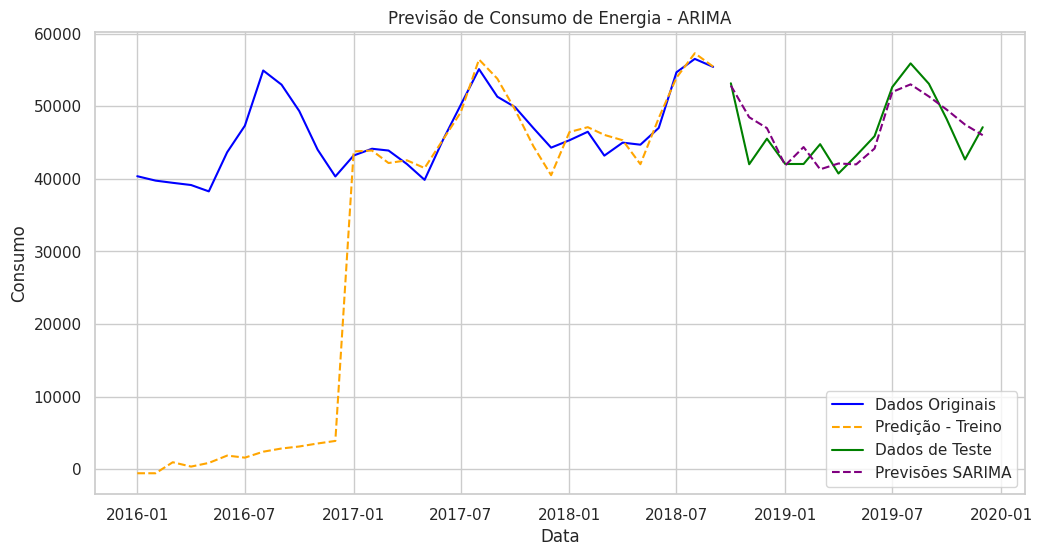

In [ ]:
# Visualização
plt.figure(figsize=(12, 6))
plt.plot(new_york_data_10007_sarima_train.index, new_york_data_10007_sarima_train.value, label='Dados Originais', color='blue')
plt.plot(predictions_sarima_aic.index, predictions_sarima_aic.values, color="orange", linestyle="--",  label='Predição - Treino')
plt.plot(new_york_data_10007_sarima_test.index, new_york_data_10007_sarima_test.value, label='Dados de Teste', color='green')
plt.plot(forecast_sarima_aic.index, forecast_sarima_aic, label='Previsões SARIMA', color='purple', linestyle='--')
plt.title('Previsão de Consumo de Energia - ARIMA')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()
plt.show()

## Grafico

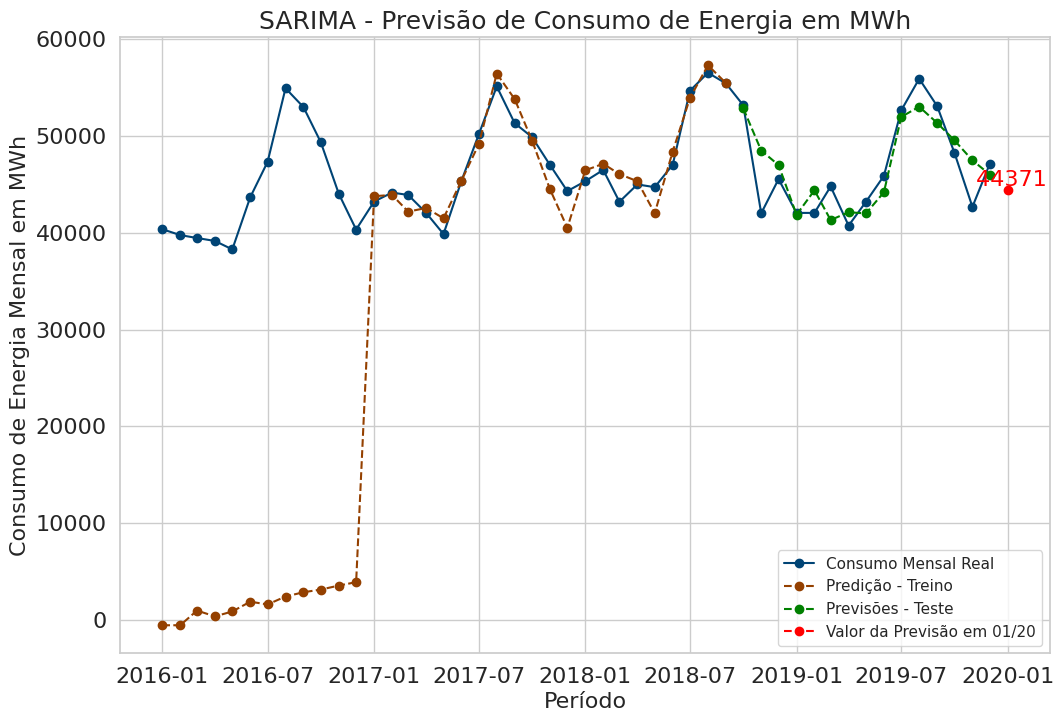

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_sarima.index, new_york_data_10007_sarima.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_sarima_train.index, predictions_sarima_aic.values, color=corTestReal, marker='o', linestyle="--",  label='Predição - Treino')
plt.plot(forecast_sarima_aic.index, forecast_sarima_aic.values, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(pd.to_datetime('2020-01-01'), last_forecast_sarima_aic, linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(last_forecast_sarima_aic)}", (pd.to_datetime('2020-01-01'), last_forecast_sarima_aic), color="red", fontsize=16, ha='center', va='bottom')
plt.title('SARIMA - Previsão de Consumo de Energia em MWh', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Metrica de Qualidade

In [ ]:
# 1. Calcular MSE, RMSE e R² para o conjunto de teste
aic_sarima = model_sarima_aic_fit.aic
mse = mean_squared_error(new_york_data_10007_sarima_test.value, forecast_sarima_aic.values)
rmse = np.sqrt(mse)
r2 = r2_score(new_york_data_10007_sarima_test.value, forecast_sarima_aic.values)


# Exibir as métricas
print(f"AIC: {aic_sarima}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
# AIC: 389.4005764047691
# MSE: 13278973.373935444
# RMSE: 3644.0325703724775
# R²: 0.4139554602608948
# AIC: 615.7784822028177
# MSE: 7043802.553329407
# RMSE: 2654.016306153639
# R²: 0.6891339481498131

AIC: 615.7784822028177
MSE: 7043802.553329407
RMSE: 2654.016306153639
rmse_12: 2943.0204824924735
R²: 0.6891339481498131


# SARIMAX MODEL

In [ ]:
new_york_data_10007_sarimax = new_york_data_10007.copy()

new_york_data_10007_sarimax['verao'] = np.where((new_york_data_10007_sarimax.month >= 1) & (new_york_data_10007_sarimax.month <= 3), 1, 0)
new_york_data_10007_sarimax['outono'] = np.where((new_york_data_10007_sarimax.month >= 4) & (new_york_data_10007_sarimax.month <= 6), 1, 0)
new_york_data_10007_sarimax['inverno'] = np.where((new_york_data_10007_sarimax.month >= 7) & (new_york_data_10007_sarimax.month <= 9), 1, 0)
new_york_data_10007_sarimax['primavera'] = np.where((new_york_data_10007_sarimax.month >= 10) & (new_york_data_10007_sarimax.month <= 12), 1, 0)
new_york_data_10007_sarimax.head()

year   data_class data_field_display_name         data_field  \
index_date                                                                 
2016-01-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-02-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-03-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-04-01  2016  electricity   Total Consumption (T)  3_nat_consumption   
2016-05-01  2016  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  ...  \
index_date                                                              ...   
2016-01-01  New York      1     10007      NY       3  zipcode_monthly  ...   
2016-02-01  New York      2     10007      NY       3  zipcode_monthly  ...   
2016-03-01  New York      3     10007      NY       3  zipcode_monthly  ...   
2016-04-01  New York      4     10007      NY       3  zipcode_monthly  ...   
2016-05-01  New York      5     10007      NY       3  zipcode_monthly  ...   

           New York Zip Codes  Counties   datetime  latitude  longitude  \
index_date                                                                
2016-01-01              723.0    2095.0 2016-01-01  40.71343 -74.008015   
2016-02-01              723.0    2095.0 2016-02-01  40.71343 -74.008015   
2016-03-01              723.0    2095.0 2016-03-01  40.71343 -74.008015   
2016-04-01              723.0    2095.0 2016-04-01  40.71343 -74.008015   
2016-05-01              723.0    2095.0 2016-05-01  40.71343 -74.008015   

            diff_value  verao outono  inverno  primavera  
index_date                                                
2016-01-01    -606.214      1      0        0          0  
2016-02-01    -606.214      1      0        0          0  
2016-03-01    -303.107      1      0        0          0  
2016-04-01    -303.107      0      1        0          0  
2016-05-01    -874.257      0      1        0          0  

[5 rows x 25 columns]

## dividir os dados em treinamento e teste

In [ ]:
# Dividir os dados em treinamento e teste
train_size = int(len(new_york_data_10007_sarimax) * 0.7)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10007_sarimax) - train_size)

new_york_data_10007_sarimax['datetime'] = pd.to_datetime(new_york_data_10007_sarimax['datetime'])
new_york_data_10007_sarimax.set_index('datetime', inplace=True)
new_york_data_10007_sarimax = new_york_data_10007_sarimax.asfreq('MS')
new_york_data_10007_sarimax

new_york_data_10007_sarimax_train = new_york_data_10007_sarimax[:train_size]
new_york_data_10007_sarimax_test = new_york_data_10007_sarimax[train_size:]
new_york_data_10007_sarimax_test.head()

quantidade de treino: 33
quantidade de teste: 15


year   data_class data_field_display_name         data_field  \
datetime                                                                   
2018-10-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-11-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-12-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2019-01-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-02-01  2019  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  ...  \
datetime                                                                ...   
2018-10-01  New York     10     10007      NY       3  zipcode_monthly  ...   
2018-11-01  New York     11     10007      NY       3  zipcode_monthly  ...   
2018-12-01  New York     12     10007      NY       3  zipcode_monthly  ...   
2019-01-01  New York      1     10007      NY       3  zipcode_monthly  ...   
2019-02-01  New York      2     10007      NY       3  zipcode_monthly  ...   

           NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
datetime                                                                      
2018-10-01                      749               723.0    2095.0  40.71343   
2018-11-01                      749               723.0    2095.0  40.71343   
2018-12-01                      749               723.0    2095.0  40.71343   
2019-01-01                      749               723.0    2095.0  40.71343   
2019-02-01                      749               723.0    2095.0  40.71343   

            longitude  diff_value  verao  outono  inverno  primavera  
datetime                                                              
2018-10-01 -74.008015   -2260.406      0       0        0          1  
2018-11-01 -74.008015  -11149.429      0       0        0          1  
2018-12-01 -74.008015    3522.576      0       0        0          1  
2019-01-01 -74.008015   -3485.342      1       0        0          0  
2019-02-01 -74.008015       0.000      1       0        0          0  

[5 rows x 24 columns]

## usando a melhor order

In [ ]:
estacoes_test = new_york_data_10007_sarimax_test[['verao', 'outono', 'inverno', 'primavera']]
estacoes_test.loc['2020-01-01'] = [1, 0, 0, 0]

<ipython-input-177-6e62e1af4256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estacoes_test.loc['2020-01-01'] = [1, 0, 0, 0]


In [ ]:
# Ajustar o modelo com dados de treino
model_sarimax_aic = sm.tsa.SARIMAX(new_york_data_10007_sarima_train.value, order=(4, 0, 4), seasonal_order=(2, 1, 3, 12), exog=new_york_data_10007_sarimax_train[['verao', 'outono', 'inverno', 'primavera']])
model_sarimax_aic_fit = model_sarimax_aic.fit()

predictions_sarimax_aic = model_sarimax_aic_fit.predict()

# Fazer previsões para o conjunto de teste
forecast_sarimax_aic = model_sarimax_aic_fit.forecast(steps=len(new_york_data_10007_sarimax_test)+1, exog=estacoes_test)
last_forecast_sarimax_aic = forecast_sarimax_aic.iloc[-1]
forecast_sarimax_aic = forecast_sarimax_aic.iloc[:-1]
print("previsão do 01/2020", last_forecast_sarimax_aic)
forecast_sarimax_aic

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


previsão do 01/2020 44488.5957362343


2018-10-01    52930.256204
2018-11-01    48569.274633
2018-12-01    47044.203809
2019-01-01    41920.163992
2019-02-01    44407.314739
2019-03-01    41347.864889
2019-04-01    42093.806884
2019-05-01    42015.244999
2019-06-01    44168.108821
2019-07-01    51942.517947
2019-08-01    53043.693393
2019-09-01    51352.632933
2019-10-01    49689.461018
2019-11-01    47619.372288
2019-12-01    46143.789408
Freq: MS, Name: predicted_mean, dtype: float64

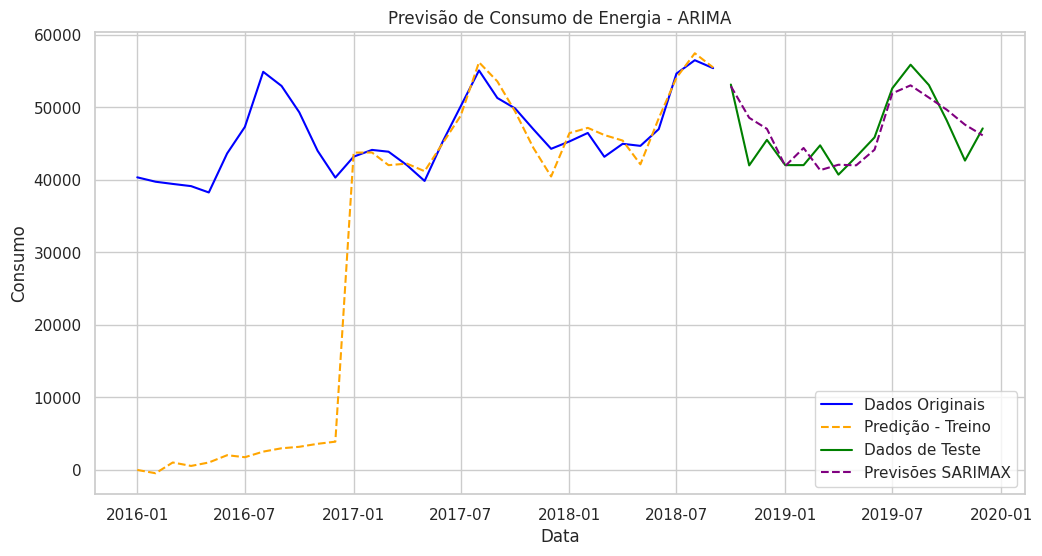

In [ ]:
# Visualização
plt.figure(figsize=(12, 6))
plt.plot(new_york_data_10007_sarimax_train.index, new_york_data_10007_sarimax_train.value, label='Dados Originais', color='blue')
plt.plot(predictions_sarimax_aic.index, predictions_sarimax_aic.values, color="orange", linestyle="--",  label='Predição - Treino')
plt.plot(new_york_data_10007_sarimax_test.index, new_york_data_10007_sarimax_test.value, label='Dados de Teste', color='green')
plt.plot(forecast_sarimax_aic.index, forecast_sarimax_aic, label='Previsões SARIMAX', color='purple', linestyle='--')
plt.title('Previsão de Consumo de Energia - ARIMA')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.legend()
plt.show()

## Grafico

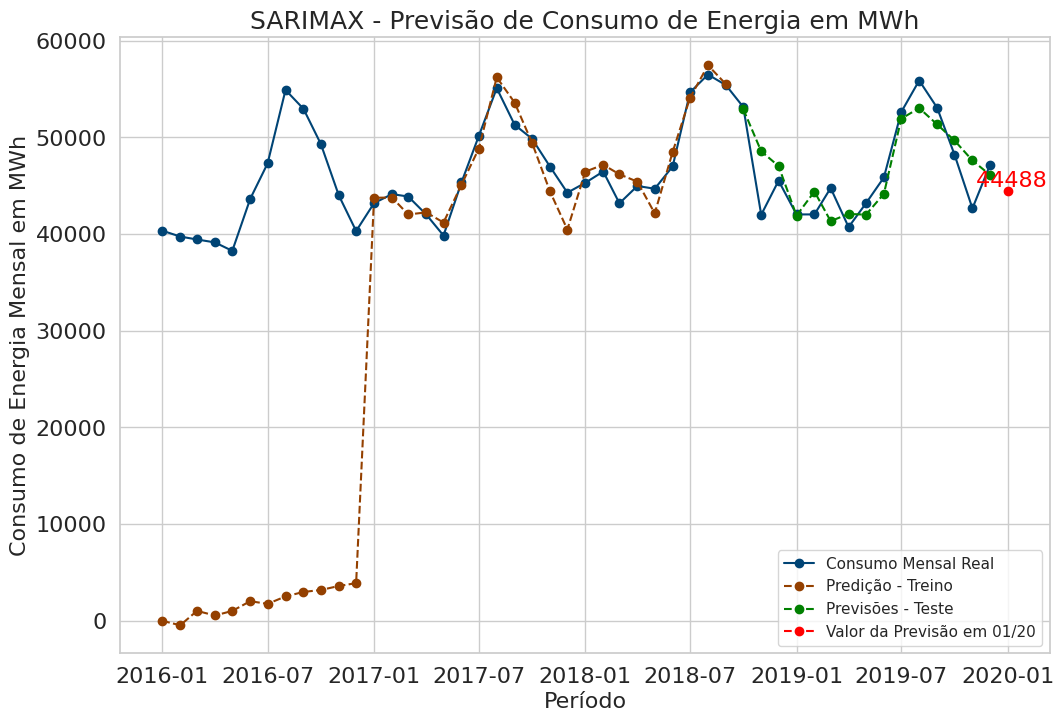

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_sarimax.index, new_york_data_10007_sarimax.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_sarimax_train.index, predictions_sarimax_aic.values, color=corTestReal, marker='o', linestyle="--",  label='Predição - Treino')
plt.plot(forecast_sarimax_aic.index, forecast_sarimax_aic.values, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(pd.to_datetime('2020-01-01'), last_forecast_sarimax_aic, linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(last_forecast_sarimax_aic)}", (pd.to_datetime('2020-01-01'), last_forecast_sarimax_aic), color="red", fontsize=16, ha='center', va='bottom')
plt.title('SARIMAX - Previsão de Consumo de Energia em MWh', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Metrica de Qualidade

In [ ]:
# 1. Calcular MSE, RMSE e R² para o conjunto de teste
aic_sarimax = model_sarimax_aic_fit.aic
mse = mean_squared_error(new_york_data_10007_sarimax_test.value, forecast_sarimax_aic.values)
rmse = np.sqrt(mse)
r2 = r2_score(new_york_data_10007_sarimax_test.value, forecast_sarimax_aic.values)

# Exibir as métricas
print(f"AIC: {aic_sarimax}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
# AIC: 389.4005764047691
# MSE: 13278973.373935444
# RMSE: 3644.0325703724775
# R²: 0.4139554602608948
# AIC: 615.7784822028177
# MSE: 7043802.553329407
# RMSE: 2654.016306153639
# R²: 0.6891339481498131

AIC: 624.7436577943894
MSE: 7202806.478232549
RMSE: 2683.804478391179
R²: 0.6821165847315329


# LSTM

In [ ]:
!pip install scikeras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import sklearn as sklearn
from scikeras.wrappers import KerasClassifier, KerasRegressor

## Normalização dos dados

In [ ]:
new_york_data_10007_lstm = new_york_data_10007.copy()

new_york_data_10007_lstm_norm = new_york_data_10007_lstm['value'].values
# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(new_york_data_10007_lstm_norm.reshape(-1, 1))

# Dividir os dados em treino (70%) e teste (30%)
train_size = int(len(data_scaled) * 0.7)
train, test = data_scaled[:train_size], data_scaled[train_size:]

# Função para criar conjuntos de dados com passos (n_steps)
def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Criar conjuntos de dados
n_steps = 1
X_train, y_train = create_dataset(train, n_steps)
X_test, y_test = create_dataset(test, n_steps)

# Reshape para [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Camada de saída

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(X_train, y_train, batch_size=32, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2780
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2721
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2657
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2594
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2528
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2476
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2413
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2333
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2264
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2219
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2148
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2061
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1979
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1916
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1841
Epoch 16/100
1/1 ━━━━

In [ ]:
# Prever os dados de treino
train_predict = model.predict(X_train)

# Prever os dados de teste
test_predict = model.predict(X_test)

# Inverter a normalização para obter os valores reais
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)



# Obter os valores reais de y_train e y_test
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


In [ ]:
# Obter os últimos n_steps dados do conjunto de teste
last_steps = test[-n_steps:]  # Últimos n_steps dados
last_steps = last_steps.reshape((1, n_steps, 1))  # Reshape para o formato [samples, time steps, features]

# Prever o próximo mês
next_month_prediction = model.predict(last_steps)

# Inverter a normalização para obter o valor real
next_month_prediction = scaler.inverse_transform(next_month_prediction)
next_month_value = next_month_prediction[0][0]
print(f'Previsão para 01/2020: {next_month_value:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Previsão para 01/2020: 47248.7148


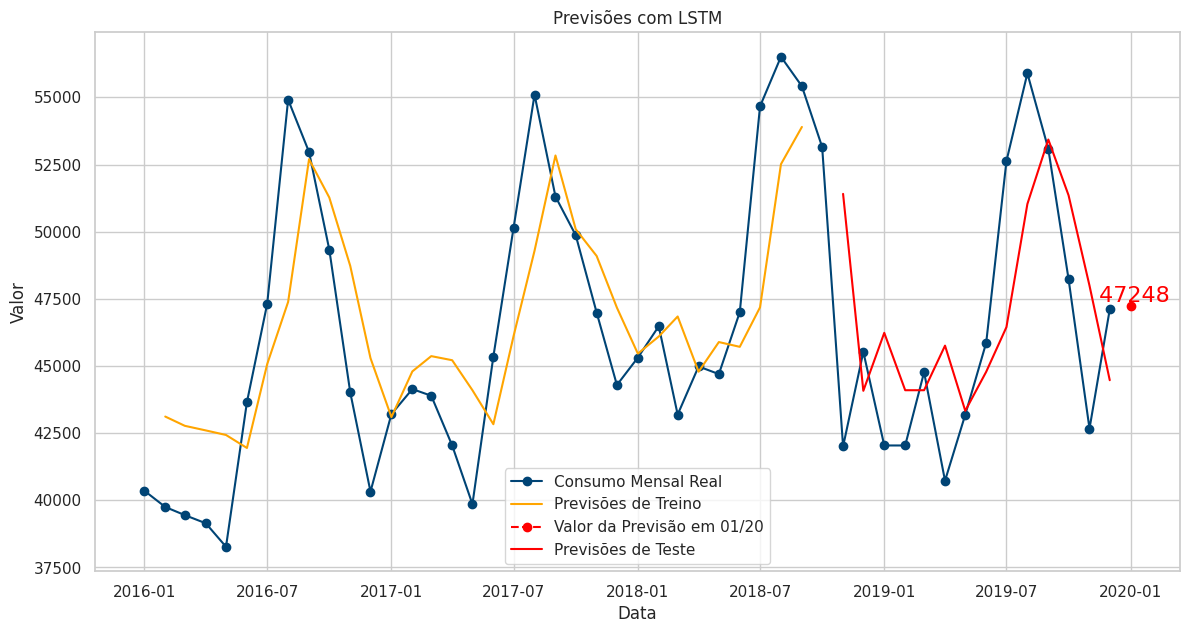

In [ ]:
# Plotar resultados
plt.figure(figsize=(14, 7))

# Plotar dados reais de treino
plt.plot(new_york_data_10007_lstm.index, new_york_data_10007_lstm.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
# plt.plot(new_york_data_10007_lstm.index[n_steps:train_size], y_train_actual, color='blue', label='Dados de Treino Reais')

# Plotar previsões de treino
plt.plot(new_york_data_10007_lstm.index[n_steps:train_size], train_predict, color='orange', label='Previsões de Treino')

plt.plot(pd.to_datetime('2020-01-01'), next_month_value, linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(next_month_value)}", (pd.to_datetime('2020-01-01'), next_month_value), color="red", fontsize=16, ha='center', va='bottom')
# Plotar dados reais de teste
# plt.plot(new_york_data_10007_lstm.index[train_size + n_steps:], y_test_actual, color='green', label='Dados de Teste Reais')

# Plotar previsões de teste
plt.plot(new_york_data_10007_lstm.index[train_size + n_steps:], test_predict, color='red', label='Previsões de Teste')

plt.title('Previsões com LSTM')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

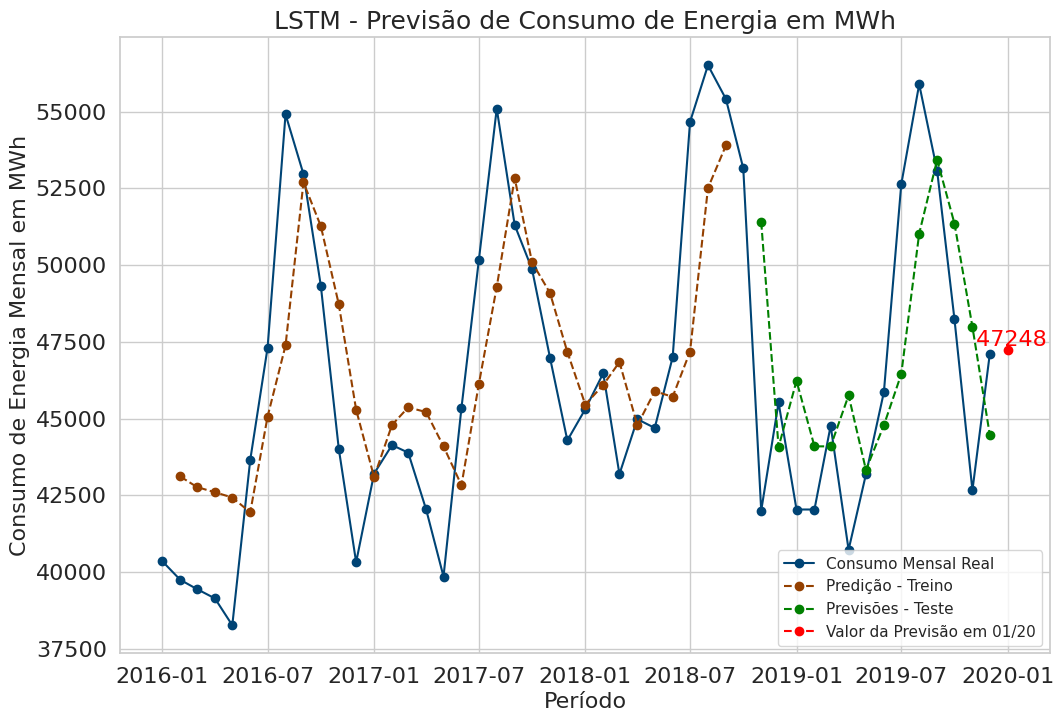

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_lstm.index, new_york_data_10007_lstm.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_lstm.index[n_steps:train_size], train_predict, color=corTestReal, marker='o', linestyle="--",  label='Predição - Treino')
plt.plot(new_york_data_10007_lstm.index[train_size + n_steps:], test_predict, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(pd.to_datetime('2020-01-01'), next_month_value, linestyle="--", marker='o', color='red', label='Valor da Previsão em 01/20')
plt.annotate(f" {int(next_month_value)}", (pd.to_datetime('2020-01-01'), next_month_value), color="red", fontsize=16, ha='center', va='bottom')
plt.title('LSTM - Previsão de Consumo de Energia em MWh', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [ ]:
# mse = mean_squared_error(test_inverse[0], predict_test_inverse[:,0])
# rmse = np.sqrt(mse)
# r2 = r2_score(test_inverse[0], predict_test_inverse[:,0])

# # Exibir as métricas
# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"R²: {r2}")
# # MSE: 16476042.481479466
# # RMSE: 4059.0691644118933

# MSE: 17778568.469312016
# RMSE: 4216.463976996841
# R²: 0.21055095495825427

In [ ]:
# Concatenar as previsões de treino e teste
all_predictions = np.concatenate((train_predict, test_predict), axis=0)

# Concatenar os valores reais de treino e teste
all_actuals = np.concatenate((y_train_actual, y_test_actual), axis=0)

# Certifique-se de que as dimensões estão corretas
print(f'Tamanho das previsões: {all_predictions.shape}, Tamanho dos valores reais: {all_actuals.shape}')

# Calcular MSE, RMSE e R² para a série completa
mse_overall = mean_squared_error(all_actuals, all_predictions)
rmse_overall = np.sqrt(mse_overall)
r2_overall = r2_score(all_actuals, all_predictions)

# Exibir os resultados
print(f'Dados Gerais: MSE = {mse_overall:.4f}, RMSE = {rmse_overall:.4f}, R² = {r2_overall:.4f}')

Tamanho das previsões: (46, 1), Tamanho dos valores reais: (46, 1)
Dados Gerais: MSE = 13179653.3839, RMSE = 3630.3792, R² = 0.4793


In [ ]:
# # Prever os dados de treino
# train_predict = model.predict(X_train)

# # Prever os dados de teste
# test_predict = model.predict(X_test)

# # Inverter a normalização para obter os valores reais
# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)

# # Obter os valores reais de y_train e y_test
# y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

## Grid Search

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import sklearn as sklearn
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Função para criar o modelo Keras que será usada no Grid Search
def create_lstm_model(units=50):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Crie o modelo KerasRegressor
model = KerasRegressor(build_fn=create_lstm_model, epochs=100, units=50, verbose=0)

# Defina os hiperparâmetros que deseja otimizar
param_grid = {
    'units': [50, 100],  # Varie o número de unidades LSTM
    'epochs': [50, 100],  # Varie o número de épocas de treinamento
    'batch_size': [32, 64]  # Varie o tamanho do lote
}

# Realize o Grid Search
grid = sklearn.model_selection.GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train, y_train)

# Exiba os melhores resultados
print("Melhores hiperparâmetros encontrados: ", grid_result.best_params_)
print("Melhor MSE encontrado: ", grid_result.best_score_)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in 

Melhores hiperparâmetros encontrados:  {'batch_size': 32, 'epochs': 100, 'units': 100}
Melhor MSE encontrado:  -0.04164293843011061


# Potencial FLOW

In [ ]:
coordinates = new_york_data[['latitude', 'longitude']].values
consumo = new_york_data['value'].values
tempo = new_york_data['datetime'].values

In [ ]:
grid_x, grid_y = np.mgrid[min(new_york_data.latitude):max(new_york_data.latitude):100j, min(new_york_data.longitude):max(new_york_data.longitude):100j]


In [ ]:
from scipy.interpolate import griddata

In [ ]:
grid_consumo = griddata(coordinates, consumo, (grid_x, grid_y), method='cubic')


In [ ]:
a, b = 1.0, 1.0
phi = a * grid_x**2 + b * grid_y**2

# Calcular o campo vetorial (gradiente da função potencial)
U, V = np.gradient(-phi)

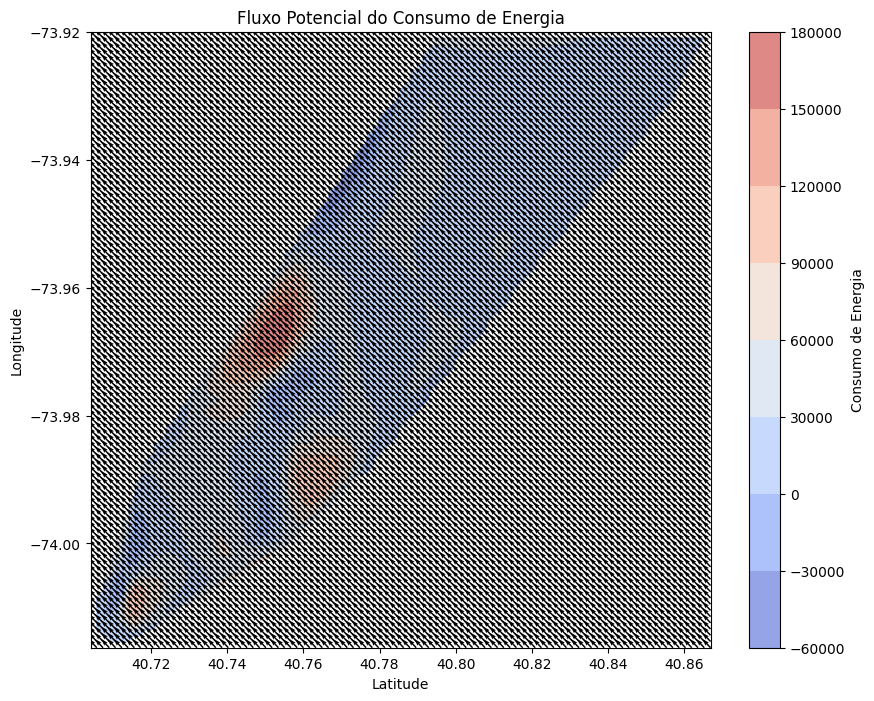

In [ ]:
plt.figure(figsize=(10, 8))
plt.contourf(grid_x, grid_y, grid_consumo, alpha=0.6, cmap='coolwarm')
plt.colorbar(label='Consumo de Energia')

plt.quiver(grid_x, grid_y, U, V, color='k', scale=10)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Fluxo Potencial do Consumo de Energia')
plt.show()
# menor que 0

## Variabilidade

In [ ]:
# Definir parâmetros do ruído gaussiano
mean = 0  # Média do ruído (não queremos adicionar um viés significativo)
std_dev = 5000  # Desvio padrão do ruído, controlando a magnitude da anomalia

# Aplicar ruído gaussiano ao campo 'value' para criar a anomalia
new_york_data_1['value_anomalous'] = new_york_data_1['value'] + np.random.normal(mean, std_dev)

# Mostrar o valor original e o valor anômalo
print("Valor original:", new_york_data_1['value'].values[0])
print("Valor com anomalia:", new_york_data_1['value_anomalous'].values[0])

NameError: name 'new_york_data_1' is not defined

In [ ]:
new_york_data['zip_code']

60146     10013
60197     10162
60257     10013
60275     10007
60289     10103
          ...  
513850    10280
513866    10007
513874    10011
513892    10026
513950    10011
Name: zip_code, Length: 3300, dtype: int64

In [ ]:
new_york_data[new_york_data['zip_code'] == 10026]

year   data_class data_field_display_name         data_field  \
60525   2019  electricity   Total Consumption (T)  3_nat_consumption   
66636   2019  electricity   Total Consumption (T)  3_nat_consumption   
71121   2019  electricity   Total Consumption (T)  3_nat_consumption   
72878   2019  electricity   Total Consumption (T)  3_nat_consumption   
73803   2019  electricity   Total Consumption (T)  3_nat_consumption   
75250   2019  electricity   Total Consumption (T)  3_nat_consumption   
83545   2019  electricity   Total Consumption (T)  3_nat_consumption   
84306   2019  electricity   Total Consumption (T)  3_nat_consumption   
85026   2019  electricity   Total Consumption (T)  3_nat_consumption   
86894   2019  electricity   Total Consumption (T)  3_nat_consumption   
169169  2019  electricity   Total Consumption (T)  3_nat_consumption   
172527  2019  electricity   Total Consumption (T)  3_nat_consumption   
230454  2018  electricity   Total Consumption (T)  3_nat_consumption   
230995  2018  electricity   Total Consumption (T)  3_nat_consumption   
231715  2018  electricity   Total Consumption (T)  3_nat_consumption   
232403  2018  electricity   Total Consumption (T)  3_nat_consumption   
235456  2018  electricity   Total Consumption (T)  3_nat_consumption   
240485  2018  electricity   Total Consumption (T)  3_nat_consumption   
246283  2018  electricity   Total Consumption (T)  3_nat_consumption   
246683  2018  electricity   Total Consumption (T)  3_nat_consumption   
247124  2018  electricity   Total Consumption (T)  3_nat_consumption   
249130  2018  electricity   Total Consumption (T)  3_nat_consumption   
250282  2018  electricity   Total Consumption (T)  3_nat_consumption   
251132  2018  electricity   Total Consumption (T)  3_nat_consumption   
379481  2017  electricity   Total Consumption (T)  3_nat_consumption   
380169  2017  electricity   Total Consumption (T)  3_nat_consumption   
380844  2017  electricity   Total Consumption (T)  3_nat_consumption   
380874  2017  electricity   Total Consumption (T)  3_nat_consumption   
382593  2017  electricity   Total Consumption (T)  3_nat_consumption   
383038  2017  electricity   Total Consumption (T)  3_nat_consumption   
386534  2017  electricity   Total Consumption (T)  3_nat_consumption   
387650  2017  electricity   Total Consumption (T)  3_nat_consumption   
389373  2017  electricity   Total Consumption (T)  3_nat_consumption   
391174  2017  electricity   Total Consumption (T)  3_nat_consumption   
392304  2017  electricity   Total Consumption (T)  3_nat_consumption   
393622  2017  electricity   Total Consumption (T)  3_nat_consumption   
492852  2016  electricity   Total Consumption (T)  3_nat_consumption   
496204  2016  electricity   Total Consumption (T)  3_nat_consumption   
497681  2016  electricity   Total Consumption (T)  3_nat_consumption   
505601  2016  electricity   Total Consumption (T)  3_nat_consumption   
505810  2016  electricity   Total Consumption (T)  3_nat_consumption   
508539  2016  electricity   Total Consumption (T)  3_nat_consumption   
510586  2016  electricity   Total Consumption (T)  3_nat_consumption   
510647  2016  electricity   Total Consumption (T)  3_nat_consumption   
511491  2016  electricity   Total Consumption (T)  3_nat_consumption   
511549  2016  electricity   Total Consumption (T)  3_nat_consumption   
511926  2016  electricity   Total Consumption (T)  3_nat_consumption   
513892  2016  electricity   Total Consumption (T)  3_nat_consumption   

        zip_city  month  zip_code state_2  uer_id      data_stream  \
60525   New York      7     10026      NY       3  zipcode_monthly   
66636   New York      4     10026      NY       3  zipcode_monthly   
71121   New York      3     10026      NY       3  zipcode_monthly   
72878   New York      6     10026      NY       3  zipcode_monthly   
73803   New York      2     10026      NY       3  zipcode_monthly   
75250   New York     12     10026      NY       3  zipcode_

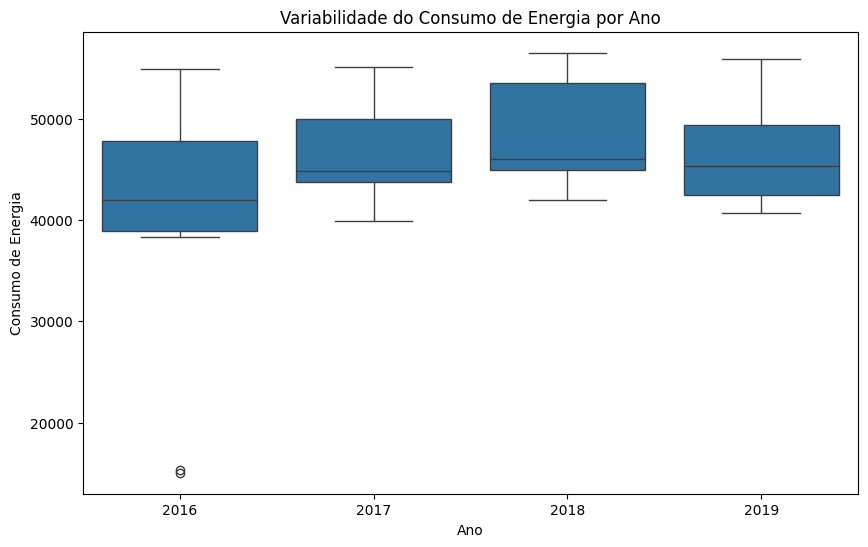

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='value', data=new_york_data_1)
plt.title('Variabilidade do Consumo de Energia por Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo de Energia')
plt.show()

## Segmentação

## I de Moran

In [ ]:
pip install pysal geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import geopandas as gpd
from pysal.lib import weights
from pysal.explore import esda

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [ ]:
new_york_data

year   data_class data_field_display_name         data_field  \
60146   2019  electricity   Total Consumption (T)  3_nat_consumption   
60197   2019  electricity   Total Consumption (T)  3_nat_consumption   
60257   2019  electricity   Total Consumption (T)  3_nat_consumption   
60275   2019  electricity   Total Consumption (T)  3_nat_consumption   
60289   2019  electricity   Total Consumption (T)  3_nat_consumption   
...      ...          ...                     ...                ...   
513850  2016  electricity   Total Consumption (T)  3_nat_consumption   
513866  2016  electricity   Total Consumption (T)  3_nat_consumption   
513874  2016  electricity   Total Consumption (T)  3_nat_consumption   
513892  2016  electricity   Total Consumption (T)  3_nat_consumption   
513950  2016  electricity   Total Consumption (T)  3_nat_consumption   

        zip_city  month  zip_code state_2  uer_id      data_stream  \
60146   New York      1     10013      NY       3  zipcode_monthly   
60197   New York      7     10162      NY       3  zipcode_monthly   
60257   New York      3     10013      NY       3  zipcode_monthly   
60275   New York      4     10007      NY       3  zipcode_monthly   
60289   New York      6     10103      NY       3  zipcode_monthly   
...          ...    ...       ...     ...     ...              ...   
513850  New York     11     10280      NY       3  zipcode_monthly   
513866  New York      2     10007      NY       3  zipcode_monthly   
513874  New York      2     10011      NY       3  zipcode_monthly   
513892  New York      1     10026      NY       3  zipcode_monthly   
513950  New York      8     10011      NY       3  zipcode_monthly   

       utility_display_name      value  number_of_accounts  \
60146   Consolidated Edison  63023.182               19236   
60197   Consolidated Edison    660.306                 860   
60257   Consolidated Edison  68628.405               19274   
60275   Consolidated Edison  40728.874                4081   
60289   Consolidated Edison   -999.000                   3   
...                     ...        ...                 ...   
513850  Consolidated Edison   4381.199                3223   
513866  Consolidated Edison  15042.079                3598   
513874  Consolidated Edison  49096.887               30798   
513892  Consolidated Edison  15913.130               14082   
513950  Consolidated Edison  82743.816               31697   

                                         Georeference  \
60146    POINT (-74.00556469999998 40.72033000000005)   
60197    POINT (-73.95018941599994 40.76950865300006)   
60257    POINT (-74.00556469999998 40.72033000000005)   
60275    POINT (-74.00801499999994 40.71343000000007)   
60289    POINT (-73.97599773399998 40.76027145200004)   
...                                               ...   
513850  POINT (-74.01632999999998 40.709235000000035)   
513866   POINT (-74.00801499999994 40.71343000000007)   
513874   POINT (-74.00142499999998 40.74127000000004)   
513892   POINT (-73.95329499999997 40.80200000000008)   
513950   POINT (-74.00142499999998 40.74127000000004)   

        NYS Municipal Boundaries  New York Zip Codes  Counties   datetime  \
60146                        749               737.0    2095.0 2019-01-01   
60197                        749                 NaN    2095.0 2019-07-01   
60257                        749               737.0    2095.0 2019-03-01   
60275                        749               723.0    2095.0 2019-04-01   
60289                        749               577.0    2095.0 2019-06-01   
...                          ...                 ...       ...        ...   
513850                       749               602.0    2095.0 2016-11-01   
513866                       749               723.0    2095.0 2016-02-01   
513874                       749               735.0    2095.0 2016-02-01   
513892                       749               753.0    2095.0 2016-01-01   
513950                   

In [ ]:
import geopandas as gpd

# Set the SHAPE_RESTORE_SHX option to YES
gpd.io.file.fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'

# Path to the shapefile
shapefile_path = "/content/drive/MyDrive/Leandro_PPGESE/Referencias/Smart_metering/Dataset/Energy_Consumption_New_York/building_footprints_shape/building_0716.shp"

# Load the shapefile
try:
    gdf = gpd.read_file(shapefile_path)
    print(gdf.head())
except Exception as e:
    print(f"Error: {e}")

   NAME      BIN         BBL  CNSTRCT_YR  LSTMODDATE   LSTSTATYPE  DOITT_ID  \
0  None  4462384  4155980564        2001  2005-05-31  Constructed    939203   
1  None  4467306  4163500400        1938  2009-02-14  Constructed    107990   
2  None  4529256  4160290023        1920  2009-02-14  Constructed    931167   
3  None  4540232  4163250001           0  2013-09-19  Constructed     86053   
4  None  4530675  4160900043        2004  2010-07-26  Constructed    998592   

   HEIGHTROOF  FEAT_CODE  SUB_CODE  GROUNDELEV  NUM_FLOORS BUILT_CODE  \
0   26.528549       2100    210000           6         2.0       None   
1   17.947245       2100    210000           8         1.0          E   
2   14.242061       5110    511000           6         2.0          E   
3   14.529231       2100    210000          16         2.0       None   
4   42.447070       2100    210000           7         3.0       None   

    SHAPE_AREA   SHAPE_LEN                                           geometry  
0  176

In [ ]:
gdf

NAME      BIN         BBL  CNSTRCT_YR  LSTMODDATE   LSTSTATYPE  \
0        None  4462384  4155980564        2001  2005-05-31  Constructed   
1        None  4467306  4163500400        1938  2009-02-14  Constructed   
2        None  4529256  4160290023        1920  2009-02-14  Constructed   
3        None  4540232  4163250001           0  2013-09-19  Constructed   
4        None  4530675  4160900043        2004  2010-07-26  Constructed   
...       ...      ...         ...         ...         ...          ...   
1082344  None  1795020  1270029880        2016  2016-06-22  Constructed   
1082345  None  2795001  2270029999        2016  2016-06-22  Constructed   
1082346  None  1795027  1014890008        1900  2016-06-22  Constructed   
1082347  None  1795001  1270029999        2016  2016-06-22  Constructed   
1082348  None  1795013  1270029987        2016  2016-06-22  Constructed   

         DOITT_ID  HEIGHTROOF  FEAT_CODE  SUB_CODE  GROUNDELEV  NUM_FLOORS  \
0          939203   26.528549       2100    210000           6         2.0   
1          107990   17.947245       2100    210000           8         1.0   
2          931167   14.242061       5110    511000           6         2.0   
3           86053   14.529231       2100    210000          16         2.0   
4          998592   42.447070       2100    210000           7         3.0   
...           ...         ...        ...       ...         ...         ...   
1082344   1273171    0.000000       2110    211000           0         0.0   
1082345   1273175   91.930000       2110    211000          41         0.0   
1082346   1273172    0.000000       2110    211000           0         6.0   
1082347   1273167    0.000000       2110    211000           0         0.0   
1082348   1273170    0.000000       2110    211000           0         0.0   

        BUILT_CODE   SHAPE_AREA   SHAPE_LEN  \
0             None  1768.567205  169.940373   
1                E  1105.077843  148.987698   
2                E   402.928037   80.661670   
3             None   668.812178  108.680772   
4             None  1094.409581  146.076029   
...            ...          ...         ...   
1082344       None  1075.117146  208.468726   
1082345       None  3101.206406  297.302815   
1082346       None    98.707606   61.552649   
1082347       None   119.192516   50.783825   
1082348       None   635.839968  182.778649   

                                                  geometry  
0        POLYGON ((1055753.964 157644.676, 1055732.872 ...  
1        POLYGON ((1006227.581 142715.420, 1006222.716 ...  
2        POLYGON ((1040266.203 157269.045, 1040244.149 ...  
3        POLYGON ((1018305.302 145226.418, 1018288.130 ...  
4        POLYGON ((1038867.297 154082.085, 1038845.392 ...  
...                                                    ...  
1082344  POLYGON ((988665.772 221176.219, 988675.746 22...  
1082345  POLYGON ((1004315.420 237155.000, 1004306.910 ...  
1082346  POLYGON ((998093.456 219764.084, 998106.550 21...  
1082347  POLYGON ((981622.132 200945.282, 981641.046 20...  
1082348  POLYGON ((980799.259 197320.298, 980725.661 19...  

[1082349 rows x 16 columns]

In [ ]:
import geopandas as gpd
import libpysal as ps
import esda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
# gdf = gdf.to_crs(epsg=4326)

# # Variable of interest for Moran's I (e.g., HEIGHTROOF)
# variable = 'HEIGHTROOF'

# # Drop rows with missing values in the variable of interest
# gdf = gdf.dropna(subset=[variable])

In [ ]:
if 'latitude' not in new_york_data.columns or 'longitude' not in new_york_data.columns:
    raise ValueError("Energy consumption data must include 'latitude' and 'longitude' columns.")

In [ ]:
geometry = [Point(xy) for xy in zip(new_york_data['longitude'], new_york_data['latitude'])]
gdf_energy = gpd.GeoDataFrame(new_york_data, crs="EPSG:4326", geometry=geometry)

In [ ]:
gdf = gdf.to_crs(epsg=4326)
gdf_energy = gdf_energy.to_crs(epsg=4326)

In [ ]:

# Calculate centroids of the polygons in the shapefile
gdf['centroid'] = gdf.centroid

# Perform a spatial join based on proximity
joined_gdf = gpd.sjoin_nearest(gdf_energy, gdf, how="left", distance_col="distances")

# Now you can proceed with spatial analysis on `joined_gdf`
print(joined_gdf.head())

<ipython-input-45-496e9415a31f>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid
/usr/local/lib/python3.10/dist-packages/geopandas/array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


       year   data_class data_field_display_name         data_field  zip_city  \
60146  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60197  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60257  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60275  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60289  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   

       month  zip_code state_2  uer_id      data_stream  ... HEIGHTROOF  \
60146      1     10013      NY       3  zipcode_monthly  ...     134.10   
60197      7     10162      NY       3  zipcode_monthly  ...     163.87   
60257      3     10013      NY       3  zipcode_monthly  ...     134.10   
60275      4     10007      NY       3  zipcode_monthly  ...     168.66   
60289      6     10103      NY       3  zipcode_monthly  ...     480.59   

       FEAT_CODE  SUB_CODE GROUNDELEV  NUM_FLOORS  BUILT_CODE 

In [ ]:
joined_gdf.head()

year   data_class data_field_display_name         data_field  zip_city  \
60146  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60197  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60257  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60275  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   
60289  2019  electricity   Total Consumption (T)  3_nat_consumption  New York   

       month  zip_code state_2  uer_id      data_stream  ... HEIGHTROOF  \
60146      1     10013      NY       3  zipcode_monthly  ...     134.10   
60197      7     10162      NY       3  zipcode_monthly  ...     163.87   
60257      3     10013      NY       3  zipcode_monthly  ...     134.10   
60275      4     10007      NY       3  zipcode_monthly  ...     168.66   
60289      6     10103      NY       3  zipcode_monthly  ...     480.59   

       FEAT_CODE  SUB_CODE GROUNDELEV  NUM_FLOORS  BUILT_CODE    SHAPE_AREA  \
60146       2100    210000         11        11.0        None  11061.396123   
60197       2100    210000         22        17.0        None  15101.923973   
60257       2100    210000         11        11.0        None  11061.396123   
60275       2100    210000         34        12.0           E   8821.803203   
60289       2100    210000         69        40.0        None  60505.594731   

         SHAPE_LEN                    centroid  distances  
60146   506.214636  POINT (-74.00571 40.72058)   0.000097  
60197   725.015515  POINT (-73.95046 40.76927)   0.000050  
60257   506.214636  POINT (-74.00571 40.72058)   0.000097  
60275   435.069682  POINT (-74.00786 40.71360)   0.000084  
60289  1024.495191  POINT (-73.97670 40.76037)   0.000119  

[5 rows x 39 columns]

In [ ]:
pip install libpysal esda splot

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
import libpysal as ps
import esda
import numpy as np
import matplotlib.pyplot as plt
from splot.esda import plot_moran

# Variable of interest for Moran's I (e.g., energy consumption)
variable = 'value'

# Drop rows with missing values in the variable of interest
joined_gdf = joined_gdf.dropna(subset=[variable])

# Create spatial weights matrix (e.g., Queen contiguity)
weights = ps.weights.Queen.from_dataframe(joined_gdf)

# Standardize the variable of interest
y = joined_gdf[variable].values
y_std = (y - y.mean()) / y.std()

# Compute Moran's I
moran = esda.Moran(y_std, weights)

# Print Moran's I statistic and p-value
print(f"Moran's I: {moran.I}")
print(f"P-value: {moran.p_sim}")


<ipython-input-54-8c64654208c9>:14: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = ps.weights.Queen.from_dataframe(joined_gdf)


Moran's I: 0.21115807611352527
P-value: 0.001


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


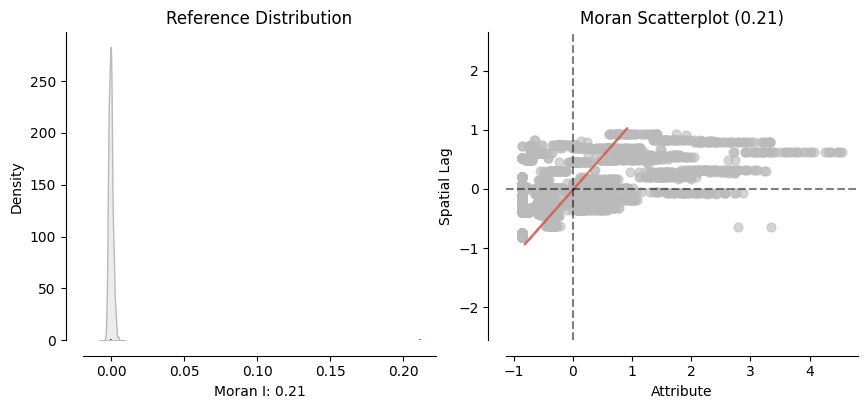

In [ ]:
# https://splot.readthedocs.io/en/latest/generated/splot.esda.plot_moran.html

plot_moran(moran)
plt.show()

# VELHO

### agrupando por cidade e mostrando a quantidade de dados em cada cidade

In [ ]:
df.groupby(by=['zip_city']).max()

year   data_class data_field_display_name           data_field  \
zip_city                                                                       
Adams         2020  electricity   Total Consumption (T)  8_ny_policy_support   
Adams Center  2020  electricity   Total Consumption (T)  8_ny_policy_support   
Adirondack    2020  electricity   Total Consumption (T)  8_ny_policy_support   
Akron         2020  electricity   Total Consumption (T)  8_ny_policy_support   
Albany        2020  electricity   Total Consumption (T)  8_ny_policy_support   
...            ...          ...                     ...                  ...   
Worcester     2020  electricity   Total Consumption (T)  8_ny_policy_support   
Wynantskill   2020  electricity   Total Consumption (T)  8_ny_policy_support   
Wyoming       2020  electricity   Total Consumption (T)  8_ny_policy_support   
Yorkville     2020  electricity   Total Consumption (T)  8_ny_policy_support   
Youngstown    2020  electricity   Total Consumption (T)  8_ny_policy_support   

              month  zip_code state_2  uer_id      data_stream  \
zip_city                                                         
Adams            12     13605      NY       5  zipcode_monthly   
Adams Center     12     13606      NY       5  zipcode_monthly   
Adirondack       12     12808      NY       5  zipcode_monthly   
Akron            12     14001      NY       5  zipcode_monthly   
Albany           12     12222      NY       5  zipcode_monthly   
...             ...       ...     ...     ...              ...   
Worcester        12     12197      NY       5  zipcode_monthly   
Wynantskill      12     12198      NY       5  zipcode_monthly   
Wyoming          12     14591      NY       5  zipcode_monthly   
Yorkville        12     13495      NY       5  zipcode_monthly   
Youngstown       12     14174      NY       5  zipcode_monthly   

             utility_display_name      value  number_of_accounts  \
zip_city                                                           
Adams               National Grid   2746.813                2232   
Adams Center        National Grid   1737.553                1189   
Adirondack          National Grid    382.018                 699   
Akron               National Grid   5934.331                3058   
Albany              National Grid  37962.460               14800   
...                           ...        ...                 ...   
Worcester           National Grid   1676.494                1260   
Wynantskill         National Grid    725.833                 689   
Wyoming             National Grid    615.878                 254   
Yorkville           National Grid   2312.466                1184   
Youngstown          National Grid   3517.768                2820   

                                               Georeference  \
zip_city                                                      
Adams          POINT (-76.02380999999997 43.80928000000006)   
Adams Center   POINT (-76.01006999999998 43.86416000000003)   
Adirondack     POINT (-73.75588499999998 43.76508000000007)   
Akron          POINT (-78.49756499999995 43.02272000000005)   
Albany        POINT (-73.82694289999995 42.672441400000025)   
...                                                     ...   
Worcester     POINT (-74.74935499999998 42.593480000000056)   
Wynantskill    POINT (-73.64023869999994 42.69391280000008)   
Wyoming       POINT (-78.08882499999999 42.827420000000075)   
Yorkville      POINT (-75.27472499999999 43.11215000000004)   
Youngstown    POINT (-79.04467999999997 43.250665000000026)   

              NYS Municipal Boundaries  New York Zip Codes  Counties  
zip_city                                                              
Adams                              860              1469.0    2089.0  
Adams Center                       860              1470.0    2089.0  
Adirondack                         822               786.0    2183.0  
Akron                              284               4

### peguei somente nova york pois é que tem mais dados.

In [ ]:
new_york_data = df[df['zip_city'] == 'New York']
new_york_data

year   data_class             data_field_display_name  \
60064   2019  electricity   Small Consumer Consumption (R+SC)   
60065   2019  electricity   CCA-Ineligible Customer Count (R)   
60071   2019  electricity              ICAP Capacity Tag (SC)   
60072   2019  electricity  CCA-Ineligible Customer Count (SC)   
60074   2019  electricity   Small Commercial Consumption (SC)   
...      ...          ...                                 ...   
513945  2016  electricity           All Other Consumption (O)   
513948  2016  electricity   Small Consumer Consumption (R+SC)   
513950  2016  electricity               Total Consumption (T)   
513952  2016  electricity   Small Commercial Consumption (SC)   
513954  2016  electricity         Residential Consumption (R)   

                 data_field  zip_city  month  zip_code state_2  uer_id  \
60064      3_ny_consumption  New York      6     10039      NY       3   
60065   7_ny_policy_support  New York      8     10012      NY       3   
60071   2_ny_policy_support  New York      4     10069      NY       3   
60072   8_ny_policy_support  New York      2     10278      NY       3   
60074      1_ny_consumption  New York      3     10035      NY       3   
...                     ...       ...    ...       ...     ...     ...   
513945     2_ny_consumption  New York     12     10028      NY       3   
513948     3_ny_consumption  New York      5     10162      NY       3   
513950    3_nat_consumption  New York      8     10011      NY       3   
513952     1_ny_consumption  New York      7     10016      NY       3   
513954    1_nat_consumption  New York      4     10065      NY       3   

            data_stream utility_display_name         value  \
60064   zipcode_monthly  Consolidated Edison   3432.385000   
60065   zipcode_monthly  Consolidated Edison   2263.000000   
60071   zipcode_monthly  Consolidated Edison      5.112449   
60072   zipcode_monthly  Consolidated Edison      1.000000   
60074   zipcode_monthly  Consolidated Edison   3026.544000   
...                 ...                  ...           ...   
513945  zipcode_monthly  Consolidated Edison  15091.408000   
513948  zipcode_monthly  Consolidated Edison   -999.000000   
513950  zipcode_monthly  Consolidated Edison  82743.816000   
513952  zipcode_monthly  Consolidated Edison   6224.201000   
513954  zipcode_monthly  Consolidated Edison   6609.987000   

        number_of_accounts                                   Georeference  \
60064                 6505   POINT (-73.93849499999999 40.82553000000007)   
60065                 2263  POINT (-73.99785499999996 40.725855000000024)   
60071                    0  POINT (-73.98825739999995 40.778021100000046)   
60072                    1  POINT (-74.00308389999998 40.715139700000066)   
60074                 1759   POINT (-73.92083499999995 40.79442000000006)   
...                    ...                                            ...   
513945                 970   POINT (-73.95517999999998 40.77718500000003)   
513948                 853   POINT (-73.95018941599994 40.76950865300006)   
513950               31697   POINT (-74.00142499999998 40.74127000000004)   
513952                3837   POINT (-73.97853499999997 40.74591000000004)   
513954               15452  POINT (-73.96404499999994 40.764985000000024)   

        NYS Municipal Boundaries  New York Zip Codes  Counties  
60064                        749               798.0    2095.0  
60065                        749               736.0    2095.0  
60071                        749               576.0    2095.0  
60072                        749               600.0    2095.0  
60074                        749               794.0    2095.0  
...                          ...                 ...       ...  
513945                       749               755.0    2095.0  
513948                       749                 NaN    2095.0  
513950                       749               735.0    2095.0  
513952            

In [ ]:
# new_york_data.groupby(by=['zip_code']).sum()
df2 = new_york_data.copy()
df2 = df2.groupby(by=['zip_code','year','month','Georeference'])['value'].sum().reset_index()
df2

zip_code  year  month                                  Georeference  \
0        10001  2016      1                    POINT (-74.00119 40.75431)   
1        10001  2016      2                    POINT (-74.00119 40.75431)   
2        10001  2016      3                    POINT (-74.00119 40.75431)   
3        10001  2016      4                    POINT (-74.00119 40.75431)   
4        10001  2016      5                    POINT (-74.00119 40.75431)   
...        ...   ...    ...                                           ...   
3295     10282  2019      8  POINT (-74.01475999999997 40.71679000000006)   
3296     10282  2019      9  POINT (-74.01475999999997 40.71679000000006)   
3297     10282  2019     10  POINT (-74.01475999999997 40.71679000000006)   
3298     10282  2019     11  POINT (-74.01475999999997 40.71679000000006)   
3299     10282  2019     12  POINT (-74.01475999999997 40.71679000000006)   

            value  
0     215884.4010  
1      93024.4340  
2      85065.5160  
3     210346.5340  
4     205790.2830  
...           ...  
3295   99125.9467  
3296   98615.5626  
3297  100353.9374  
3298   98068.5749  
3299   98833.7778  

[3300 rows x 5 columns]

In [ ]:
pip install geopandas fiona shapely

In [ ]:
df2['geometry'] = df2['Georeference'].apply(lambda x: Point(map(float, x[7:-1].split())))

In [ ]:
df2.head()

zip_code  year  month                Georeference       value  \
0     10001  2016      1  POINT (-74.00119 40.75431)  215884.401   
1     10001  2016      2  POINT (-74.00119 40.75431)   93024.434   
2     10001  2016      3  POINT (-74.00119 40.75431)   85065.516   
3     10001  2016      4  POINT (-74.00119 40.75431)  210346.534   
4     10001  2016      5  POINT (-74.00119 40.75431)  205790.283   

                     geometry  
0  POINT (-74.00119 40.75431)  
1  POINT (-74.00119 40.75431)  
2  POINT (-74.00119 40.75431)  
3  POINT (-74.00119 40.75431)  
4  POINT (-74.00119 40.75431)

      zip_code  year  month                                  Georeference  \
0        10001  2016      1                    POINT (-74.00119 40.75431)   
1        10001  2016      2                    POINT (-74.00119 40.75431)   
2        10001  2016      3                    POINT (-74.00119 40.75431)   
3        10001  2016      4                    POINT (-74.00119 40.75431)   
4        10001  2016      5                    POINT (-74.00119 40.75431)   
...        ...   ...    ...                                           ...   
3295     10282  2019      8  POINT (-74.01475999999997 40.71679000000006)   
3296     10282  2019      9  POINT (-74.01475999999997 40.71679000000006)   
3297     10282  2019     10  POINT (-74.01475999999997 40.71679000000006)   
3298     10282  2019     11  POINT (-74.01475999999997 40.71679000000006)   
3299     10282  2019     12  POINT (-74.01475999999997 40.71679000000006)   

            value                    geometry  
0     215884.4010  POINT (-

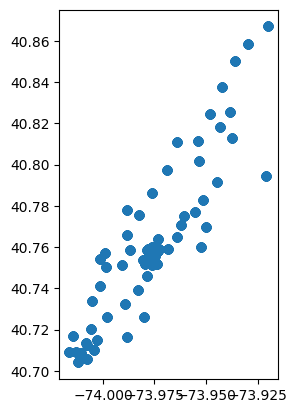

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Convertendo o DataFrame para um GeoDataFrame
gdf = gpd.GeoDataFrame(df2, geometry='geometry')

# Plotando o GeoDataFrame para visualizar os pontos no mapa
gdf.plot()

# Adicione aqui a análise espacial desejada, por exemplo, verificar a proximidade espacial entre códigos postais.
# Você pode usar métodos como gdf.sjoin() para realizar junções espaciais, etc.

# Exibindo o GeoDataFrame
print(gdf)

https://geopandas.org/en/stable/docs.html

In [ ]:
polygons_data = {'area_of_interest': ['A', 'B'],
                 'geometry': [Point(-74.005, 40.7127).buffer(0.02), Point(-73.995, 40.7269).buffer(0.02)]}
poly_gdf = gpd.GeoDataFrame(polygons_data, geometry='geometry')

# Realizando uma junção espacial para verificar a proximidade
result = gpd.sjoin(gdf, poly_gdf, op='within', how='left')

result['area_of_interest'] = result['area_of_interest'].fillna('Not Assigned')

# Exibindo o resultado
result

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


zip_code  year  month                                  Georeference  \
0        10001  2016      1                    POINT (-74.00119 40.75431)   
1        10001  2016      2                    POINT (-74.00119 40.75431)   
2        10001  2016      3                    POINT (-74.00119 40.75431)   
3        10001  2016      4                    POINT (-74.00119 40.75431)   
4        10001  2016      5                    POINT (-74.00119 40.75431)   
...        ...   ...    ...                                           ...   
3295     10282  2019      8  POINT (-74.01475999999997 40.71679000000006)   
3296     10282  2019      9  POINT (-74.01475999999997 40.71679000000006)   
3297     10282  2019     10  POINT (-74.01475999999997 40.71679000000006)   
3298     10282  2019     11  POINT (-74.01475999999997 40.71679000000006)   
3299     10282  2019     12  POINT (-74.01475999999997 40.71679000000006)   

            value                    geometry  index_right area_of_interest  
0     215884.4010  POINT (-74.00119 40.75431)          NaN     Not Assigned  
1      93024.4340  POINT (-74.00119 40.75431)          NaN     Not Assigned  
2      85065.5160  POINT (-74.00119 40.75431)          NaN     Not Assigned  
3     210346.5340  POINT (-74.00119 40.75431)          NaN     Not Assigned  
4     205790.2830  POINT (-74.00119 40.75431)          NaN     Not Assigned  
...           ...                         ...          ...              ...  
3295   99125.9467  POINT (-74.01476 40.71679)          0.0                A  
3296   98615.5626  POINT (-74.01476 40.71679)          0.0                A  
3297  100353.9374  POINT (-74.01476 40.71679)          0.0                A  
3298   98068.5749  POINT (-74.01476 40.71679)          0.0                A  
3299   98833.7778  POINT (-74.01476 40.71679)          0.0                A  

[3636 rows x 8 columns]

In [ ]:
result[result["area_of_interest"] != "Not Assigned"]

zip_code  year  month                                  Georeference  \
48       10002  2016      1  POINT (-73.98844999999994 40.71647500000006)   
48       10002  2016      1  POINT (-73.98844999999994 40.71647500000006)   
49       10002  2016      2  POINT (-73.98844999999994 40.71647500000006)   
49       10002  2016      2  POINT (-73.98844999999994 40.71647500000006)   
50       10002  2016      3  POINT (-73.98844999999994 40.71647500000006)   
...        ...   ...    ...                                           ...   
3295     10282  2019      8  POINT (-74.01475999999997 40.71679000000006)   
3296     10282  2019      9  POINT (-74.01475999999997 40.71679000000006)   
3297     10282  2019     10  POINT (-74.01475999999997 40.71679000000006)   
3298     10282  2019     11  POINT (-74.01475999999997 40.71679000000006)   
3299     10282  2019     12  POINT (-74.01475999999997 40.71679000000006)   

            value                    geometry  index_right area_of_interest  
48    103208.9440  POINT (-73.98845 40.71648)          0.0                A  
48    103208.9440  POINT (-73.98845 40.71648)          1.0                B  
49    210326.8910  POINT (-73.98845 40.71648)          0.0                A  
49    210326.8910  POINT (-73.98845 40.71648)          1.0                B  
50    193050.1280  POINT (-73.98845 40.71648)          0.0                A  
...           ...                         ...          ...              ...  
3295   99125.9467  POINT (-74.01476 40.71679)          0.0                A  
3296   98615.5626  POINT (-74.01476 40.71679)          0.0                A  
3297  100353.9374  POINT (-74.01476 40.71679)          0.0                A  
3298   98068.5749  POINT (-74.01476 40.71679)          0.0                A  
3299   98833.7778  POINT (-74.01476 40.71679)          0.0                A  

[1200 rows x 8 columns]

In [ ]:
pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.8 MB/s eta 0:00:00


In [ ]:
result

zip_code  year  month                                  Georeference  \
0        10001  2016      1                    POINT (-74.00119 40.75431)   
1        10001  2016      2                    POINT (-74.00119 40.75431)   
2        10001  2016      3                    POINT (-74.00119 40.75431)   
3        10001  2016      4                    POINT (-74.00119 40.75431)   
4        10001  2016      5                    POINT (-74.00119 40.75431)   
...        ...   ...    ...                                           ...   
3295     10282  2019      8  POINT (-74.01475999999997 40.71679000000006)   
3296     10282  2019      9  POINT (-74.01475999999997 40.71679000000006)   
3297     10282  2019     10  POINT (-74.01475999999997 40.71679000000006)   
3298     10282  2019     11  POINT (-74.01475999999997 40.71679000000006)   
3299     10282  2019     12  POINT (-74.01475999999997 40.71679000000006)   

            value                    geometry  index_right area_of_interest  
0     215884.4010  POINT (-74.00119 40.75431)          NaN     Not Assigned  
1      93024.4340  POINT (-74.00119 40.75431)          NaN     Not Assigned  
2      85065.5160  POINT (-74.00119 40.75431)          NaN     Not Assigned  
3     210346.5340  POINT (-74.00119 40.75431)          NaN     Not Assigned  
4     205790.2830  POINT (-74.00119 40.75431)          NaN     Not Assigned  
...           ...                         ...          ...              ...  
3295   99125.9467  POINT (-74.01476 40.71679)          0.0                A  
3296   98615.5626  POINT (-74.01476 40.71679)          0.0                A  
3297  100353.9374  POINT (-74.01476 40.71679)          0.0                A  
3298   98068.5749  POINT (-74.01476 40.71679)          0.0                A  
3299   98833.7778  POINT (-74.01476 40.71679)          0.0                A  

[3636 rows x 8 columns]

In [ ]:
result['value']

0       215884.4010
1        93024.4340
2        85065.5160
3       210346.5340
4       205790.2830
           ...     
3295     99125.9467
3296     98615.5626
3297    100353.9374
3298     98068.5749
3299     98833.7778
Name: value, Length: 3636, dtype: float64

In [ ]:
pip install libpysal

In [ ]:
pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 49.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
result

zip_code  year  month                                  Georeference  \
0        10001  2016      1                    POINT (-74.00119 40.75431)   
1        10001  2016      2                    POINT (-74.00119 40.75431)   
2        10001  2016      3                    POINT (-74.00119 40.75431)   
3        10001  2016      4                    POINT (-74.00119 40.75431)   
4        10001  2016      5                    POINT (-74.00119 40.75431)   
...        ...   ...    ...                                           ...   
3295     10282  2019      8  POINT (-74.01475999999997 40.71679000000006)   
3296     10282  2019      9  POINT (-74.01475999999997 40.71679000000006)   
3297     10282  2019     10  POINT (-74.01475999999997 40.71679000000006)   
3298     10282  2019     11  POINT (-74.01475999999997 40.71679000000006)   
3299     10282  2019     12  POINT (-74.01475999999997 40.71679000000006)   

            value                    geometry  index_right area_of_interest  
0     215884.4010  POINT (-74.00119 40.75431)          NaN     Not Assigned  
1      93024.4340  POINT (-74.00119 40.75431)          NaN     Not Assigned  
2      85065.5160  POINT (-74.00119 40.75431)          NaN     Not Assigned  
3     210346.5340  POINT (-74.00119 40.75431)          NaN     Not Assigned  
4     205790.2830  POINT (-74.00119 40.75431)          NaN     Not Assigned  
...           ...                         ...          ...              ...  
3295   99125.9467  POINT (-74.01476 40.71679)          0.0                A  
3296   98615.5626  POINT (-74.01476 40.71679)          0.0                A  
3297  100353.9374  POINT (-74.01476 40.71679)          0.0                A  
3298   98068.5749  POINT (-74.01476 40.71679)          0.0                A  
3299   98833.7778  POINT (-74.01476 40.71679)          0.0                A  

[3636 rows x 8 columns]

In [ ]:
pip install --upgrade pysal

In [ ]:
pip install pysal[weights]

In [ ]:
import geopandas as gpd
import pysal as ps
from splot import esda
from pysal.weights import Queen

# k = 2  # número de vizinhos mais próximos
variable = result["area_of_interest"]
w = ps.Queen.from_dataframe(result)

# Global Moran's I
moran = esda.moran.Moran(variable, w)
print(f"Global Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")

# Local Moran's I
moran_local = esda.moran.Moran_Local(variable, w)

# Visualization
esda.moran_scatterplot(moran_local)
plot_moran(moran_local)

ModuleNotFoundError: ignored

# analise espacial

### esse é o numero de dados por zip_code

note que existe alguns faltante como no zip como no 10279

In [ ]:
new_york_data.groupby(by=['zip_code']).count()

year  data_class  data_field_display_name  data_field  zip_city  \
zip_code                                                                    
10001      440         440                      440         440       440   
10002      440         440                      440         440       440   
10003      440         440                      440         440       440   
10004      440         440                      440         440       440   
10005      440         440                      440         440       440   
...        ...         ...                      ...         ...       ...   
10271      428         428                      428         428       428   
10278      434         434                      434         434       434   
10279      428         428                      428         428       428   
10280      440         440                      440         440       440   
10282      440         440                      440         440       440   

          month  state_2  uer_id  data_stream  utility_display_name  value  \
zip_code                                                                     
10001       440      440     440          440                   440    440   
10002       440      440     440          440                   440    440   
10003       440      440     440          440                   440    440   
10004       440      440     440          440                   440    440   
10005       440      440     440          440                   440    440   
...         ...      ...     ...          ...                   ...    ...   
10271       428      428     428          428                   428    428   
10278       434      434     434          434                   434    434   
10279       428      428     428          428                   428    428   
10280       440      440     440          440                   440    440   
10282       440      440     440          440                   440    440   

          number_of_accounts  Georeference  NYS Municipal Boundaries  \
zip_code                                                               
10001                    440           440                       440   
10002                    440           440                       440   
10003                    440           440                       440   
10004                    440           440                       440   
10005                    440           440                       440   
...                      ...           ...                       ...   
10271                    428           428                       428   
10278                    434           434                       434   
10279                    428           428                       428   
10280                    440           440                       440   
10282                    440           440                       440   

          New York Zip Codes  Counties  
zip_code                                
10001                    440       440  
10002                    440       440  
10003                    440       440  
10004                    440       440  
10005                    440       440  
...                      ...       ...  
10271                    428       428  
10278                    434       434  
10279                    428       428  
10280                    440       440  
10282                    440       440  

[69 rows x 16 columns]

## limpando dados com -999 conforme a documentação isso são considerados consumo não obtidos ou contabilização na extração

## criando os campos Latitude e Longitude

In [ ]:
def extract_coordinates(georeference):
    # Remove o prefixo 'POINT (' e o sufixo ')'
    coords = georeference.replace('POINT (', '').replace(')', '')
    # Divide as coordenadas em uma lista
    lon, lat = map(float, coords.split())
    return lat, lon

# Aplicar a função e criar novas colunas
new_york_data[['latitude', 'longitude']] = new_york_data['Georeference'].apply(extract_coordinates).apply(pd.Series)


<ipython-input-12-27339bb53643>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_data[['latitude', 'longitude']] = new_york_data['Georeference'].apply(extract_coordinates).apply(pd.Series)
<ipython-input-12-27339bb53643>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_york_data[['latitude', 'longitude']] = new_york_data['Georeference'].apply(extract_coordinates).apply(pd.Series)


In [ ]:
new_york_data.head()

year   data_class             data_field_display_name  \
60064  2019  electricity   Small Consumer Consumption (R+SC)   
60065  2019  electricity   CCA-Ineligible Customer Count (R)   
60071  2019  electricity              ICAP Capacity Tag (SC)   
60072  2019  electricity  CCA-Ineligible Customer Count (SC)   
60074  2019  electricity   Small Commercial Consumption (SC)   

                data_field  zip_city  month  zip_code state_2  uer_id  \
60064     3_ny_consumption  New York      6     10039      NY       3   
60065  7_ny_policy_support  New York      8     10012      NY       3   
60071  2_ny_policy_support  New York      4     10069      NY       3   
60072  8_ny_policy_support  New York      2     10278      NY       3   
60074     1_ny_consumption  New York      3     10035      NY       3   

           data_stream utility_display_name        value  number_of_accounts  \
60064  zipcode_monthly  Consolidated Edison  3432.385000                6505   
60065  zipcode_monthly  Consolidated Edison  2263.000000                2263   
60071  zipcode_monthly  Consolidated Edison     5.112449                   0   
60072  zipcode_monthly  Consolidated Edison     1.000000                   1   
60074  zipcode_monthly  Consolidated Edison  3026.544000                1759   

                                        Georeference  \
60064   POINT (-73.93849499999999 40.82553000000007)   
60065  POINT (-73.99785499999996 40.725855000000024)   
60071  POINT (-73.98825739999995 40.778021100000046)   
60072  POINT (-74.00308389999998 40.715139700000066)   
60074   POINT (-73.92083499999995 40.79442000000006)   

       NYS Municipal Boundaries  New York Zip Codes  Counties   latitude  \
60064                       749               798.0    2095.0  40.825530   
60065                       749               736.0    2095.0  40.725855   
60071                       749               576.0    2095.0  40.778021   
60072                       749               600.0    2095.0  40.715140   
60074                       749               794.0    2095.0  40.794420   

       longitude  
60064 -73.938495  
60065 -73.997855  
60071 -73.988257  
60072 -74.003084  
60074 -73.920835

In [ ]:
new_york_data

year   data_class             data_field_display_name  \
60064   2019  electricity   Small Consumer Consumption (R+SC)   
60065   2019  electricity   CCA-Ineligible Customer Count (R)   
60071   2019  electricity              ICAP Capacity Tag (SC)   
60072   2019  electricity  CCA-Ineligible Customer Count (SC)   
60074   2019  electricity   Small Commercial Consumption (SC)   
...      ...          ...                                 ...   
513945  2016  electricity           All Other Consumption (O)   
513948  2016  electricity   Small Consumer Consumption (R+SC)   
513950  2016  electricity               Total Consumption (T)   
513952  2016  electricity   Small Commercial Consumption (SC)   
513954  2016  electricity         Residential Consumption (R)   

                 data_field  zip_city  month  zip_code state_2  uer_id  \
60064      3_ny_consumption  New York      6     10039      NY       3   
60065   7_ny_policy_support  New York      8     10012      NY       3   
60071   2_ny_policy_support  New York      4     10069      NY       3   
60072   8_ny_policy_support  New York      2     10278      NY       3   
60074      1_ny_consumption  New York      3     10035      NY       3   
...                     ...       ...    ...       ...     ...     ...   
513945     2_ny_consumption  New York     12     10028      NY       3   
513948     3_ny_consumption  New York      5     10162      NY       3   
513950    3_nat_consumption  New York      8     10011      NY       3   
513952     1_ny_consumption  New York      7     10016      NY       3   
513954    1_nat_consumption  New York      4     10065      NY       3   

            data_stream utility_display_name         value  \
60064   zipcode_monthly  Consolidated Edison   3432.385000   
60065   zipcode_monthly  Consolidated Edison   2263.000000   
60071   zipcode_monthly  Consolidated Edison      5.112449   
60072   zipcode_monthly  Consolidated Edison      1.000000   
60074   zipcode_monthly  Consolidated Edison   3026.544000   
...                 ...                  ...           ...   
513945  zipcode_monthly  Consolidated Edison  15091.408000   
513948  zipcode_monthly  Consolidated Edison   -999.000000   
513950  zipcode_monthly  Consolidated Edison  82743.816000   
513952  zipcode_monthly  Consolidated Edison   6224.201000   
513954  zipcode_monthly  Consolidated Edison   6609.987000   

        number_of_accounts                                   Georeference  \
60064                 6505   POINT (-73.93849499999999 40.82553000000007)   
60065                 2263  POINT (-73.99785499999996 40.725855000000024)   
60071                    0  POINT (-73.98825739999995 40.778021100000046)   
60072                    1  POINT (-74.00308389999998 40.715139700000066)   
60074                 1759   POINT (-73.92083499999995 40.79442000000006)   
...                    ...                                            ...   
513945                 970   POINT (-73.95517999999998 40.77718500000003)   
513948                 853   POINT (-73.95018941599994 40.76950865300006)   
513950               31697   POINT (-74.00142499999998 40.74127000000004)   
513952                3837   POINT (-73.97853499999997 40.74591000000004)   
513954               15452  POINT (-73.96404499999994 40.764985000000024)   

        NYS Municipal Boundaries  New York Zip Codes  Counties   latitude  \
60064                        749               798.0    2095.0  40.825530   
60065                        749               736.0    2095.0  40.725855   
60071                        749               576.0    2095.0  40.778021   
60072                        749               600.0    2095.0  40.715140   
60074                        749               794.0    2095.0  40.794420   
...                          ...                 ...       ...        ...   
513945                       749               755.0    2095.0  40.777185   
513948                       749                 NaN

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Coordenadas de New York
ny_coords = [40.7128, -74.0060]

# Criar um mapa centrado nas coordenadas do centro da região sul
m = folium.Map(location=ny_coords, zoom_start=10)

# Adicione marcadores ao mapa usando MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Adicione marcadores com coordenadas para o consumo de energia em New York
for index, row in new_york_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],  # Substitua esses campos pelas coordenadas reais de latitude e longitude
        popup=f"Consumption: {row['value']}",
    ).add_to(marker_cluster)

# Exibir o mapa
m.save("mapa_consumo_energia_ny.html")  # Salvar o mapa como um arquivo HTML
print("feito")

KeyboardInterrupt: ignored

### tentando remover o agrupamento dos pontos

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Coordenadas de New York
ny_coords = [40.7128, -74.0060]

# Criar um mapa de New York com nível de zoom ajustado
m = folium.Map(location=ny_coords, zoom_start=12)

# Adicione marcadores ao mapa usando MarkerCluster
marker_cluster = MarkerCluster(disable_clustering=True).add_to(m)

# Adicione marcadores com coordenadas para o consumo de energia em New York
for index, row in new_york_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Consumption: {row['value']}",
    ).add_to(marker_cluster)

# # Calcular os limites (bounds) manualmente
# min_lat, max_lat = new_york_data['latitude'].min(), new_york_data['latitude'].max()
# min_lon, max_lon = new_york_data['longitude'].min(), new_york_data['longitude'].max()

# # Definir a área geográfica de interesse usando viewport_fit
# m.viewport_fit(lnglats=[[min_lon, min_lat], [max_lon, max_lat]])

# Exibir o mapa
m
# .save("mapa_consumo_energia_ny_teste4.html")  # Salvar o mapa como um arquivo HTML
# print("feito")

testeeee

In [ ]:
import folium

new_york_data = new_york_data.sort_values(by='zip_code')

new_york_data
# latitudes = new_york_data.latitude.values[:500]
# longitudes = new_york_data.longitude.values[:500]

# ny_coords = [40.7128, -74.0060]

# mapa = folium.Map(location=ny_coords, zoom_start=12)

# for lat, lon in zip(latitudes,longitudes):
#   folium.Marker(location=[lat,lon], popup=f"Consumption: {1}").add_to(mapa)


# mapa.save("mapa_consumo_energia_ny_teste18.html")  # Salvar o mapa como um arquivo HTML
# print("feito")

year   data_class            data_field_display_name  \
61607   2019  electricity        Business Consumption (SC+O)   
63589   2019  electricity        Business Consumption (SC+O)   
242014  2018  electricity        Business Consumption (SC+O)   
168807  2019  electricity  Small Consumer Consumption (R+SC)   
508461  2016  electricity        Business Consumption (SC+O)   
...      ...          ...                                ...   
82962   2019  electricity  Small Consumer Consumption (R+SC)   
83041   2019  electricity              ICAP Capacity Tag (T)   
170422  2019  electricity  CCA-Ineligible Customer Count (R)   
235871  2018  electricity              ICAP Capacity Tag (O)   
381050  2017  electricity        Business Consumption (SC+O)   

                 data_field  zip_city  month  zip_code state_2  uer_id  \
61607     2_nat_consumption  New York      4     10001      NY       3   
63589     2_nat_consumption  New York      8     10001      NY       3   
242014    2_nat_consumption  New York      6     10001      NY       3   
168807     3_ny_consumption  New York      1     10001      NY       3   
508461    2_nat_consumption  New York      8     10001      NY       3   
...                     ...       ...    ...       ...     ...     ...   
82962      3_ny_consumption  New York     10     10282      NY       3   
83041   6_ny_policy_support  New York     11     10282      NY       3   
170422  7_ny_policy_support  New York      2     10282      NY       3   
235871  3_ny_policy_support  New York     10     10282      NY       3   
381050    2_nat_consumption  New York      6     10282      NY       3   

            data_stream utility_display_name         value  \
61607   zipcode_monthly  Consolidated Edison  63304.325000   
63589   zipcode_monthly  Consolidated Edison  84225.524000   
242014  zipcode_monthly  Consolidated Edison  71745.242000   
168807  zipcode_monthly  Consolidated Edison   5936.858000   
508461  zipcode_monthly  Consolidated Edison  90427.809000   
...                 ...                  ...           ...   
82962   zipcode_monthly  Consolidated Edison   1577.181000   
83041   zipcode_monthly  Consolidated Edison  22551.001000   
170422  zipcode_monthly  Consolidated Edison    129.000000   
235871  zipcode_monthly  Consolidated Edison     19.209343   
381050  zipcode_monthly  Consolidated Edison   9636.836000   

        number_of_accounts                                  Georeference  \
61607                 6423                    POINT (-74.00119 40.75431)   
63589                 6431                    POINT (-74.00119 40.75431)   
242014                6617                    POINT (-74.00119 40.75431)   
168807               13775                    POINT (-74.00119 40.75431)   
508461                6234                    POINT (-74.00119 40.75431)   
...                    ...                                           ...   
82962                 1564  POINT (-74.01475999999997 40.71679000000006)   
83041                    0  POINT (-74.01475999999997 40.71679000000006)   
170422                 129  POINT (-74.01475999999997 40.71679000000006)   
235871                  20  POINT (-74.01475999999997 40.71679000000006)   
381050                 377  POINT (-74.01475999999997 40.71679000000006)   

        NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
61607                        749               717.0    2095.0  40.75431   
63589                        749               717.0    2095.0  40.75431   
242014                       749               717.0    2095.0  40.75431   
168807                       749               717.0    2095.0  40.75431   
508461                       749               717.0    2095.0  40.75431   
...                          ...                 ...       ...       ...   
82962                        749               603.0    2095.0  40.71679   
83041                        749               603.0    2095.0  40.71679   
170422  

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
import folium

latitudes = new_york_data.latitude.values[:500]
longitudes = new_york_data.longitude.values[:500]
ny_coords = [40.7128000, -74.0060000]

mapa = folium.Map(location=ny_coords, zoom_start=12)

# marker_cluster = MarkerCluster(disable_clustering=True).add_to(mapa)

for lat, lon in zip(latitudes,longitudes):
  folium.Marker(location=[lat,lon], popup=f"Consumption: {1}").add_to(mapa)


folium.TileLayer('https://{s}.tile-cyclosm.openstreetmap.fr/cyclosm/{z}/{x}/{y}.png', name = 'OSM',
                 attr = '<a href="https://github.com/cyclosm/cyclosm-cartocss-style/releases" title="CyclOSM - Open Bicycle render">CyclOSM</a> | Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors').add_to(mapa)
folium.LayerControl().add_to(mapa)
min_lat, max_lat = 40.5, 40.9
min_lon, max_lon = -74.3, -73.7

# Definir os limites no mapa
mapa.fit_bounds([[min_lat, min_lon], [max_lat, max_lon]])

mapa.save("mapa_consumo_energia_ny_teste16.html")  # Salvar o mapa como um arquivo HTML
print("feito")

# # Coordenadas de New York
# ny_coords = [40.7128, -74.0060]

# # Criar um mapa de New York com nível de zoom ajustado
# m = folium.Map(location=ny_coords, zoom_start=4.5)

# # Adicione marcadores ao mapa usando MarkerCluster
# marker_cluster = MarkerCluster(disable_clustering=True).add_to(m)

# # Adicione marcadores com coordenadas para o consumo de energia em New York
# for lat, lon in zip(latitude,longitude):
#     folium.Marker(location=[lat,lon]).add_to(mapa_queimadas_brasil)

# # # Calcular os limites (bounds) manualmente
# # min_lat, max_lat = new_york_data['latitude'].min(), new_york_data['latitude'].max()
# # min_lon, max_lon = new_york_data['longitude'].min(), new_york_data['longitude'].max()

# # # Definir a área geográfica de interesse usando viewport_fit
# # m.viewport_fit(lnglats=[[min_lon, min_lat], [max_lon, max_lat]])

# # Exibir o mapa
# m.save("mapa_consumo_energia_ny_teste5.html")  # Salvar o mapa como um arquivo HTML
# print("feito")

feito


# Inserção de anomalia - POC

## 10007

In [157]:
new_york_data_10007_insert = new_york_data_10007.copy()

# Dividir os dados em treinamento e teste
train_size = int(len(new_york_data_10007_insert) * 0.7)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10007_insert) - train_size)

new_york_data_10007_insert['datetime'] = pd.to_datetime(new_york_data_10007_insert['datetime'])
new_york_data_10007_insert.set_index('datetime', inplace=True)
new_york_data_10007_insert = new_york_data_10007_insert.asfreq('MS')
new_york_data_10007_insert

new_york_data_10007_insert_train = new_york_data_10007_insert[:train_size]
new_york_data_10007_insert_test = new_york_data_10007_insert[train_size:]
new_york_data_10007_insert_test.head()

quantidade de treino: 33
quantidade de teste: 15


year   data_class data_field_display_name         data_field  \
datetime                                                                   
2018-10-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-11-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-12-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2019-01-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-02-01  2019  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
datetime                                                                 
2018-10-01  New York     10     10007      NY       3  zipcode_monthly   
2018-11-01  New York     11     10007      NY       3  zipcode_monthly   
2018-12-01  New York     12     10007      NY       3  zipcode_monthly   
2019-01-01  New York      1     10007      NY       3  zipcode_monthly   
2019-02-01  New York      2     10007      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
datetime                                                         
2018-10-01  Consolidated Edison  53153.243                3970   
2018-11-01  Consolidated Edison  42003.814                3970   
2018-12-01  Consolidated Edison  45526.390                3976   
2019-01-01  Consolidated Edison  42041.048                4006   
2019-02-01  Consolidated Edison  42041.048                4006   

                                            Georeference  \
datetime                                                   
2018-10-01  POINT (-74.00801499999994 40.71343000000007)   
2018-11-01  POINT (-74.00801499999994 40.71343000000007)   
2018-12-01  POINT (-74.00801499999994 40.71343000000007)   
2019-01-01  POINT (-74.00801499999994 40.71343000000007)   
2019-02-01  POINT (-74.00801499999994 40.71343000000007)   

            NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
datetime                                                                       
2018-10-01                       749               723.0    2095.0  40.71343   
2018-11-01                       749               723.0    2095.0  40.71343   
2018-12-01                       749               723.0    2095.0  40.71343   
2019-01-01                       749               723.0    2095.0  40.71343   
2019-02-01                       749               723.0    2095.0  40.71343   

            longitude  diff_value  
datetime                           
2018-10-01 -74.008015   -2260.406  
2018-11-01 -74.008015  -11149.429  
2018-12-01 -74.008015    3522.576  
2019-01-01 -74.008015   -3485.342  
2019-02-01 -74.008015       0.000

In [158]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import random

# 1. Prevendo com o modelo Holt-Winters
# Ajuste o modelo Holt-Winters
model_hw_10007 = sm.tsa.ExponentialSmoothing(
    new_york_data_10007_insert_train.value,
    seasonal_periods=12,
    trend="add",
    seasonal='add',
    initialization_method='estimated',
).fit()

### com limiar igual desvio padrão / media

In [159]:
RMSE = 1747.58
mean_train1 = new_york_data_10007_insert_test.value.mean()
print("mean_train1", mean_train1)
desvio_padrao_ruido1 = new_york_data_10007_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido1", desvio_padrao_ruido1)
limiar1 = desvio_padrao_ruido1 / mean_train1
# limiar1 = RMSE * 2
# RMSE
print("limiar1", limiar1)

# Inserindo uma anomalia aleatória
test_length = len(new_york_data_10007_insert_test)
np.random.seed(42)  # Para reprodutibilidade
anomaly_index = np.random.randint(0, test_length)
print("Anomalia no índice:", anomaly_index)
original_value = new_york_data_10007_insert_test.value[anomaly_index]
print("Valor original:", original_value)
noise = np.random.normal(0, desvio_padrao_ruido1)
new_value_with_anomaly = original_value + noise
print("Valor com anomalia:", new_value_with_anomaly)

# Atualizando o conjunto de teste com a anomalia
new_york_data_10007_insert_test_with_anomaly = new_york_data_10007_insert_test.value.copy()
new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly

# Fazendo previsões com a anomalia
predictions_insert1 = model_hw_10007.forecast(steps=test_length)
errors = predictions_insert1 - new_york_data_10007_insert_test

# 5. Verifique se a previsão ultrapassa o limiar1
anomalies_detected1 = []
for i in range(len(predictions_insert1)):
    if predictions_insert1[i] > ((limiar1 + 1) * new_york_data_10007_insert_test_with_anomaly.iloc[i]) or predictions_insert1[i] < ((1 - limiar1) * new_york_data_10007_insert_test_with_anomaly.iloc[i]):
        anomalies_detected1.append((i, predictions_insert1[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected1}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)
#  [(1, 48495.44136433083), (3, 47000.9369911718), (4, 47754.897846962755), (6, 46269.224640863154), (12, 54770.69717100847), (13, 50275.99441108544)]

mean_train1 46594.91333333333
desvio_padrao_ruido1 4927.181378911501
limiar1 0.10574504868510329
Anomalia no índice: 6
Valor original: 40728.874
Valor com anomalia: 38017.76887095651
Anomalias detectadas: [(1, 48495.44136433083), (3, 47000.9369911718), (4, 47754.897846962755), (6, 46269.224640863154), (12, 54770.69717100847), (13, 50275.99441108544)]


<ipython-input-159-6b6fab206b95>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = new_york_data_10007_insert_test.value[anomaly_index]
<ipython-input-159-6b6fab206b95>:24: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly
<ipython-input-159-6b6fab206b95>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert1[i] >

<ipython-input-160-a96f6cc13d54>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(new_york_data_10007_insert_test.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Anomalia Inserida')
<ipython-input-160-a96f6cc13d54>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {int(new_york_data_10007_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10007_insert_test_with_anomaly.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
<ip

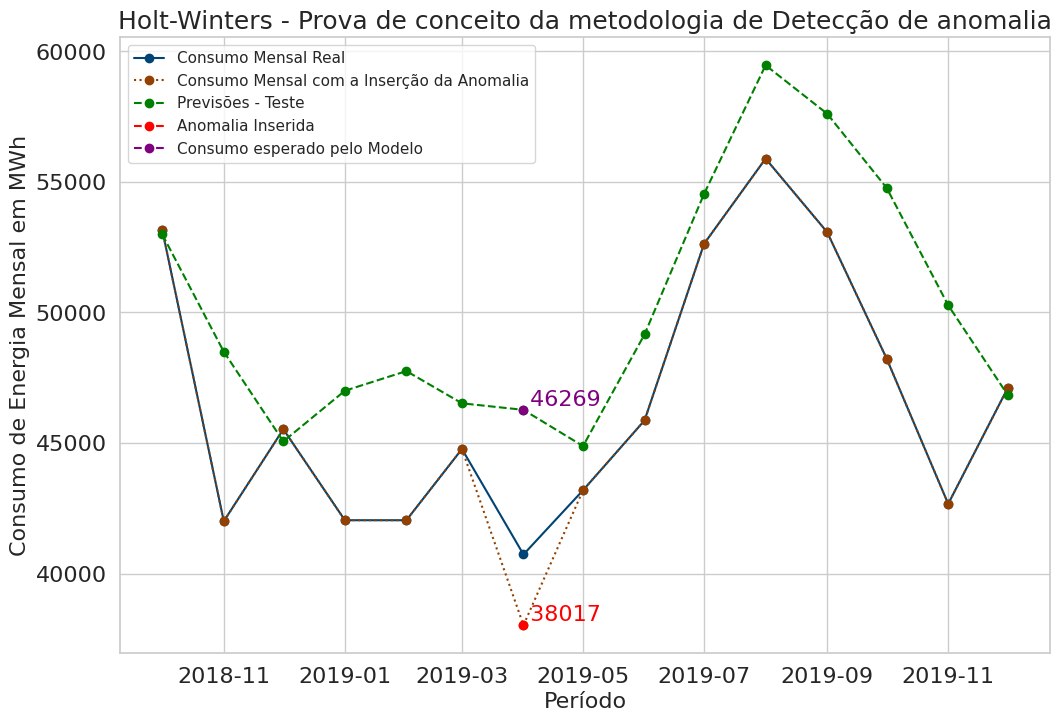

In [160]:
new_york_data_10007_insert_test.index[anomaly_index]

plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10007_insert_test.index, predictions_insert1, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Anomalia Inserida')
plt.annotate(f" {int(new_york_data_10007_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10007_insert_test_with_anomaly.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], predictions_insert1[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert1[anomaly_index])}", (new_york_data_10007_insert_test.index[anomaly_index], predictions_insert1[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper left")
plt.show()

In [161]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected1]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected1:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 1
Falsos Positivos (FP): 5
Falsos Negativos (FN): 0


### Com limiar igual RMSE * 2

In [162]:
RMSE = 1747.58
mean_train2 = new_york_data_10007_insert_test.value.mean()
print("mean_train2", mean_train2)
desvio_padrao_ruido2 = new_york_data_10007_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido2", desvio_padrao_ruido2)
limiar2 = RMSE * 2
# limiar2 = RMSE * 2
# RMSE
print("limiar2", limiar2)

# Inserindo uma anomalia aleatória
test_length = len(new_york_data_10007_insert_test)
np.random.seed(42)  # Para reprodutibilidade
anomaly_index = np.random.randint(0, test_length)
print("Anomalia no índice:", anomaly_index)
original_value = new_york_data_10007_insert_test.value[anomaly_index]
print("Valor original:", original_value)
noise = np.random.normal(0, desvio_padrao_ruido2)
new_value_with_anomaly = original_value + noise
print("Valor com anomalia:", new_value_with_anomaly)

# Atualizando o conjunto de teste com a anomalia
new_york_data_10007_insert_test_with_anomaly = new_york_data_10007_insert_test.value.copy()
new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly

# Fazendo previsões com a anomalia
predictions_insert2 = model_hw_10007.forecast(steps=test_length)
errors = predictions_insert2 - new_york_data_10007_insert_test

# 5. Verifique se a previsão ultrapassa o limiar2
anomalies_detected2 = []
for i in range(len(predictions_insert2)):
    if predictions_insert2[i] > limiar2 + new_york_data_10007_insert_test_with_anomaly.iloc[i] or predictions_insert2[i] < -limiar2 + new_york_data_10007_insert_test_with_anomaly.iloc[i]:
        anomalies_detected2.append((i, predictions_insert2[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected2}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)

mean_train2 46594.91333333333
desvio_padrao_ruido2 4927.181378911501
limiar2 3495.16
Anomalia no índice: 6
Valor original: 40728.874
Valor com anomalia: 38017.76887095651
Anomalias detectadas: [(1, 48495.44136433083), (3, 47000.9369911718), (4, 47754.897846962755), (6, 46269.224640863154), (10, 59470.194082247996), (11, 57614.121717656926), (12, 54770.69717100847), (13, 50275.99441108544)]


<ipython-input-162-da11347b5ddd>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = new_york_data_10007_insert_test.value[anomaly_index]
<ipython-input-162-da11347b5ddd>:24: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly
<ipython-input-162-da11347b5ddd>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert2[i] >

In [ ]:
new_york_data_10007_insert_test.index[anomaly_index]

plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10007_insert_test.index, predictions_insert2, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Anomalia Inserida')
plt.annotate(f" {int(new_york_data_10007_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10007_insert_test_with_anomaly.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], predictions_insert2[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert2[anomaly_index])}", (new_york_data_10007_insert_test.index[anomaly_index], predictions_insert2[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper right")
plt.show()

In [164]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected2]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected2:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 1
Falsos Positivos (FP): 7
Falsos Negativos (FN): 0


## 10013


In [165]:
new_york_data_10013_insert = new_york_data_10013.copy()

# Dividir os dados em treinamento e teste
train_size = int(len(new_york_data_10013_insert) * 0.7)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10013_insert) - train_size)

new_york_data_10013_insert['datetime'] = pd.to_datetime(new_york_data_10013_insert['datetime'])
new_york_data_10013_insert.set_index('datetime', inplace=True)
new_york_data_10013_insert = new_york_data_10013_insert.asfreq('MS')
new_york_data_10013_insert

new_york_data_10013_insert_train = new_york_data_10013_insert[:train_size]
new_york_data_10013_insert_test = new_york_data_10013_insert[train_size:]
new_york_data_10013_insert_test.head()

quantidade de treino: 33
quantidade de teste: 15


year   data_class data_field_display_name         data_field  \
datetime                                                                   
2018-10-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-11-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2018-12-01  2018  electricity   Total Consumption (T)  3_nat_consumption   
2019-01-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-02-01  2019  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
datetime                                                                 
2018-10-01  New York     10     10013      NY       3  zipcode_monthly   
2018-11-01  New York     11     10013      NY       3  zipcode_monthly   
2018-12-01  New York     12     10013      NY       3  zipcode_monthly   
2019-01-01  New York      1     10013      NY       3  zipcode_monthly   
2019-02-01  New York      2     10013      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
datetime                                                         
2018-10-01  Consolidated Edison  77759.524               19116   
2018-11-01  Consolidated Edison  57562.361               19116   
2018-12-01  Consolidated Edison  67916.540               19172   
2019-01-01  Consolidated Edison  63023.182               19236   
2019-02-01  Consolidated Edison  63023.182               19236   

                                            Georeference  \
datetime                                                   
2018-10-01  POINT (-74.00556469999998 40.72033000000005)   
2018-11-01  POINT (-74.00556469999998 40.72033000000005)   
2018-12-01  POINT (-74.00556469999998 40.72033000000005)   
2019-01-01  POINT (-74.00556469999998 40.72033000000005)   
2019-02-01  POINT (-74.00556469999998 40.72033000000005)   

            NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
datetime                                                                       
2018-10-01                       749               737.0    2095.0  40.72033   
2018-11-01                       749               737.0    2095.0  40.72033   
2018-12-01                       749               737.0    2095.0  40.72033   
2019-01-01                       749               737.0    2095.0  40.72033   
2019-02-01                       749               737.0    2095.0  40.72033   

            longitude  diff_value  
datetime                           
2018-10-01 -74.005565   -4449.409  
2018-11-01 -74.005565  -20197.163  
2018-12-01 -74.005565   10354.179  
2019-01-01 -74.005565   -4893.358  
2019-02-01 -74.005565       0.000

In [166]:
# 1. Prevendo com o modelo Holt-Winters
# Ajuste o modelo Holt-Winters
model_hw_10013 = sm.tsa.ExponentialSmoothing(
    new_york_data_10013_insert_train.value,
    seasonal_periods=12,
    trend="add",
    seasonal='add',
    initialization_method='estimated',
).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### com limiar igual desvio padrão / media

In [167]:
mean_train3 = new_york_data_10013_insert_test.value.mean()
print("mean_train3", mean_train3)
desvio_padrao_ruido3 = new_york_data_10013_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido3", desvio_padrao_ruido3)
limiar3 = desvio_padrao_ruido3 / mean_train3
# limiar3 = RMSE * 2
# RMSE
print("limiar3", limiar3)


# Atualizando o conjunto de teste com a anomalia
new_york_data_10013_insert_test_with_anomaly = new_york_data_10013_insert_test.value.copy()

# Fazendo previsões com a anomalia
predictions_insert3 = model_hw_10013.forecast(steps=test_length)
errors = predictions_insert3 - new_york_data_10013_insert_test

# 5. Verifique se a previsão ultrapassa o limiar3
anomalies_detected3 = []
for i in range(len(predictions_insert3)):
    if predictions_insert3[i] > ((limiar3 + 1) * new_york_data_10013_insert_test_with_anomaly.iloc[i]) or predictions_insert3[i] < ((1 - limiar3) * new_york_data_10013_insert_test_with_anomaly.iloc[i]):
        anomalies_detected3.append((i, predictions_insert3[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected3}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)

mean_train3 67410.13973333333
desvio_padrao_ruido3 7562.133008646441
limiar3 0.11218094248968122
Anomalias detectadas: [(1, 65368.805314843274)]


<ipython-input-167-e5f1eb77492b>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert3[i] > ((limiar3 + 1) * new_york_data_10013_insert_test_with_anomaly.iloc[i]) or predictions_insert3[i] < ((1 - limiar3) * new_york_data_10013_insert_test_with_anomaly.iloc[i]):
<ipython-input-167-e5f1eb77492b>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anomalies_detected3.append((i, predictions_insert3[i]))


<ipython-input-168-890cde2e32c7>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(new_york_data_10013_insert_test.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Consumo Mensal de Energia - Vizinho')
<ipython-input-168-890cde2e32c7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {int(new_york_data_10013_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10013_insert_test_with_anomaly.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left'

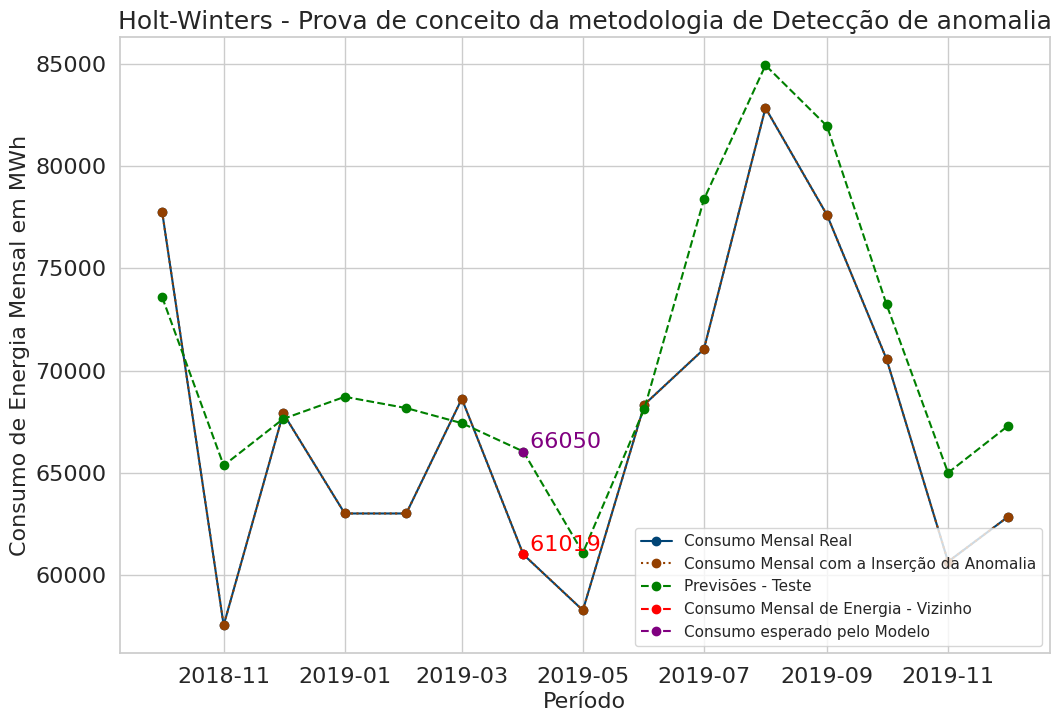

In [168]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10013_insert_test.index, predictions_insert3, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Consumo Mensal de Energia - Vizinho')
plt.annotate(f" {int(new_york_data_10013_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10013_insert_test_with_anomaly.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], predictions_insert3[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert3[anomaly_index])}", (new_york_data_10013_insert_test.index[anomaly_index], predictions_insert3[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [169]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected3]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected3:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 0
Falsos Positivos (FP): 1
Falsos Negativos (FN): 1


### Com limiar igual RMSE * 2

In [170]:
RMSE = 1747.58
mean_train4 = new_york_data_10013_insert_test.value.mean()
print("mean_train4", mean_train4)
desvio_padrao_ruido4 = new_york_data_10013_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido4", desvio_padrao_ruido4)
limiar4 = RMSE * 2
# limiar4 = RMSE * 2
# RMSE
print("limiar4", limiar4)

# Atualizando o conjunto de teste com a anomalia
new_york_data_10013_insert_test_with_anomaly = new_york_data_10013_insert_test.value.copy()

# Fazendo previsões com a anomalia
predictions_insert4 = model_hw_10013.forecast(steps=test_length)
errors = predictions_insert4 - new_york_data_10013_insert_test

# 5. Verifique se a previsão ultrapassa o limiar4
anomalies_detected4 = []
for i in range(len(predictions_insert4)):
    if predictions_insert4[i] > limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i] or predictions_insert4[i] < -limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i]:
        anomalies_detected4.append((i, predictions_insert4[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected4}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)

mean_train4 67410.13973333333
desvio_padrao_ruido4 7562.133008646441
limiar4 3495.16
Anomalias detectadas: [(0, 73593.70634622188), (1, 65368.805314843274), (3, 68723.52023208284), (4, 68172.44055251309), (6, 66050.20543762807), (9, 78370.35285433538), (11, 81948.45547859489), (13, 65010.92149110634), (14, 67286.09768837898)]


<ipython-input-170-723f34a85be8>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert4[i] > limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i] or predictions_insert4[i] < -limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i]:
<ipython-input-170-723f34a85be8>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anomalies_detected4.append((i, predictions_insert4[i]))


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10013_insert_test.index, predictions_insert4, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Consumo Mensal de Energia - Vizinho')
plt.annotate(f" {int(new_york_data_10013_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10013_insert_test_with_anomaly.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], predictions_insert4[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert4[anomaly_index])}", (new_york_data_10013_insert_test.index[anomaly_index], predictions_insert4[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [172]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected4]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected4:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 1
Falsos Positivos (FP): 8
Falsos Negativos (FN): 0


# Inserção de anomalia - POC - 40 de Treino

## 10007

In [173]:
new_york_data_10007_insert = new_york_data_10007.copy()

# Dividir os dados em treinamento e teste
# train_size = int(len(new_york_data_10007_insert) * 0.7)
train_size = int(40)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10007_insert) - train_size)

new_york_data_10007_insert['datetime'] = pd.to_datetime(new_york_data_10007_insert['datetime'])
new_york_data_10007_insert.set_index('datetime', inplace=True)
new_york_data_10007_insert = new_york_data_10007_insert.asfreq('MS')
new_york_data_10007_insert

new_york_data_10007_insert_train = new_york_data_10007_insert[:train_size]
new_york_data_10007_insert_test = new_york_data_10007_insert[train_size:]
new_york_data_10007_insert_test.head()

quantidade de treino: 40
quantidade de teste: 8


year   data_class data_field_display_name         data_field  \
datetime                                                                   
2019-05-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-06-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-07-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-08-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-09-01  2019  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
datetime                                                                 
2019-05-01  New York      5     10007      NY       3  zipcode_monthly   
2019-06-01  New York      6     10007      NY       3  zipcode_monthly   
2019-07-01  New York      7     10007      NY       3  zipcode_monthly   
2019-08-01  New York      8     10007      NY       3  zipcode_monthly   
2019-09-01  New York      9     10007      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
datetime                                                         
2019-05-01  Consolidated Edison  43188.449                4085   
2019-06-01  Consolidated Edison  45864.743                4086   
2019-07-01  Consolidated Edison  52630.556                4088   
2019-08-01  Consolidated Edison  55893.302                4089   
2019-09-01  Consolidated Edison  53078.396                4086   

                                            Georeference  \
datetime                                                   
2019-05-01  POINT (-74.00801499999994 40.71343000000007)   
2019-06-01  POINT (-74.00801499999994 40.71343000000007)   
2019-07-01  POINT (-74.00801499999994 40.71343000000007)   
2019-08-01  POINT (-74.00801499999994 40.71343000000007)   
2019-09-01  POINT (-74.00801499999994 40.71343000000007)   

            NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
datetime                                                                       
2019-05-01                       749               723.0    2095.0  40.71343   
2019-06-01                       749               723.0    2095.0  40.71343   
2019-07-01                       749               723.0    2095.0  40.71343   
2019-08-01                       749               723.0    2095.0  40.71343   
2019-09-01                       749               723.0    2095.0  40.71343   

            longitude  diff_value  
datetime                           
2019-05-01 -74.008015    2459.575  
2019-06-01 -74.008015    2676.294  
2019-07-01 -74.008015    6765.813  
2019-08-01 -74.008015    3262.746  
2019-09-01 -74.008015   -2814.906

In [174]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import random

# 1. Prevendo com o modelo Holt-Winters
# Ajuste o modelo Holt-Winters
model_hw_10007 = sm.tsa.ExponentialSmoothing(
    new_york_data_10007_insert_train.value,
    seasonal_periods=12,
    trend="add",
    seasonal='add',
    initialization_method='estimated',
).fit()

### com limiar igual desvio padrão / media

In [175]:
RMSE = 1747.58
mean_train1 = new_york_data_10007_insert_test.value.mean()
print("mean_train1", mean_train1)
desvio_padrao_ruido1 = new_york_data_10007_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido1", desvio_padrao_ruido1)
limiar1 = desvio_padrao_ruido1 / mean_train1
# limiar1 = RMSE * 2
# RMSE
print("limiar1", limiar1)

# Inserindo uma anomalia aleatória
test_length = len(new_york_data_10007_insert_test)
np.random.seed(42)  # Para reprodutibilidade
anomaly_index = np.random.randint(0, test_length)
print("Anomalia no índice:", anomaly_index)
original_value = new_york_data_10007_insert_test.value[anomaly_index]
print("Valor original:", original_value)
noise = np.random.normal(0, desvio_padrao_ruido1)
new_value_with_anomaly = original_value + noise
print("Valor com anomalia:", new_value_with_anomaly)

# Atualizando o conjunto de teste com a anomalia
new_york_data_10007_insert_test_with_anomaly = new_york_data_10007_insert_test.value.copy()
new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly

# Fazendo previsões com a anomalia
predictions_insert1 = model_hw_10007.forecast(steps=test_length)
errors = predictions_insert1 - new_york_data_10007_insert_test

# 5. Verifique se a previsão ultrapassa o limiar1
anomalies_detected1 = []
for i in range(len(predictions_insert1)):
    if predictions_insert1[i] > ((limiar1 + 1) * new_york_data_10007_insert_test_with_anomaly.iloc[i]) or predictions_insert1[i] < ((1 - limiar1) * new_york_data_10007_insert_test_with_anomaly.iloc[i]):
        anomalies_detected1.append((i, predictions_insert1[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected1}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)
#  [(1, 48495.44136433083), (3, 47000.9369911718), (4, 47754.897846962755), (6, 46269.224640863154), (12, 54770.69717100847), (13, 50275.99441108544)]

mean_train1 48582.517374999996
desvio_padrao_ruido1 4837.712223059542
limiar1 0.0995772241631302
Anomalia no índice: 6
Valor original: 42667.199
Valor com anomalia: 40005.32288622264
Anomalias detectadas: [(6, 44952.34875653535), (7, 42273.4732850776)]


<ipython-input-175-6b6fab206b95>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = new_york_data_10007_insert_test.value[anomaly_index]
<ipython-input-175-6b6fab206b95>:24: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly
<ipython-input-175-6b6fab206b95>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert1[i] >

<ipython-input-176-a96f6cc13d54>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(new_york_data_10007_insert_test.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Anomalia Inserida')
<ipython-input-176-a96f6cc13d54>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {int(new_york_data_10007_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10007_insert_test_with_anomaly.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
<ip

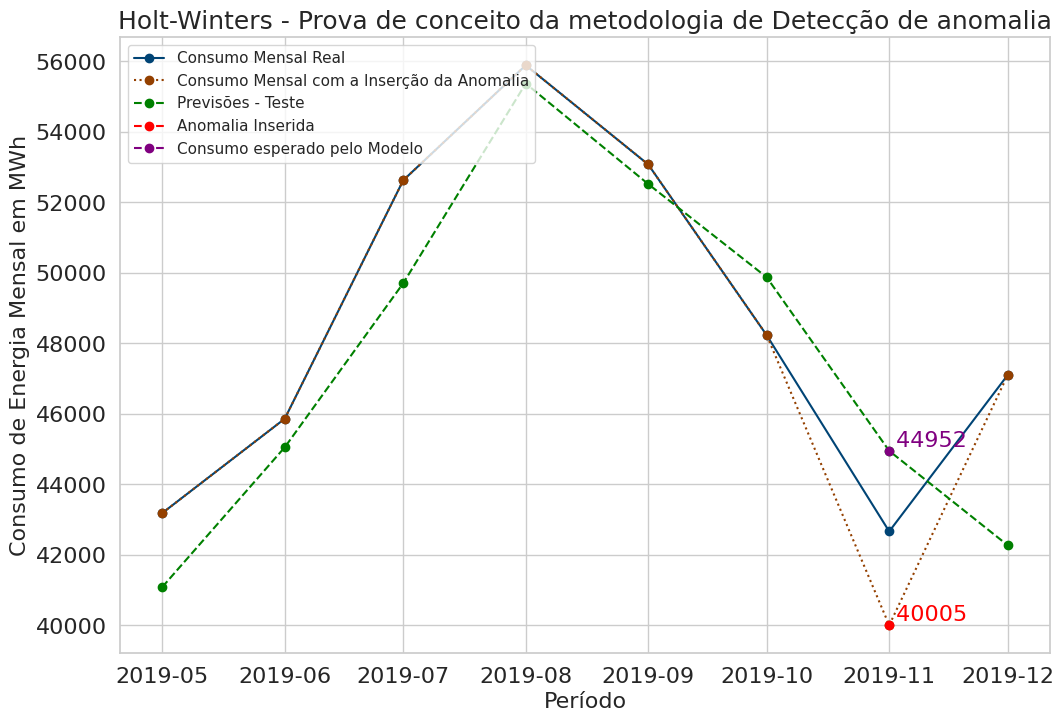

In [176]:
new_york_data_10007_insert_test.index[anomaly_index]

plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10007_insert_test.index, predictions_insert1, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Anomalia Inserida')
plt.annotate(f" {int(new_york_data_10007_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10007_insert_test_with_anomaly.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], predictions_insert1[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert1[anomaly_index])}", (new_york_data_10007_insert_test.index[anomaly_index], predictions_insert1[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper left")
plt.show()

In [177]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected1]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected1:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 1
Falsos Positivos (FP): 1
Falsos Negativos (FN): 0


### Com limiar igual RMSE * 2

In [178]:
RMSE = 1747.58
mean_train2 = new_york_data_10007_insert_test.value.mean()
print("mean_train2", mean_train2)
desvio_padrao_ruido2 = new_york_data_10007_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido2", desvio_padrao_ruido2)
limiar2 = RMSE * 2
# limiar2 = RMSE * 2
# RMSE
print("limiar2", limiar2)

# Inserindo uma anomalia aleatória
test_length = len(new_york_data_10007_insert_test)
np.random.seed(42)  # Para reprodutibilidade
anomaly_index = np.random.randint(0, test_length)
print("Anomalia no índice:", anomaly_index)
original_value = new_york_data_10007_insert_test.value[anomaly_index]
print("Valor original:", original_value)
noise = np.random.normal(0, desvio_padrao_ruido2)
new_value_with_anomaly = original_value + noise
print("Valor com anomalia:", new_value_with_anomaly)

# Atualizando o conjunto de teste com a anomalia
new_york_data_10007_insert_test_with_anomaly = new_york_data_10007_insert_test.value.copy()
new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly

# Fazendo previsões com a anomalia
predictions_insert2 = model_hw_10007.forecast(steps=test_length)
errors = predictions_insert2 - new_york_data_10007_insert_test

# 5. Verifique se a previsão ultrapassa o limiar2
anomalies_detected2 = []
for i in range(len(predictions_insert2)):
    if predictions_insert2[i] > limiar2 + new_york_data_10007_insert_test_with_anomaly.iloc[i] or predictions_insert2[i] < -limiar2 + new_york_data_10007_insert_test_with_anomaly.iloc[i]:
        anomalies_detected2.append((i, predictions_insert2[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected2}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)

mean_train2 48582.517374999996
desvio_padrao_ruido2 4837.712223059542
limiar2 3495.16
Anomalia no índice: 6
Valor original: 42667.199
Valor com anomalia: 40005.32288622264
Anomalias detectadas: [(6, 44952.34875653535), (7, 42273.4732850776)]


<ipython-input-178-da11347b5ddd>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = new_york_data_10007_insert_test.value[anomaly_index]
<ipython-input-178-da11347b5ddd>:24: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_york_data_10007_insert_test_with_anomaly[anomaly_index] = new_value_with_anomaly
<ipython-input-178-da11347b5ddd>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert2[i] >

In [ ]:
new_york_data_10007_insert_test.index[anomaly_index]

plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10007_insert_test.index, new_york_data_10007_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10007_insert_test.index, predictions_insert2, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Anomalia Inserida')
plt.annotate(f" {int(new_york_data_10007_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10007_insert_test_with_anomaly.index[anomaly_index], new_york_data_10007_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10007_insert_test.index[anomaly_index], predictions_insert2[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert2[anomaly_index])}", (new_york_data_10007_insert_test.index[anomaly_index], predictions_insert2[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="upper right")
plt.show()

In [180]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected2]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected2:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 1
Falsos Positivos (FP): 1
Falsos Negativos (FN): 0


## 10013


In [181]:
new_york_data_10013_insert = new_york_data_10013.copy()

# Dividir os dados em treinamento e teste
# train_size = int(len(new_york_data_10013_insert) * 0.7)
train_size = int(40)
print("quantidade de treino:", train_size)
print("quantidade de teste:", len(new_york_data_10013_insert) - train_size)

new_york_data_10013_insert['datetime'] = pd.to_datetime(new_york_data_10013_insert['datetime'])
new_york_data_10013_insert.set_index('datetime', inplace=True)
new_york_data_10013_insert = new_york_data_10013_insert.asfreq('MS')
new_york_data_10013_insert

new_york_data_10013_insert_train = new_york_data_10013_insert[:train_size]
new_york_data_10013_insert_test = new_york_data_10013_insert[train_size:]
new_york_data_10013_insert_test.head()

quantidade de treino: 40
quantidade de teste: 8


year   data_class data_field_display_name         data_field  \
datetime                                                                   
2019-05-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-06-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-07-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-08-01  2019  electricity   Total Consumption (T)  3_nat_consumption   
2019-09-01  2019  electricity   Total Consumption (T)  3_nat_consumption   

            zip_city  month  zip_code state_2  uer_id      data_stream  \
datetime                                                                 
2019-05-01  New York      5     10013      NY       3  zipcode_monthly   
2019-06-01  New York      6     10013      NY       3  zipcode_monthly   
2019-07-01  New York      7     10013      NY       3  zipcode_monthly   
2019-08-01  New York      8     10013      NY       3  zipcode_monthly   
2019-09-01  New York      9     10013      NY       3  zipcode_monthly   

           utility_display_name      value  number_of_accounts  \
datetime                                                         
2019-05-01  Consolidated Edison  58292.814               19412   
2019-06-01  Consolidated Edison  68346.621               19449   
2019-07-01  Consolidated Edison  71056.360               19462   
2019-08-01  Consolidated Edison  82835.740               19453   
2019-09-01  Consolidated Edison  77605.860               19452   

                                            Georeference  \
datetime                                                   
2019-05-01  POINT (-74.00556469999998 40.72033000000005)   
2019-06-01  POINT (-74.00556469999998 40.72033000000005)   
2019-07-01  POINT (-74.00556469999998 40.72033000000005)   
2019-08-01  POINT (-74.00556469999998 40.72033000000005)   
2019-09-01  POINT (-74.00556469999998 40.72033000000005)   

            NYS Municipal Boundaries  New York Zip Codes  Counties  latitude  \
datetime                                                                       
2019-05-01                       749               737.0    2095.0  40.72033   
2019-06-01                       749               737.0    2095.0  40.72033   
2019-07-01                       749               737.0    2095.0  40.72033   
2019-08-01                       749               737.0    2095.0  40.72033   
2019-09-01                       749               737.0    2095.0  40.72033   

            longitude  diff_value  
datetime                           
2019-05-01 -74.005565   -2726.869  
2019-06-01 -74.005565   10053.807  
2019-07-01 -74.005565    2709.739  
2019-08-01 -74.005565   11779.380  
2019-09-01 -74.005565   -5229.880

In [182]:
# 1. Prevendo com o modelo Holt-Winters
# Ajuste o modelo Holt-Winters
model_hw_10013 = sm.tsa.ExponentialSmoothing(
    new_york_data_10013_insert_train.value,
    seasonal_periods=12,
    trend="add",
    seasonal='add',
    initialization_method='estimated',
).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### com limiar igual desvio padrão / media

In [183]:
mean_train3 = new_york_data_10013_insert_test.value.mean()
print("mean_train3", mean_train3)
desvio_padrao_ruido3 = new_york_data_10013_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido3", desvio_padrao_ruido3)
limiar3 = desvio_padrao_ruido3 / mean_train3
# limiar3 = RMSE * 2
# RMSE
print("limiar3", limiar3)


# Atualizando o conjunto de teste com a anomalia
new_york_data_10013_insert_test_with_anomaly = new_york_data_10013_insert_test.value.copy()

# Fazendo previsões com a anomalia
predictions_insert3 = model_hw_10013.forecast(steps=test_length)
errors = predictions_insert3 - new_york_data_10013_insert_test

# 5. Verifique se a previsão ultrapassa o limiar3
anomalies_detected3 = []
for i in range(len(predictions_insert3)):
    if predictions_insert3[i] > ((limiar3 + 1) * new_york_data_10013_insert_test_with_anomaly.iloc[i]) or predictions_insert3[i] < ((1 - limiar3) * new_york_data_10013_insert_test_with_anomaly.iloc[i]):
        anomalies_detected3.append((i, predictions_insert3[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected3}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)

mean_train3 69027.402375
desvio_padrao_ruido3 8405.099010301663
limiar3 0.12176467201590334
Anomalias detectadas: []


<ipython-input-183-e5f1eb77492b>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert3[i] > ((limiar3 + 1) * new_york_data_10013_insert_test_with_anomaly.iloc[i]) or predictions_insert3[i] < ((1 - limiar3) * new_york_data_10013_insert_test_with_anomaly.iloc[i]):


<ipython-input-184-890cde2e32c7>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(new_york_data_10013_insert_test.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Consumo Mensal de Energia - Vizinho')
<ipython-input-184-890cde2e32c7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f" {int(new_york_data_10013_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10013_insert_test_with_anomaly.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left'

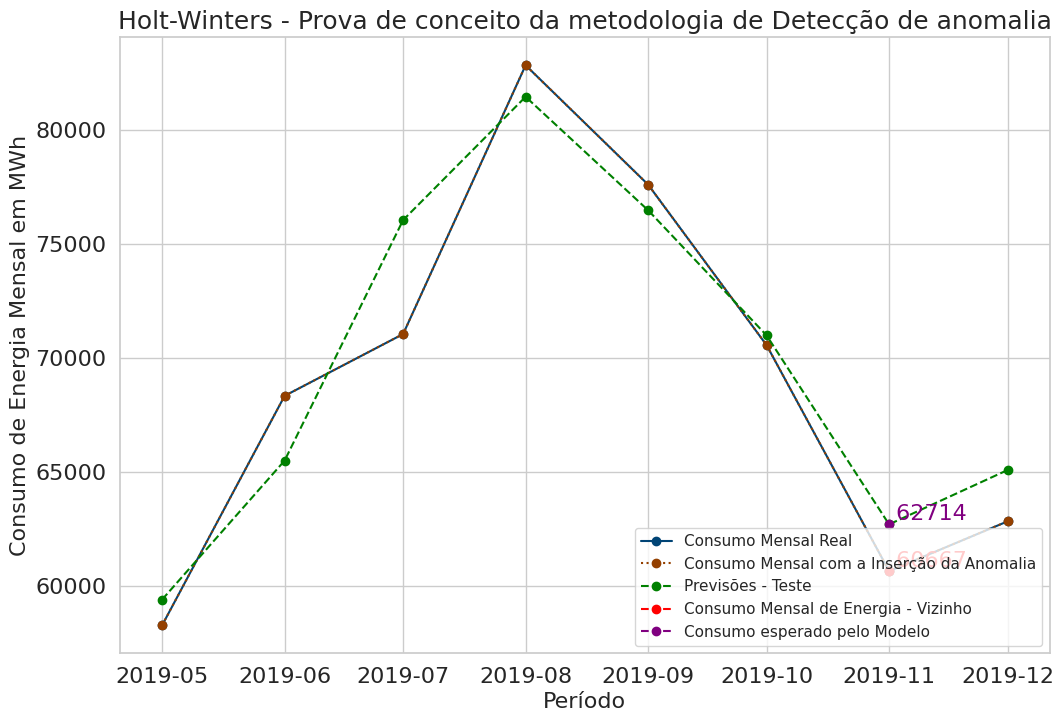

In [184]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10013_insert_test.index, predictions_insert3, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Consumo Mensal de Energia - Vizinho')
plt.annotate(f" {int(new_york_data_10013_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10013_insert_test_with_anomaly.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], predictions_insert3[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert3[anomaly_index])}", (new_york_data_10013_insert_test.index[anomaly_index], predictions_insert3[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [185]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected3]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected3:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 0
Falsos Positivos (FP): 0
Falsos Negativos (FN): 1


### Com limiar igual RMSE * 2

In [186]:
RMSE = 1747.58
mean_train4 = new_york_data_10013_insert_test.value.mean()
print("mean_train4", mean_train4)
desvio_padrao_ruido4 = new_york_data_10013_insert_test.value.std()  # Desvio padrão da série
print("desvio_padrao_ruido4", desvio_padrao_ruido4)
limiar4 = RMSE * 2
# limiar4 = RMSE * 2
# RMSE
print("limiar4", limiar4)

# Atualizando o conjunto de teste com a anomalia
new_york_data_10013_insert_test_with_anomaly = new_york_data_10013_insert_test.value.copy()

# Fazendo previsões com a anomalia
predictions_insert4 = model_hw_10013.forecast(steps=test_length)
errors = predictions_insert4 - new_york_data_10013_insert_test

# 5. Verifique se a previsão ultrapassa o limiar4
anomalies_detected4 = []
for i in range(len(predictions_insert4)):
    if predictions_insert4[i] > limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i] or predictions_insert4[i] < -limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i]:
        anomalies_detected4.append((i, predictions_insert4[i]))

# Resultado
print(f"Anomalias detectadas: {anomalies_detected4}")
# # Resultados
# print("Valor original:", original_value)
# print("Valor com anomalia:", new_value_with_anomaly)
# print("Previsões com anomalia:", predictions_with_anomaly)
# print("Anomalias detectadas (True indica anomalia):", anomalies_detected)

mean_train4 69027.402375
desvio_padrao_ruido4 8405.099010301663
limiar4 3495.16
Anomalias detectadas: [(2, 76052.16460052492)]


<ipython-input-186-723f34a85be8>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if predictions_insert4[i] > limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i] or predictions_insert4[i] < -limiar4 + new_york_data_10013_insert_test_with_anomaly.iloc[i]:
<ipython-input-186-723f34a85be8>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  anomalies_detected4.append((i, predictions_insert4[i]))


In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test.value, label='Consumo Mensal Real', marker='o', color=corTreinoReal)
plt.plot(new_york_data_10013_insert_test.index, new_york_data_10013_insert_test_with_anomaly, label='Consumo Mensal com a Inserção da Anomalia', marker='o', color=corTestReal,linestyle='dotted')
plt.plot(new_york_data_10013_insert_test.index, predictions_insert4, label='Previsões - Teste', color='green', marker='o', linestyle='--')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index], linestyle="--", marker='o', color='red', label='Consumo Mensal de Energia - Vizinho')
plt.annotate(f" {int(new_york_data_10013_insert_test_with_anomaly[anomaly_index])}", (new_york_data_10013_insert_test_with_anomaly.index[anomaly_index], new_york_data_10013_insert_test_with_anomaly[anomaly_index]), color="red", fontsize=16, ha='left', va='bottom')
plt.plot(new_york_data_10013_insert_test.index[anomaly_index], predictions_insert4[anomaly_index], linestyle="--", marker='o', color='purple', label='Consumo esperado pelo Modelo')
plt.annotate(f" {int(predictions_insert4[anomaly_index])}", (new_york_data_10013_insert_test.index[anomaly_index], predictions_insert4[anomaly_index]), color="purple", fontsize=16, ha='left', va='bottom')

plt.title('Holt-Winters - Prova de conceito da metodologia de Detecção de anomalia', fontsize=18)
plt.xlabel('Período', fontsize=16)
plt.ylabel('Consumo de Energia Mensal em MWh', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

In [188]:
# Inicializando as contagens
TP = 0  # True Positive
FP = 0  # False Positive
FN = 0  # False Negative
TN = 0  # True Negative (não relevante para a detecção de anomalias)

# Checando as anomalias detectadas
detected_indices = [i[0] for i in anomalies_detected4]

# Verificando se a anomalia real foi detectada
if anomaly_index in detected_indices:
    TP += 1  # A anomalia foi detectada corretamente
else:
    FN += 1  # A anomalia real não foi detectada

# Para todos os outros índices, verificar se são falsos positivos
for idx, _ in anomalies_detected4:
    if idx != anomaly_index:
        FP += 1  # Esses são falsos positivos, pois não havia anomalia real

# Exibindo os resultados
print(f"Positivos Verdadeiros (TP): {TP}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Positivos Verdadeiros (TP): 0
Falsos Positivos (FP): 1
Falsos Negativos (FN): 1
